In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<font color="cyan">
<h1> Import Libraries </h1>
</font>

In [2]:
import cv2
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
import seaborn as sns

<font color="cyan">
<h1> Calculate Differneces </h1>
</font>

In [3]:
def calculate_frame_differences(test_folder, query_folder, common_ids):
    test_files = glob.glob(os.path.join(test_folder, "*.jpg"))
    # print(test_files)
    query_files = glob.glob(os.path.join(query_folder, "*.jpg"))

    # test_names = set([os.path.splitext(os.path.basename(file))[0] for file in test_files])
    # query_names = set([os.path.splitext(os.path.basename(file))[0] for file in query_files])

    # test_ids = set([os.path.splitext(os.path.basename(file))[0].split("_")[0] for file in test_files])
    # query_ids = set([os.path.splitext(os.path.basename(file))[0].split("_")[0] for file in query_files])
    # print(set([os.path.splitext(os.path.basename(file))[0] for file in query_files]))
    # print(set([os.path.splitext(os.path.basename(file))[0].split("_")[2] for file in query_files]))

    # test_ids = set([file.split("_")[0] for file in test_folder])
    # query_ids = set([file.split("_")[0] for file in query_folder])
    # print(test_ids)

    # common_ids = test_ids.intersection(query_ids)
    # print(common_ids)

    id_frame_differences = {}

    for common_id in common_ids:
        test_frame = int([file for file in test_files if common_id in file][0].split("_")[3])
        query_frame = int([file for file in query_files if common_id in file][0].split("_")[3])
        
        # if test_frames and query_frames:
        frame_difference = abs(query_frame - test_frame)
        id_frame_differences[common_id] = frame_difference

        # frame_differences = [(frame_q - frame_t) for frame_q in query_frames for frame_t in test_frames]
        # id_frame_differences[common_id] = frame_differences

    return id_frame_differences

<font color="cyan">
<h1> Plot Differneces </h1>
</font>

In [4]:
def plot_frame_differences(frame_differences):
    fig, ax = plt.subplots(figsize=(18, 6))
    ids = list(frame_differences.keys())
    differences = list(frame_differences.values())
    plt.bar(ids, frame_differences.values())
    plt.xlabel('Frame Number Difference')
    plt.ylabel('ID Number')
    plt.title('Frame Number Differences between Test and Query IDs')
    plt.show()

{'0012': 59, '0008': 9870, '0014': 44, '0024': 21, '0003': 55, '0005': 136, '0018': 43, '0027': 27, '0015': 23, '0002': 73, '0011': 35, '0000': 48, '0021': 102, '0028': 18, '0031': 4193, '0006': 14, '0033': 14, '0013': 32, '0023': 41, '0007': 17, '0022': 49, '0030': 21, '0032': 20, '0004': 12, '0016': 21, '0001': 20, '0017': 26, '0009': 21, '0026': 38, '0025': 23, '0010': 33}


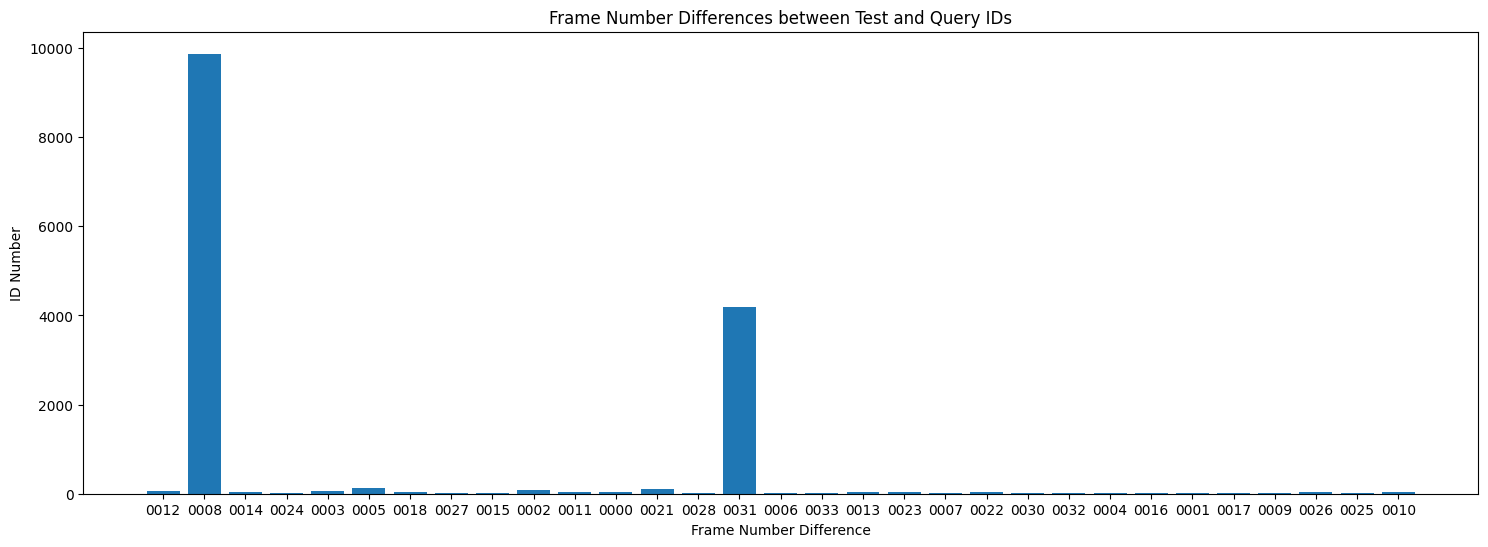

488.6774193548387


In [27]:
test_path = "E:/University/Term8/Final_Project/SOLIDER-REID/iust-temporal/test/"
query_path = "E:/University/Term8/Final_Project/SOLIDER-REID/iust-temporal/query/"
query_files = glob.glob(os.path.join(query_path, "*.jpg"))
test_files = glob.glob(os.path.join(test_path, "*.jpg"))
query_ids = set([os.path.splitext(os.path.basename(file))[0].split("_")[0] for file in query_files])
test_ids = set([os.path.splitext(os.path.basename(file))[0].split("_")[0] for file in test_files])
common_ids = query_ids.intersection(test_ids)
frame_differences = calculate_frame_differences(test_path, query_path, common_ids)
print(frame_differences)
plot_frame_differences(frame_differences)
print(np.mean(list(frame_differences.values())))

<font color="cyan">
<h1> Calculate KDE </h1>
</font>

In [10]:
def plot_kde_chart(data, title):
    x = np.linspace(min(data), max(data), 1000)[:, np.newaxis]
    kde = KernelDensity(bandwidth=100.0, kernel='gaussian')
    kde.fit(data[:, np.newaxis])
    log_dens = kde.score_samples(x)
    normalized_dens = np.exp(log_dens)
    fig, ax = plt.subplots(figsize=(18, 6))
    plt.plot(x[:, 0], normalized_dens, label=title)
    plt.xlabel('Frame Differences')
    plt.ylabel('Probability Density')
    plt.xticks(np.arange(min(x), max(x), 300))  
    plt.yticks(np.arange(0, 0.1, 0.01)) 
    plt.legend()
    plt.show()
    return kde
# def calculate_kde(distances):
#     kde = gaussian_kde(distances)
#     x_vals = np.linspace(min(distances), max(distances), 1000)
#     y_vals = kde(x_vals) / max(kde(x_vals)) 
#     # print(y_vals)
#     return x_vals, y_vals, kde

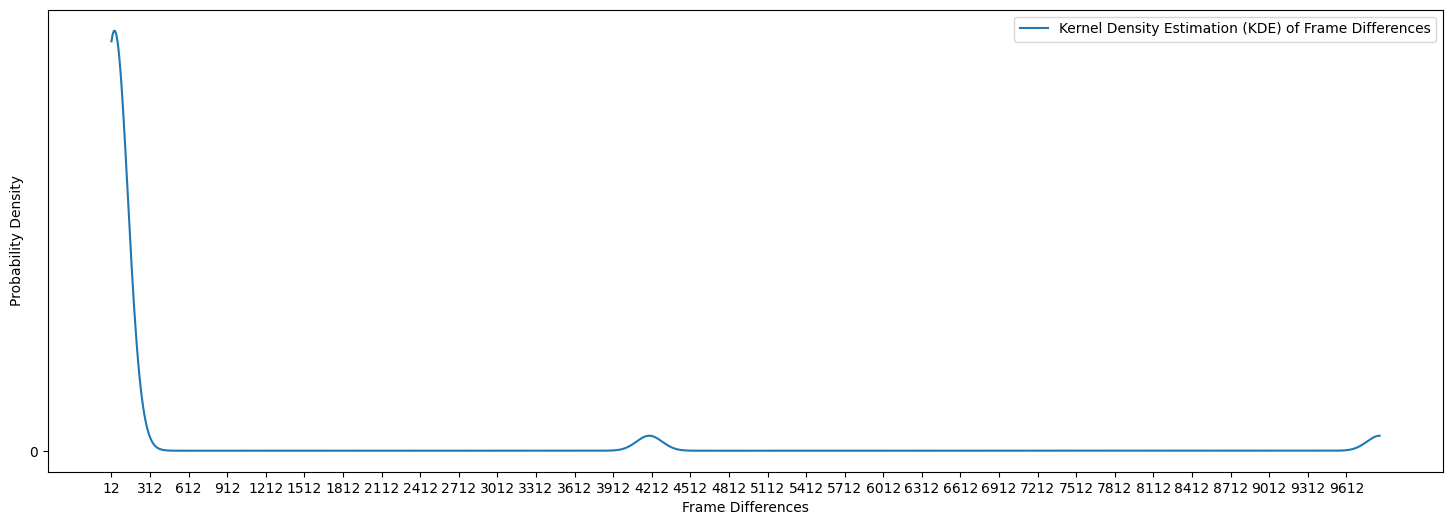

In [11]:
id_frame_differences = calculate_frame_differences(test_path, query_path, common_ids)
query_data = np.array(list(id_frame_differences.values()))
kde = plot_kde_chart(query_data, f"Kernel Density Estimation (KDE) of Frame Differences")
# def plot_kde(x_vals, y_vals):
#     fig, ax = plt.subplots(figsize=(18, 6))
#     plt.plot(x_vals, y_vals, label='KDE')
#     plt.xlabel('Frame Differences')
#     plt.ylabel('Probability Density')
#     # print(max(x_vals))
#     plt.xticks(np.arange(min(x_vals), max(x_vals), 300))  
#     plt.yticks(np.arange(0, 1.1, 0.1)) 
#     plt.title('Kernel Density Estimation (KDE) of Frame Differences')
#     plt.legend()
#     plt.show()

<font color="cyan">
<h1> Calculate Differneces for Each Query to All Gallery Images </h1>
</font>

In [13]:
def calculate_differences(query_folder, test_folder, query_id, test_ids):
    query_files = glob.glob(os.path.join(query_folder, f"{query_id}_*.jpg"))
    test_files = [glob.glob(os.path.join(test_folder, f"{test_id}_*.jpg")) for test_id in test_ids]

    id_frame_differences = {}

    for query_file in query_files:
        query_frame = int(os.path.splitext(os.path.basename(query_file))[0].split("_")[2])

        for test_id, test_files_single_id in zip(test_ids, test_files):
            if len(test_files_single_id) > 0:
                test_frame = int(os.path.splitext(os.path.basename(test_files_single_id[0]))[0].split("_")[2])
                frame_difference = abs(query_frame - test_frame)

                if test_id not in id_frame_differences:
                    id_frame_differences[test_id] = []

                id_frame_differences[test_id].append(frame_difference)

    return id_frame_differences

<font color="cyan">
<h1> Plot Differences </h1>
</font>

In [14]:
def plot_differences(query_id, test_ids, frame_differences):
    fig, ax = plt.subplots(figsize=(18, 6))
    for test_id, differences in zip(test_ids, frame_differences):
        # print(test_id)
        # print("hi")
        plt.bar(test_id, differences, width=0.4)
        # print(test_id, " ", differences)
        for i, value in enumerate(differences):
            ax.text(test_id, value + 0.2, str(value), ha='center', va='bottom')
    
    plt.xlabel('Test IDs')
    plt.ylabel('Frame Number Difference')
    plt.title(f'Frame Number Differences between Query {query_id} and Test IDs')
    plt.show()

<font color="cyan">
<h1> Calculate Probabilities </h1>
</font>

In [15]:
def calculate_probabilities(frame_differences):
    probabilities = {}
    min_difference = min([min(differences) for differences in frame_differences.values()])
    max_difference = max([max(differences) for differences in frame_differences.values()])
    
    for test_id, differences in frame_differences.items():
        normalized_differences = (np.mean(differences) - min_difference) / (max_difference - min_difference)
        probability = 1 - normalized_differences
        probabilities[test_id] = probability

    return probabilities

<font color="cyan">
<h1> Plot Probabilities </h1>
</font>

In [12]:
def plot_probabilities(query_id, test_ids, probabilities):
    sorted_test_ids = sorted(test_ids, key=lambda x: probabilities[x], reverse=True)
    sorted_probabilities = [probabilities[test_id] for test_id in sorted_test_ids]

    middle_index = len(sorted_test_ids) // 2
    left_test_ids = sorted_test_ids[:middle_index][::-1] 
    right_test_ids = sorted_test_ids[middle_index:]

    left_probabilities = sorted_probabilities[:middle_index][::-1] 
    right_probabilities = sorted_probabilities[middle_index:]

    fig, ax = plt.subplots(figsize=(18, 6))

    left = plt.bar(left_test_ids, left_probabilities, width=0.4, align='edge')
    right = plt.bar(right_test_ids, right_probabilities, width=-0.4, align='edge')
    
    for bar, prob in zip(left, left_probabilities):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{prob:.2f}', ha='center', va='bottom')
    for bar, prob in zip(right, right_probabilities):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{prob:.2f}', ha='center', va='bottom')

    plt.xlabel('Test IDs')
    plt.ylabel('Probability')
    plt.title(f'Probabilities for Query {query_id} with Sorted Test IDs')
    plt.show()

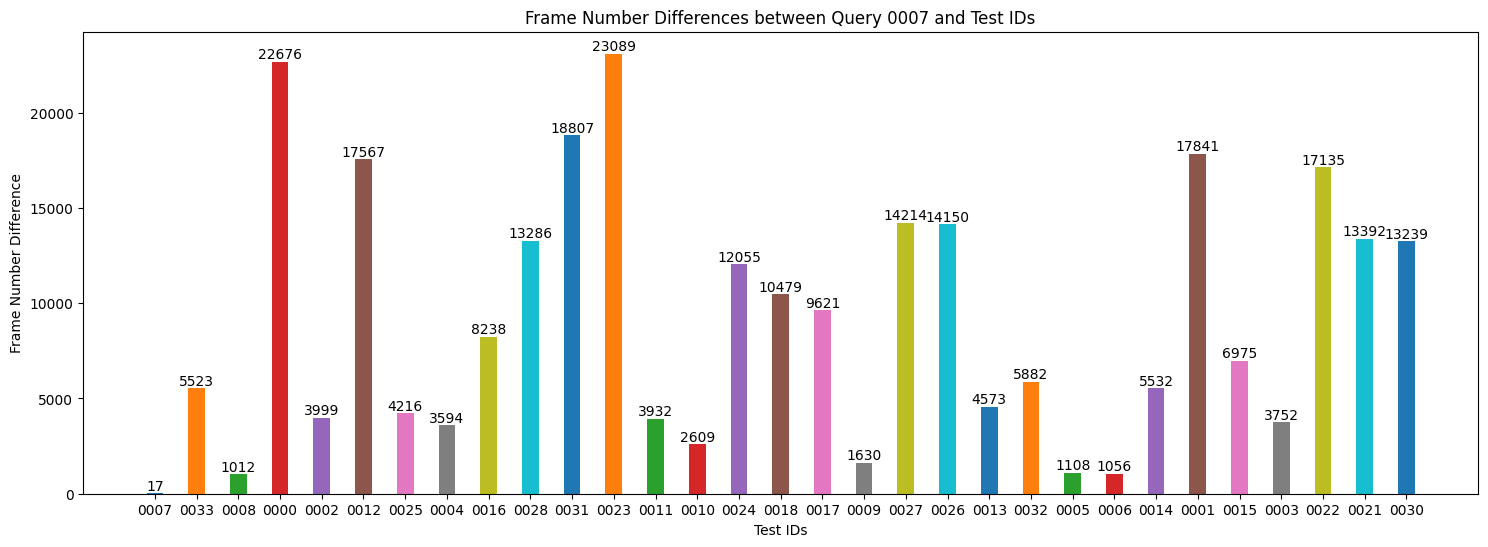

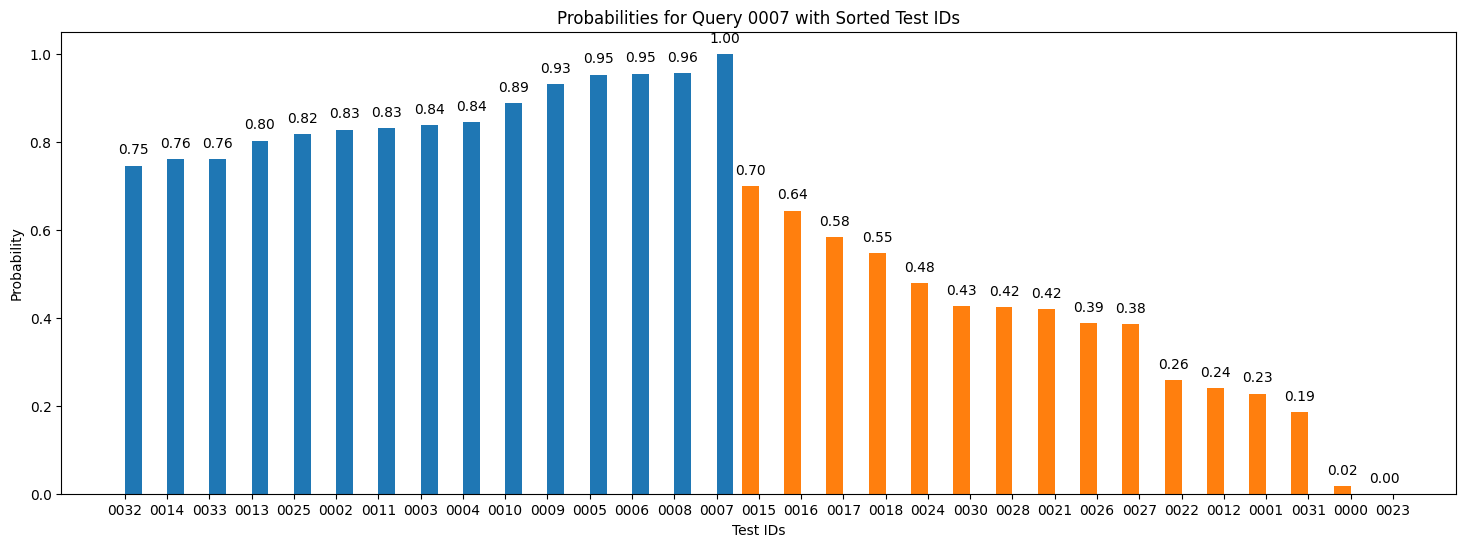

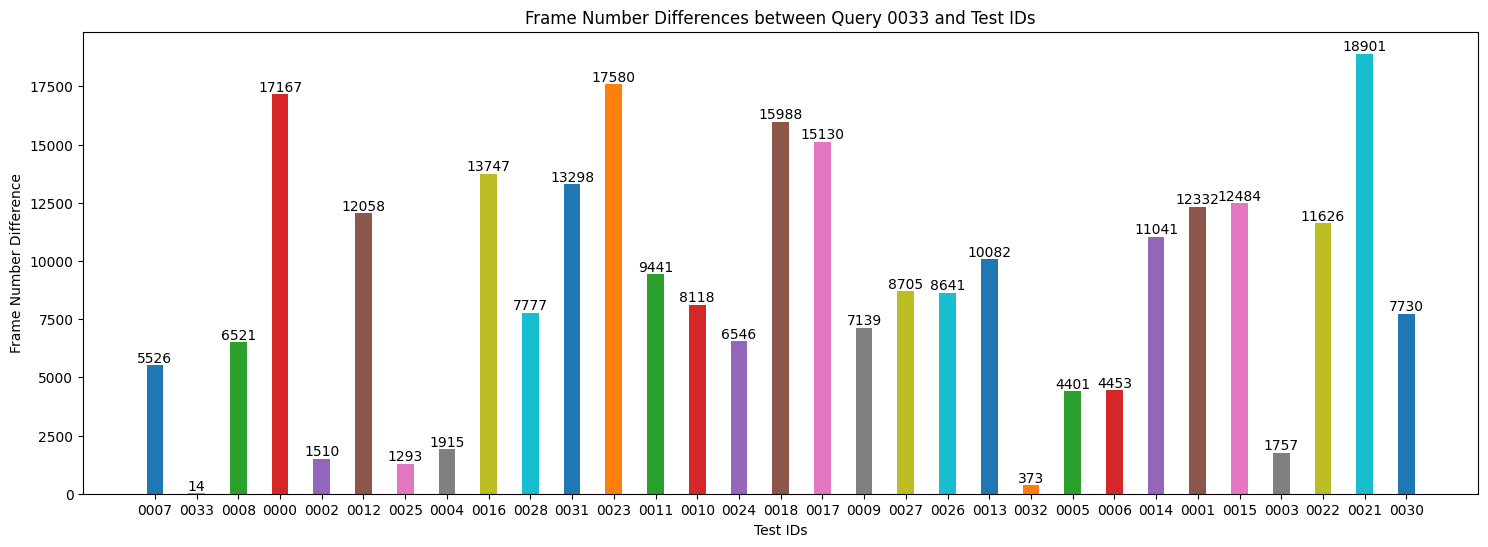

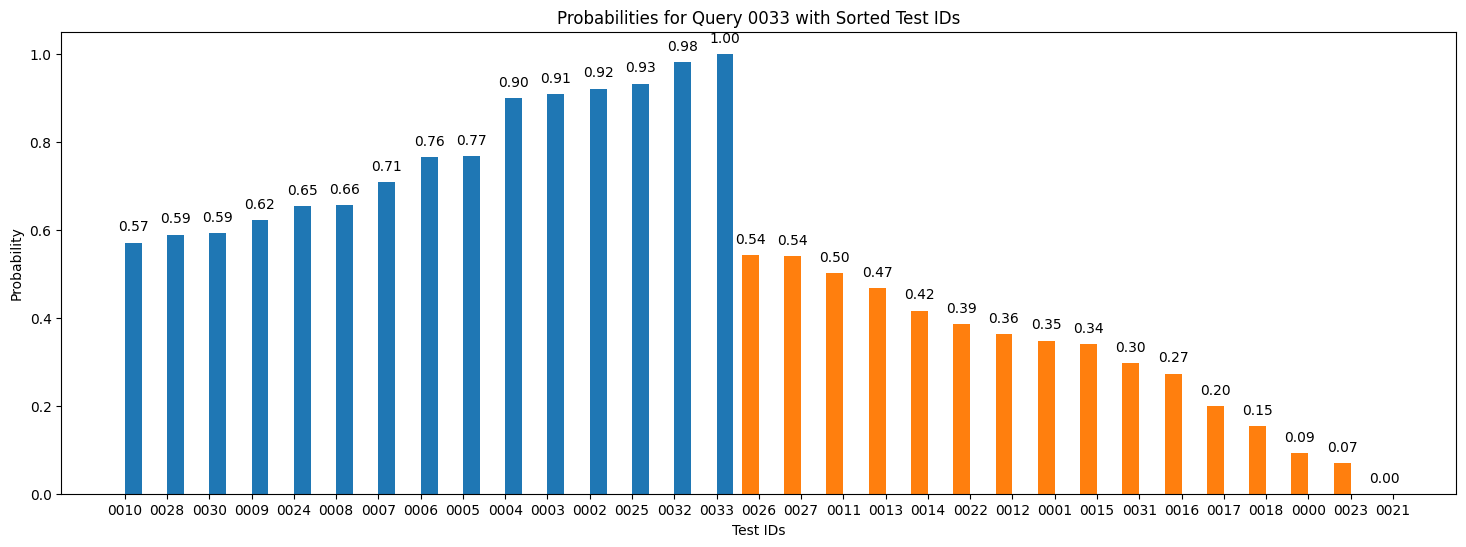

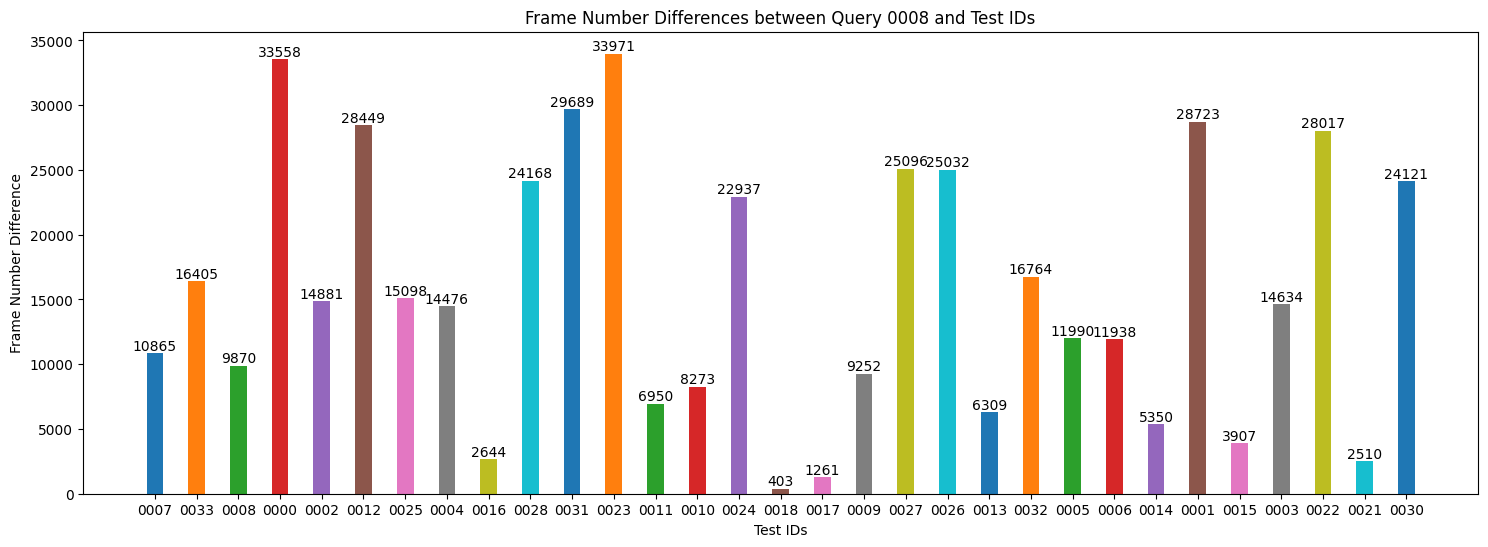

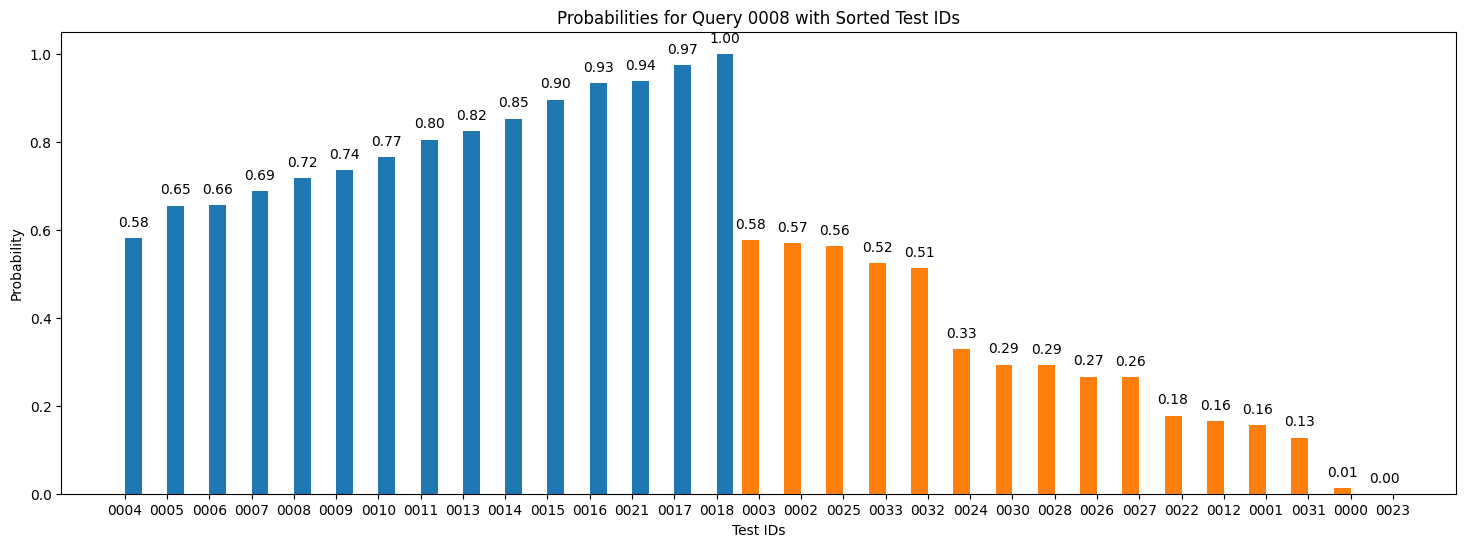

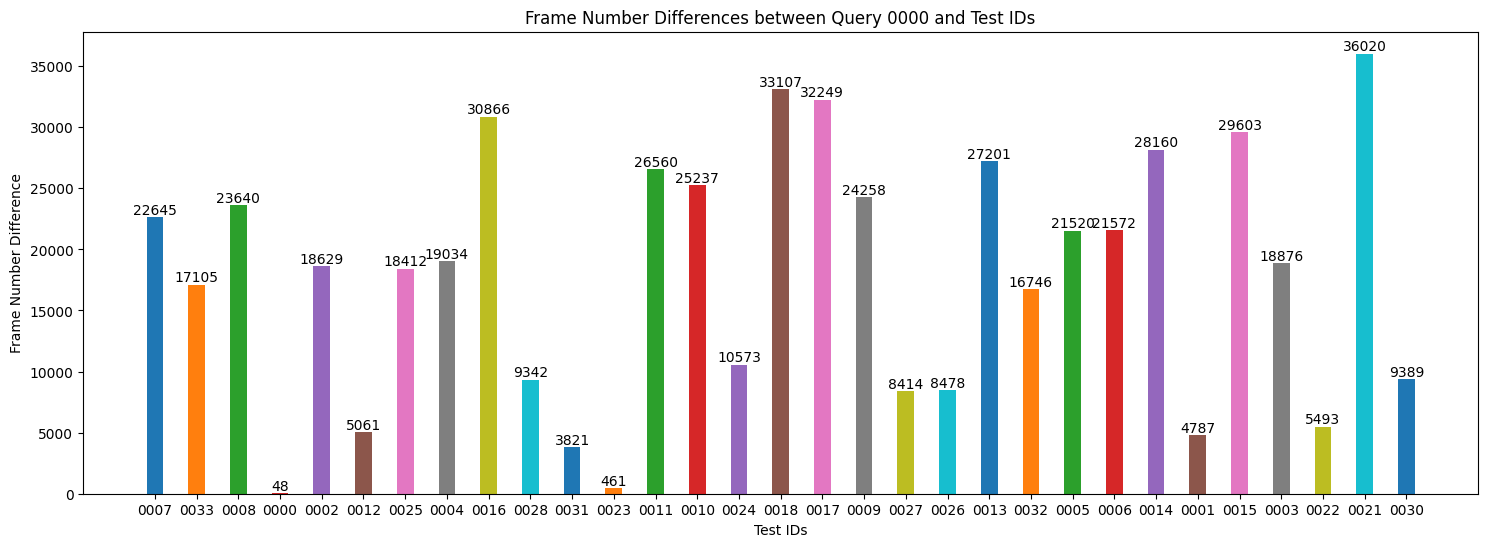

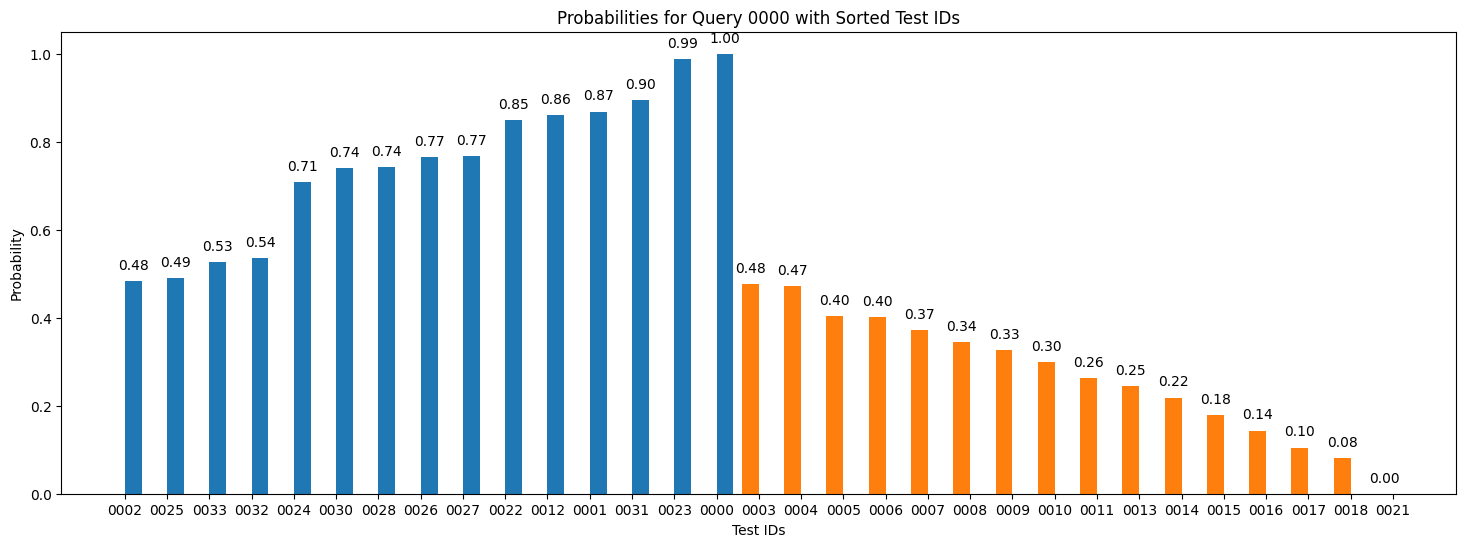

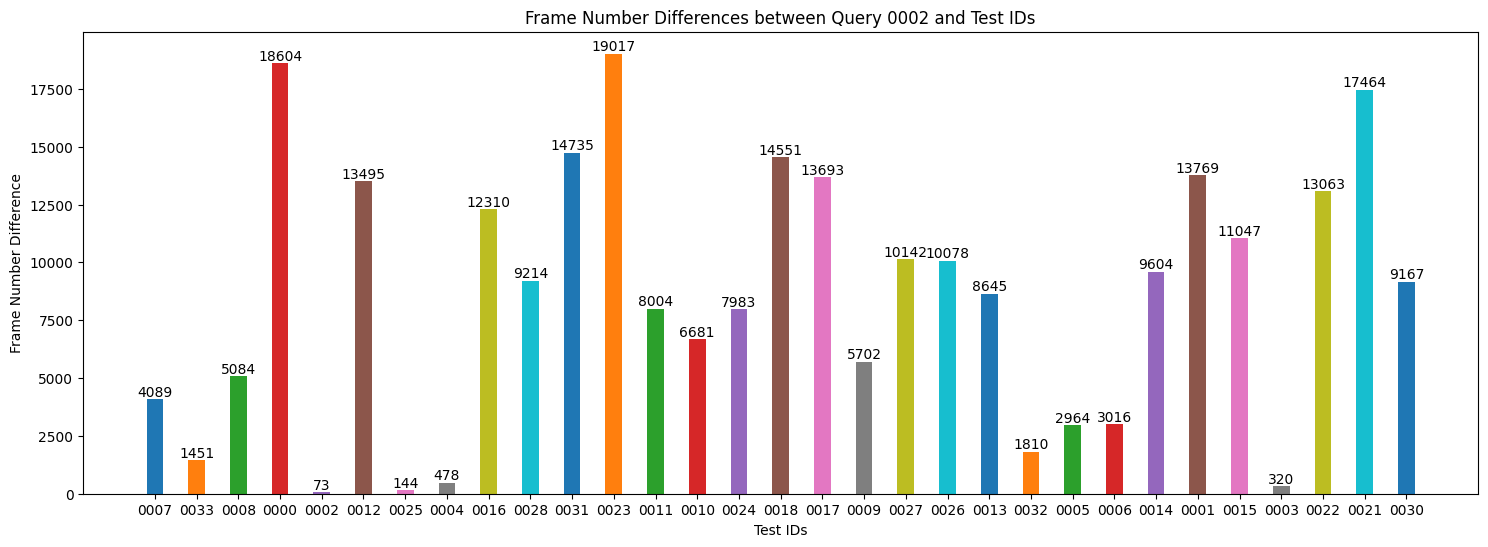

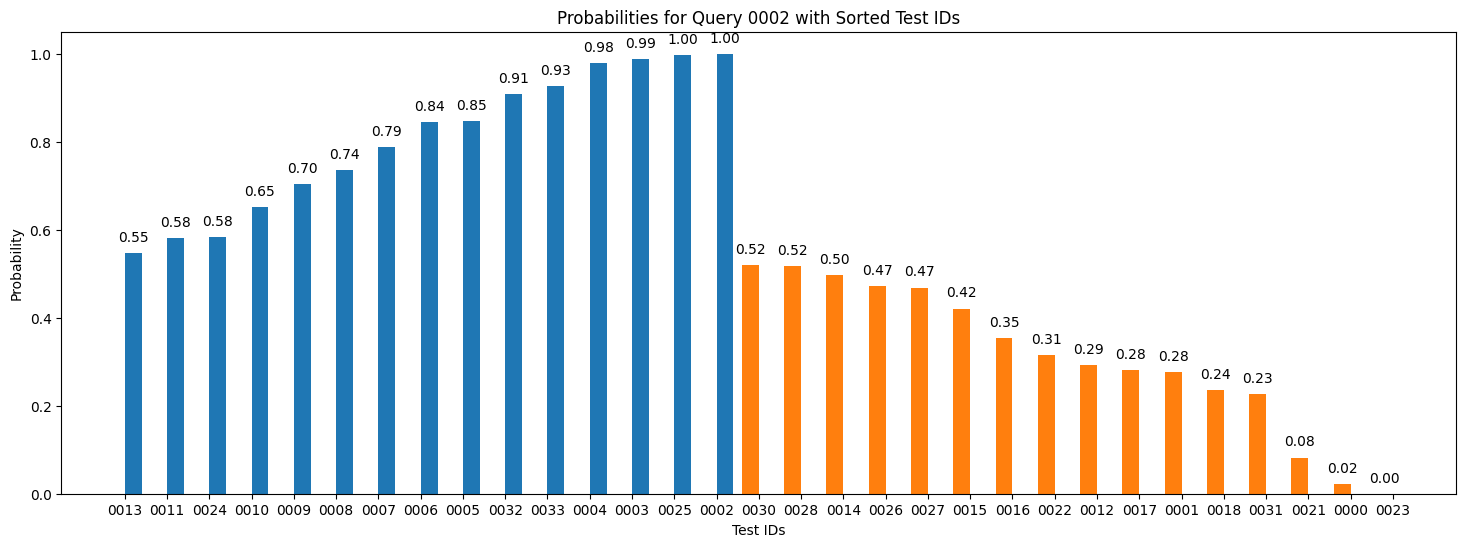

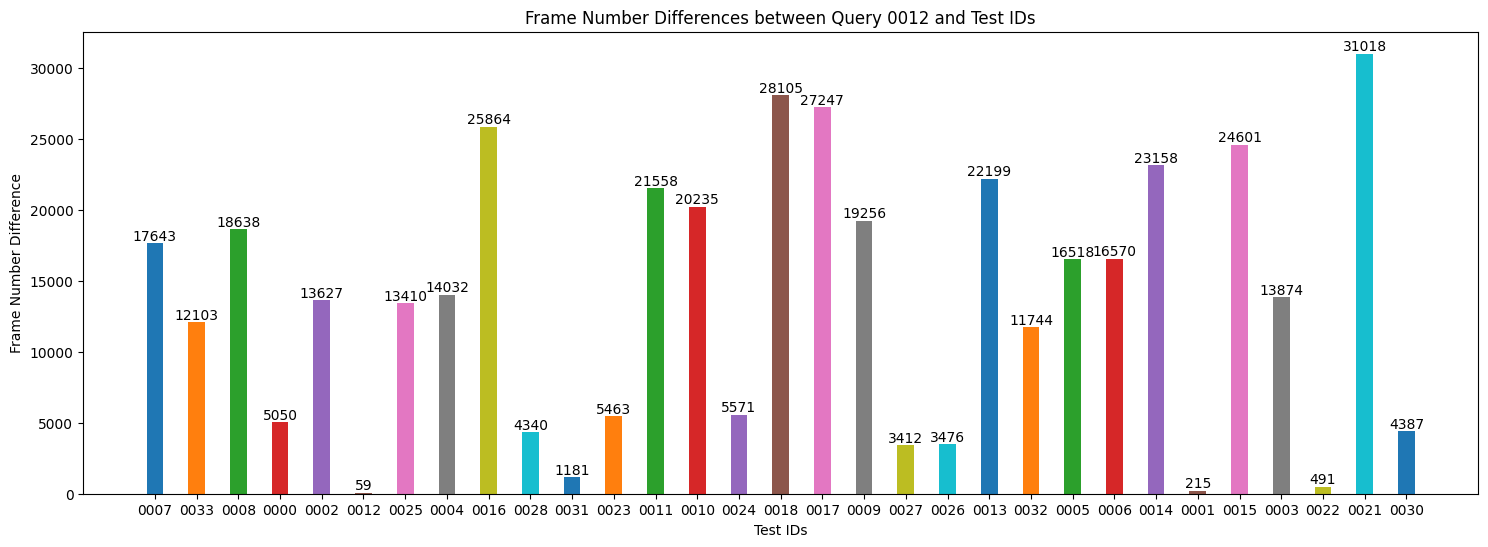

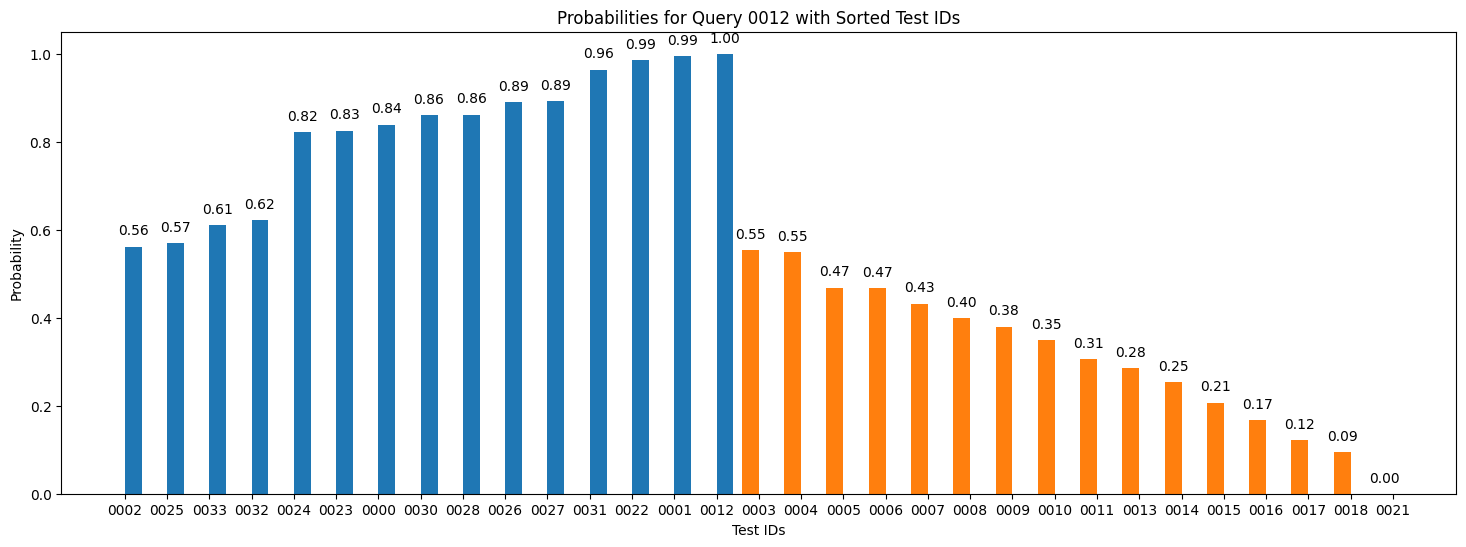

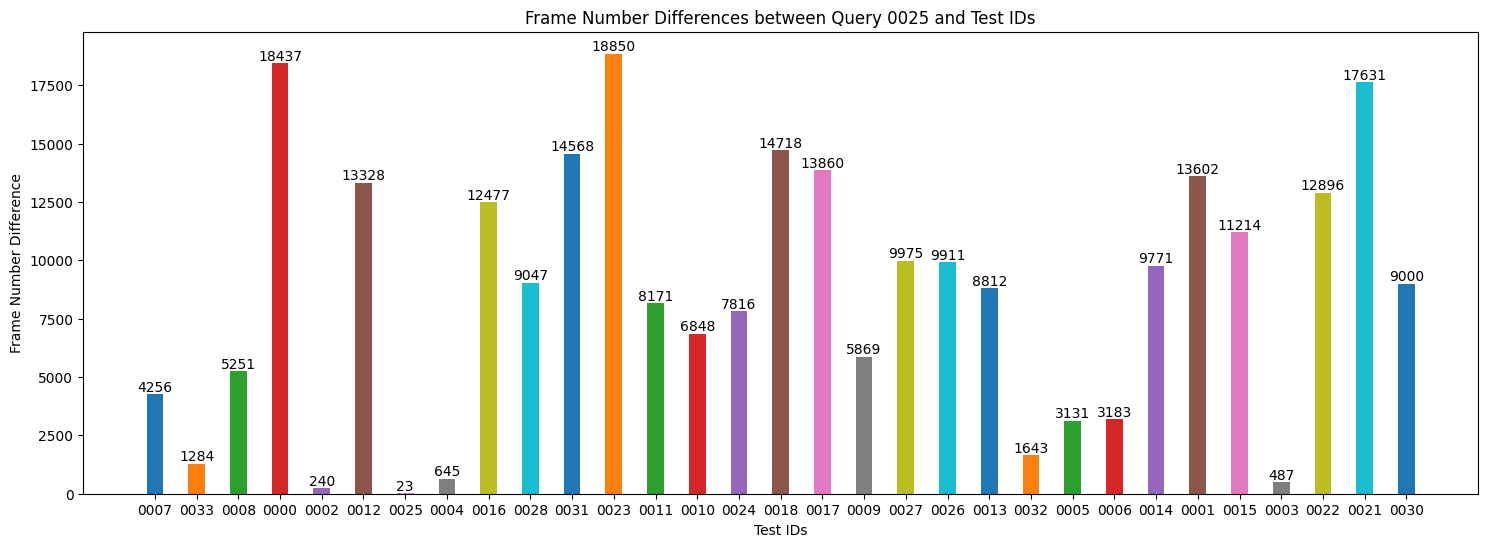

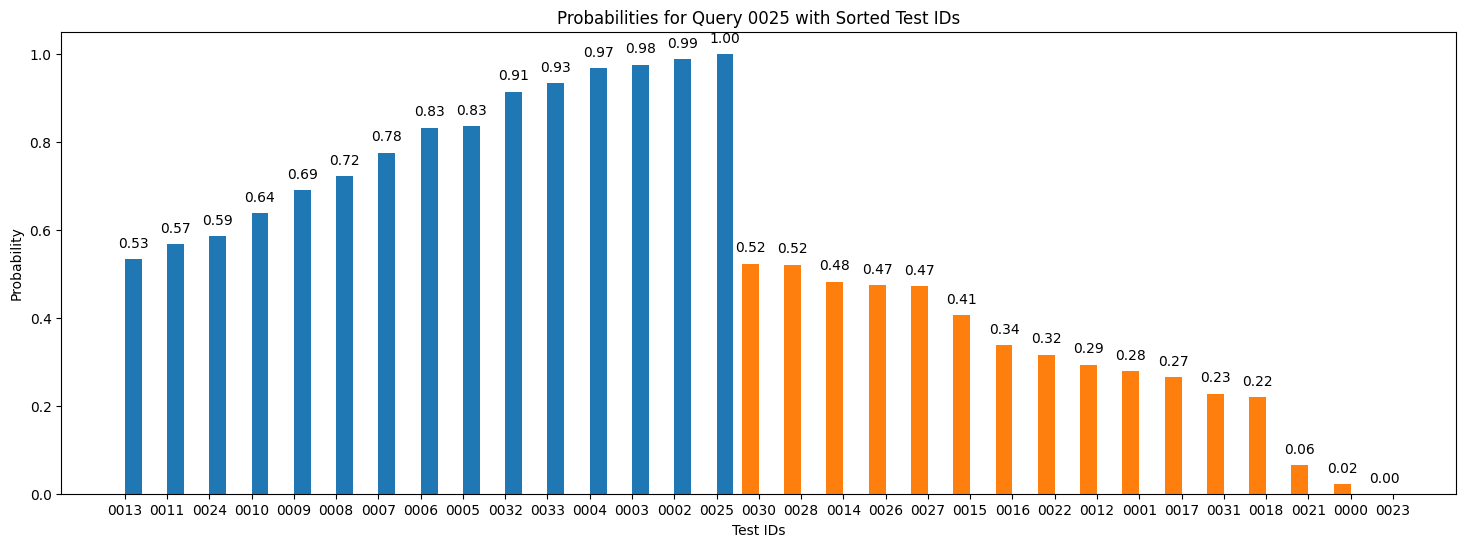

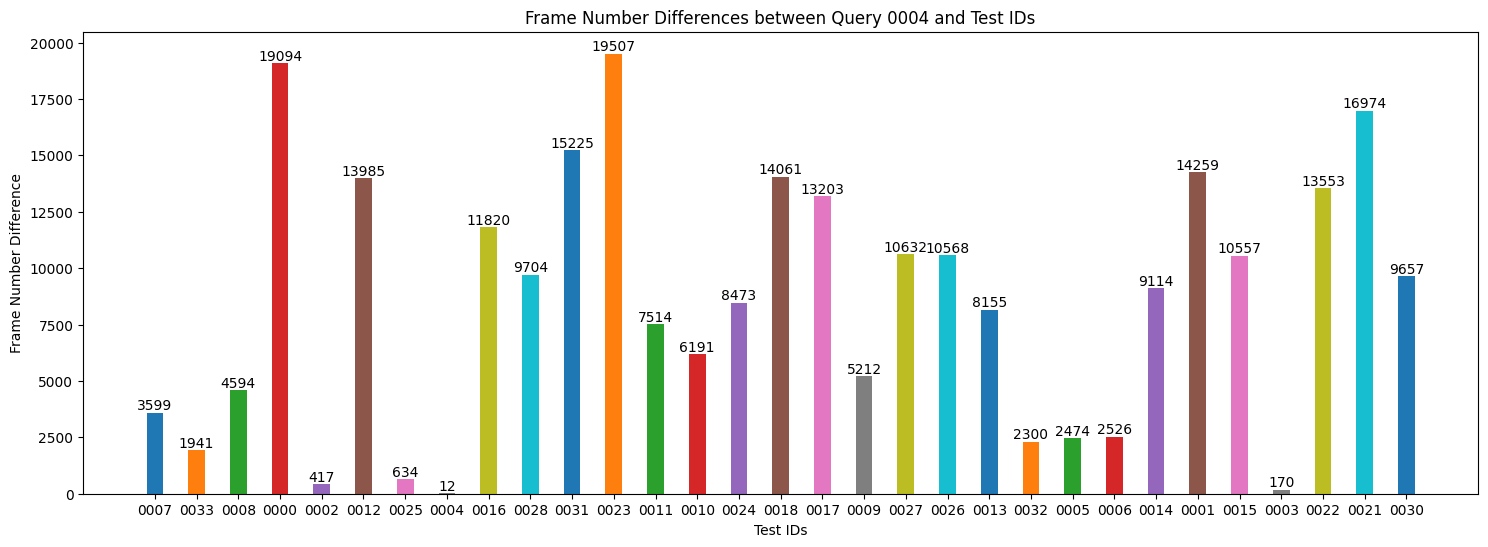

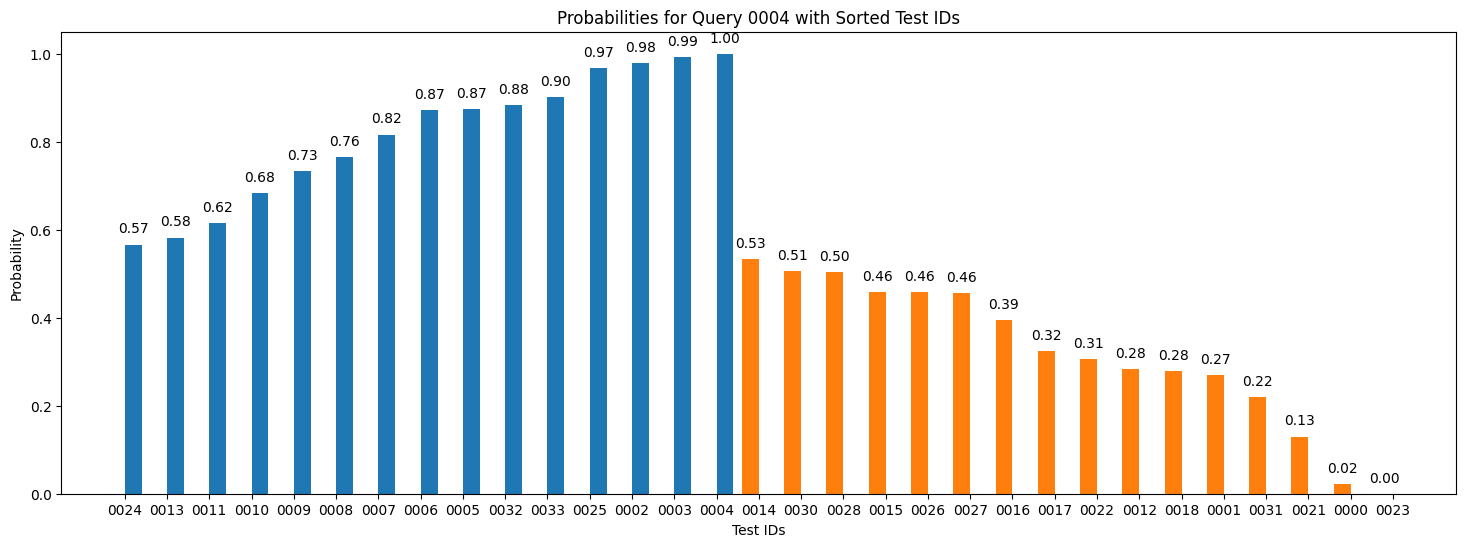

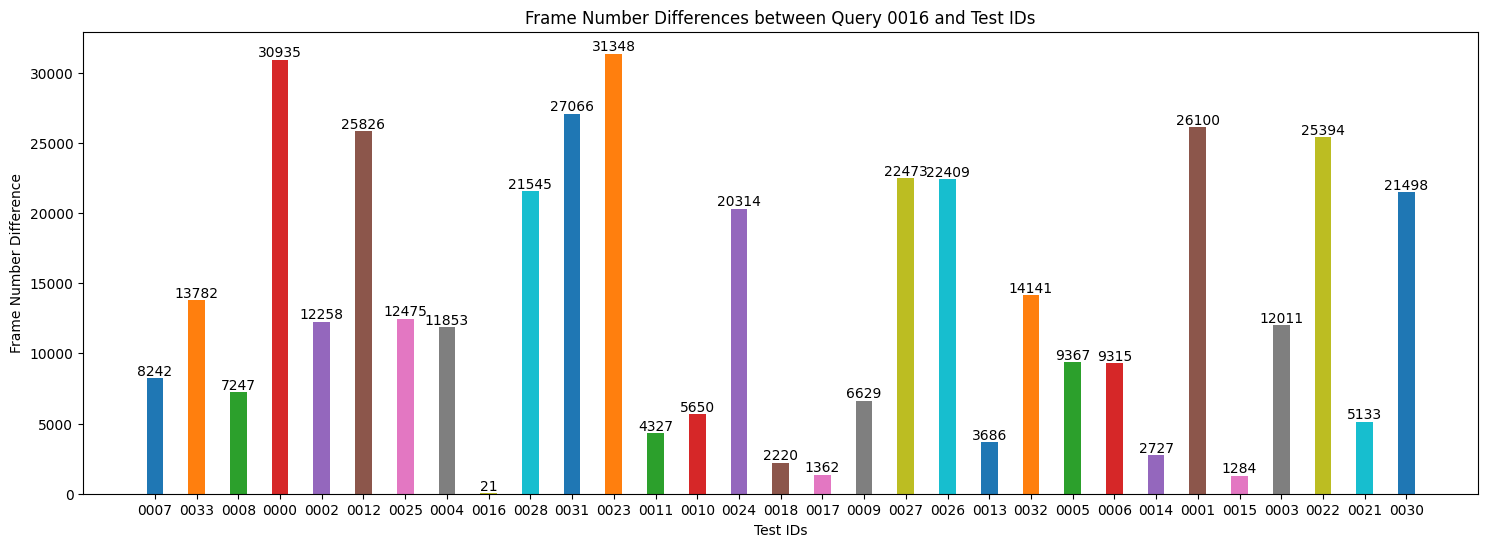

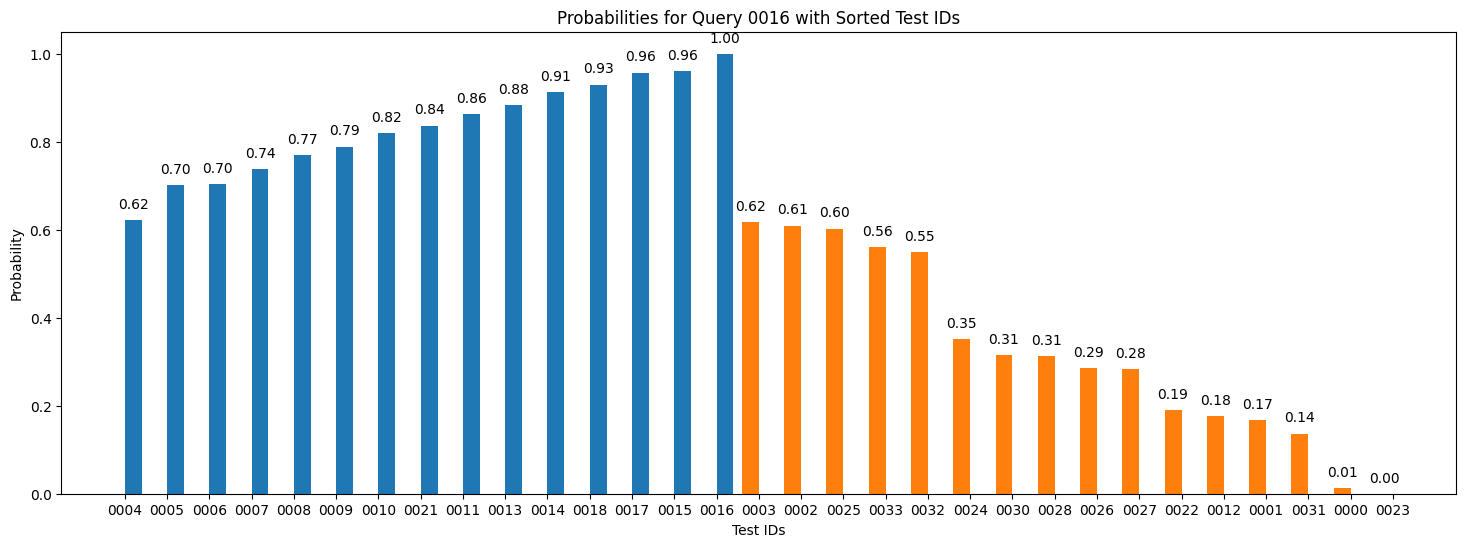

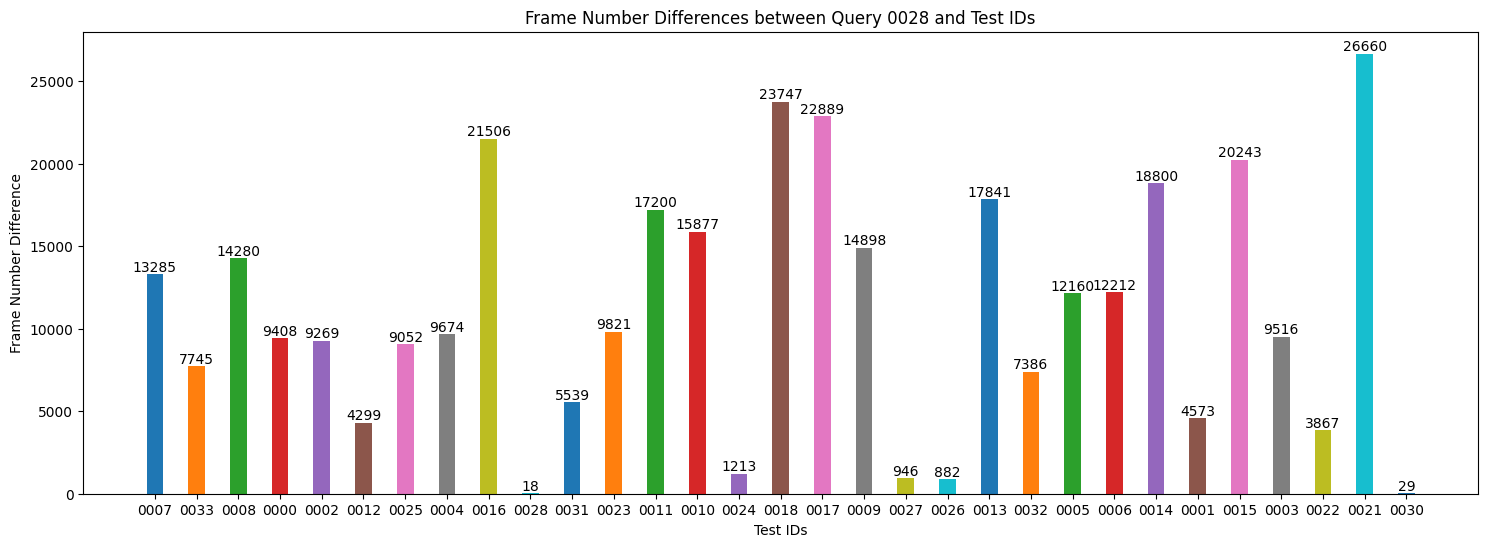

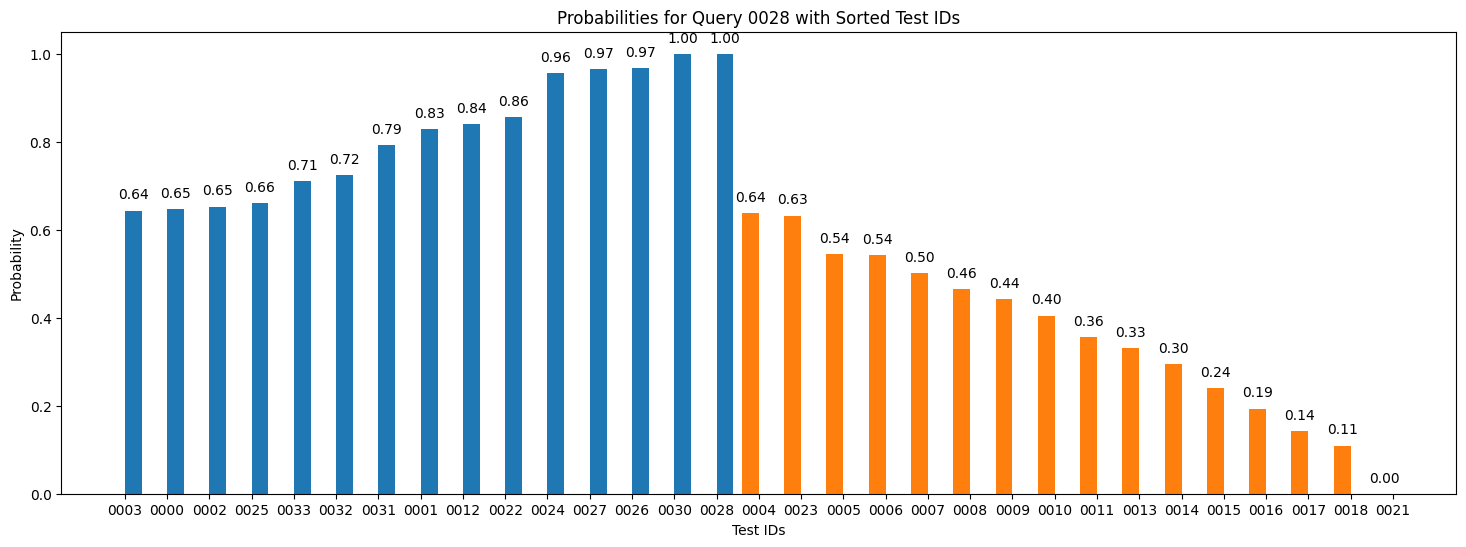

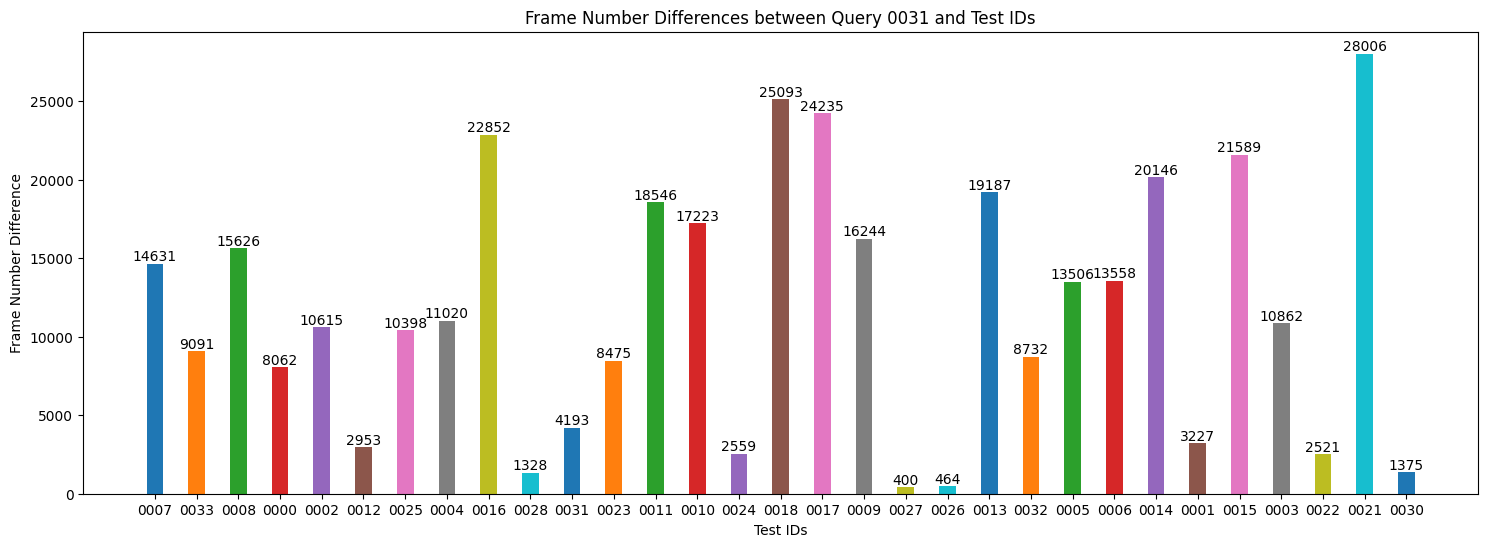

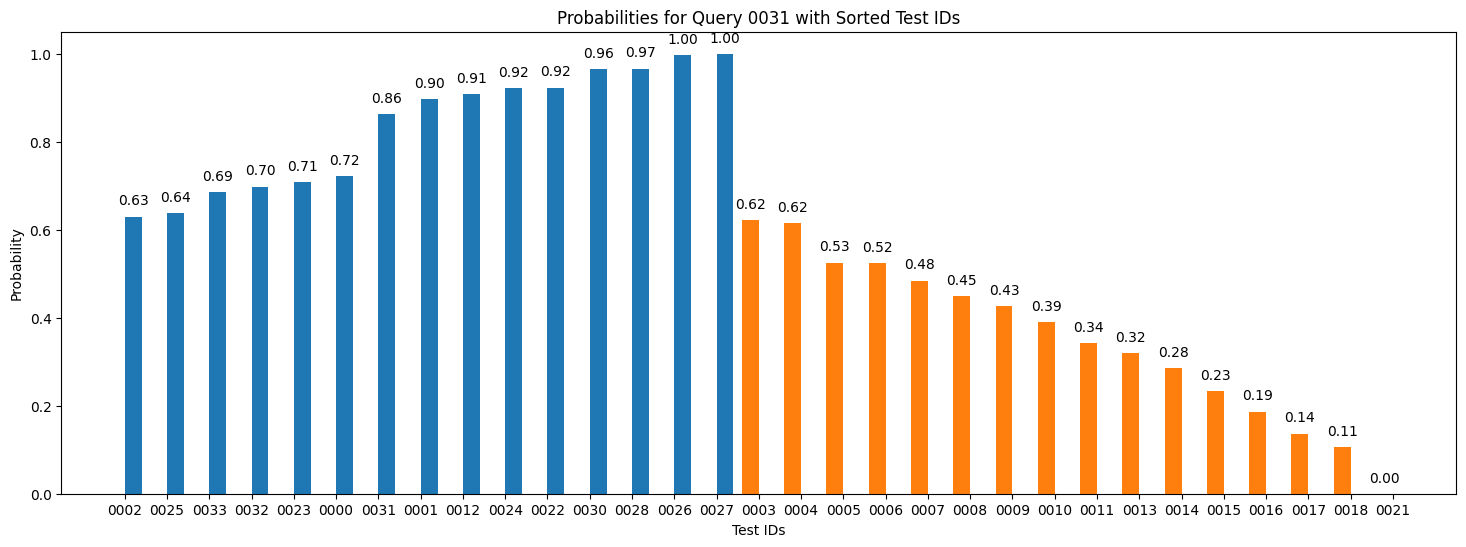

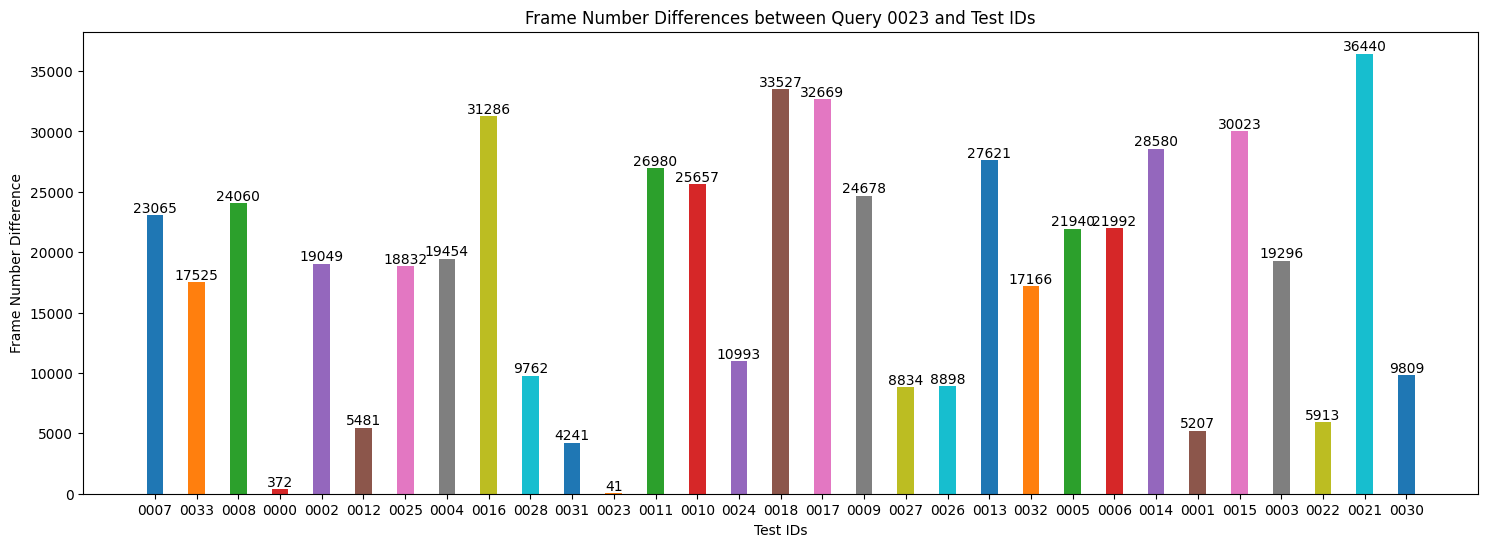

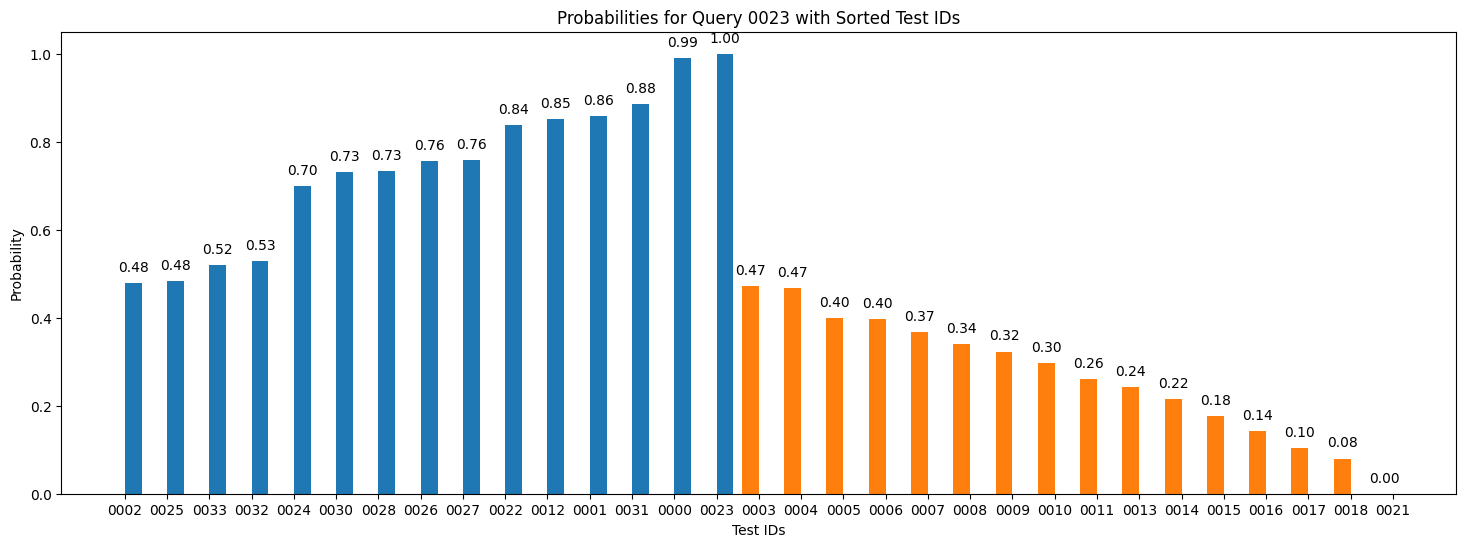

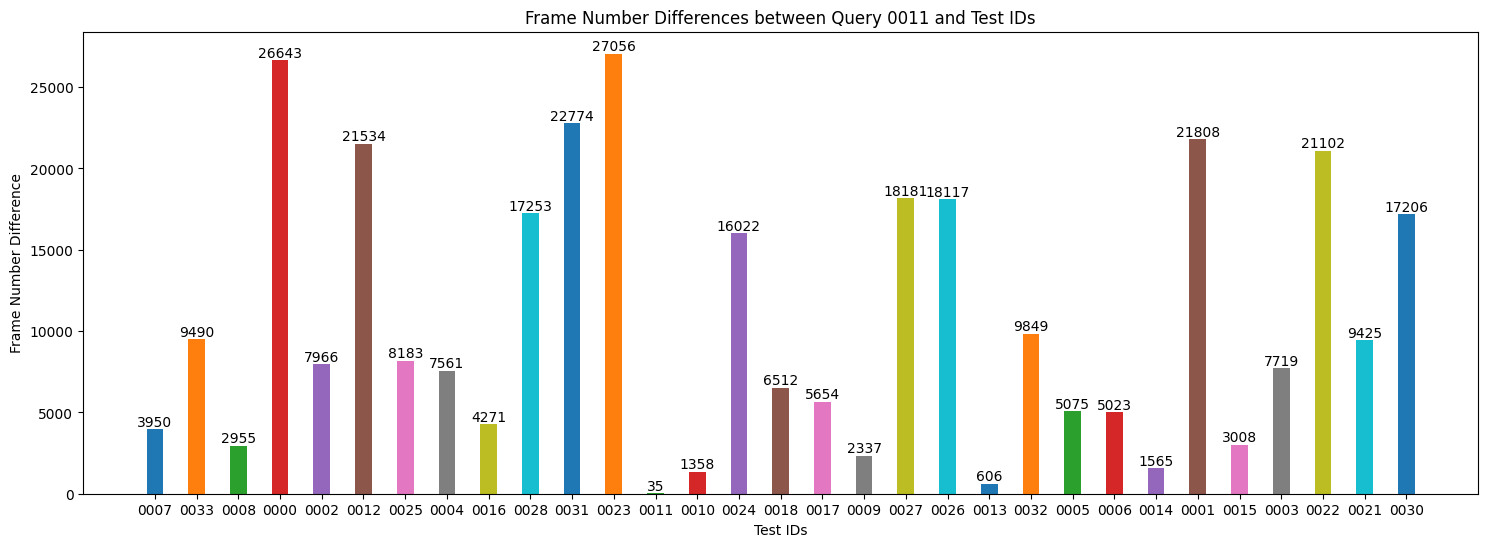

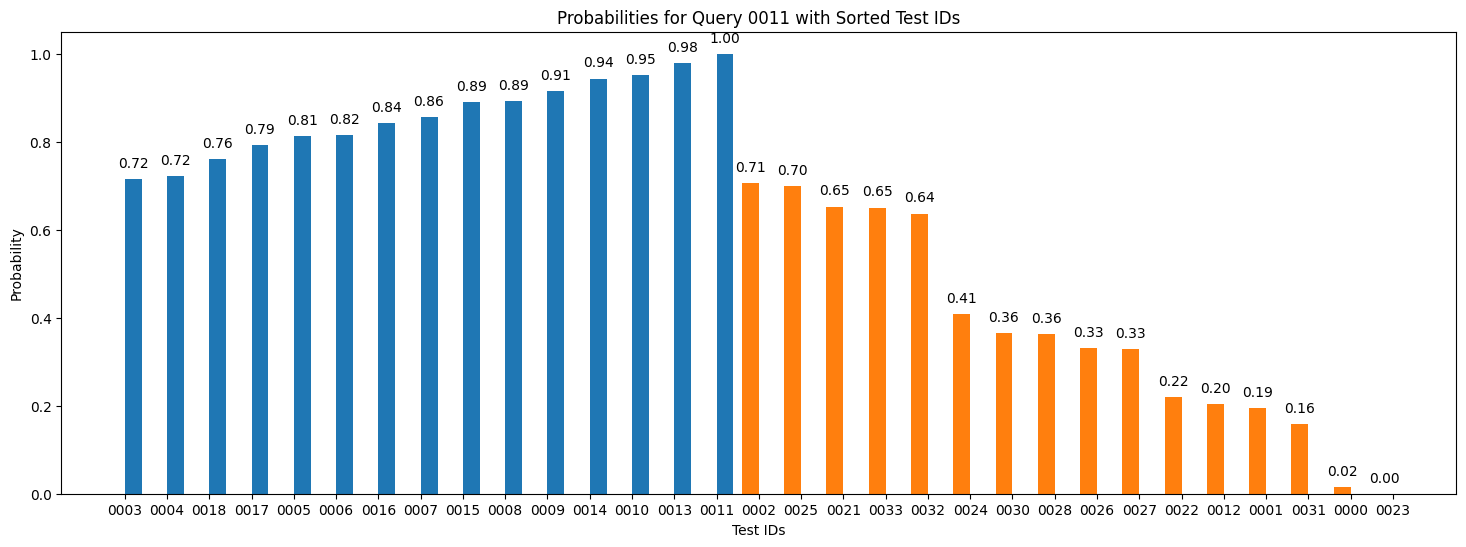

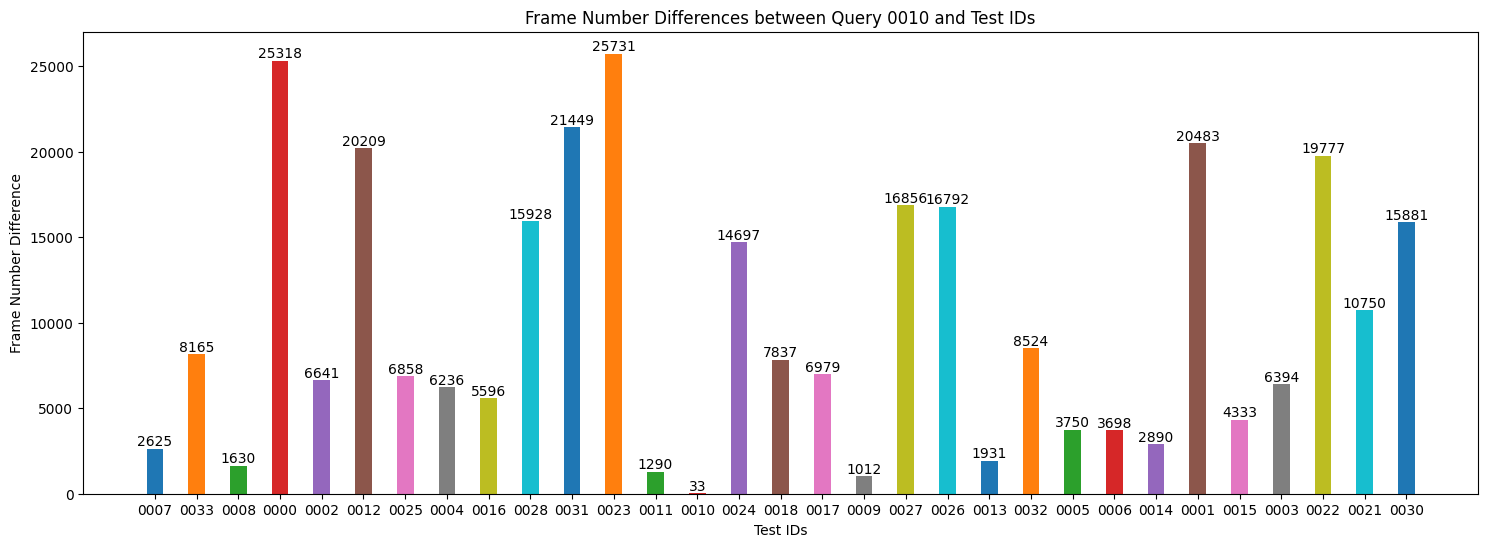

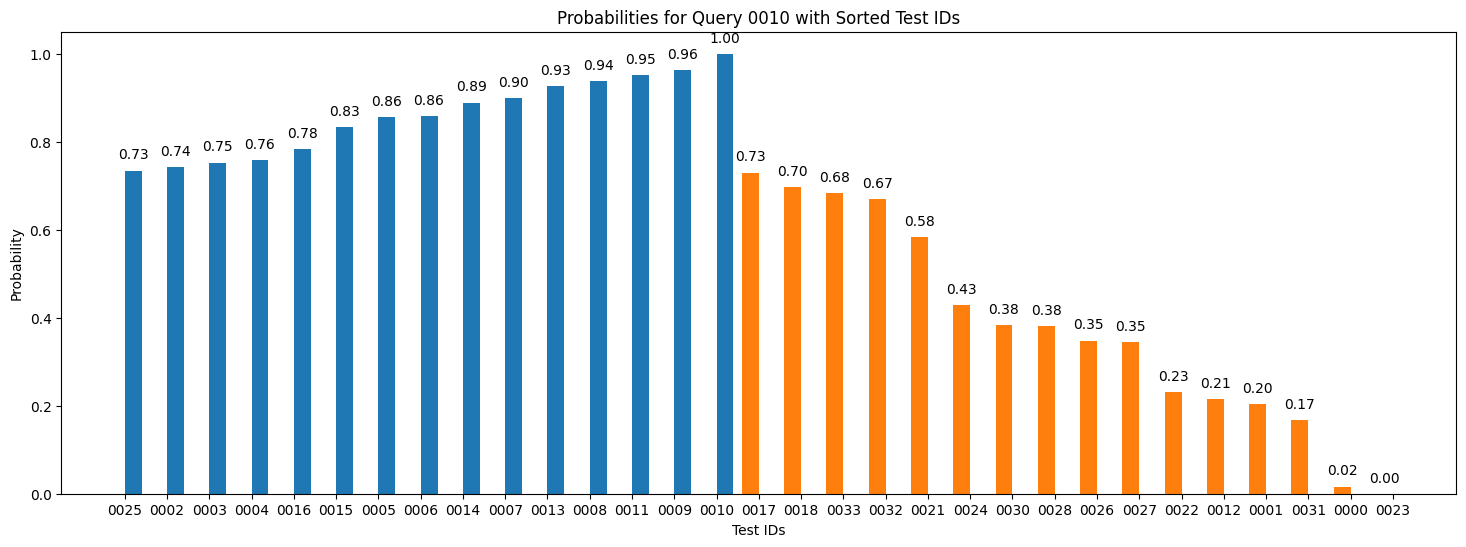

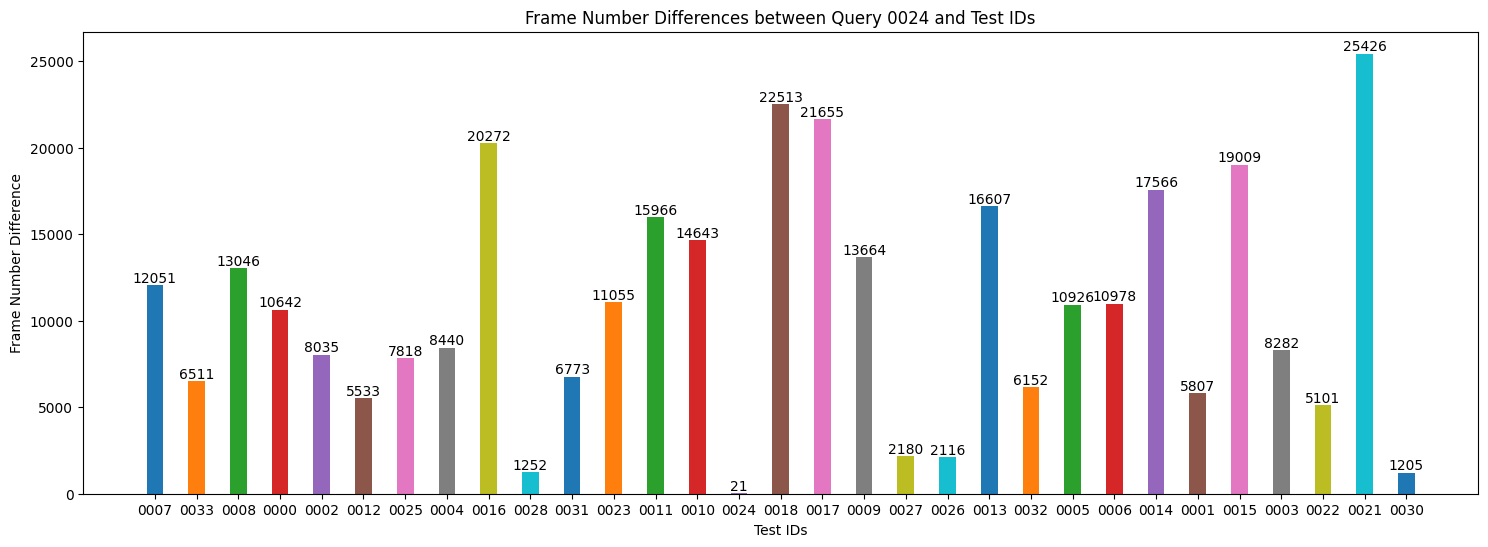

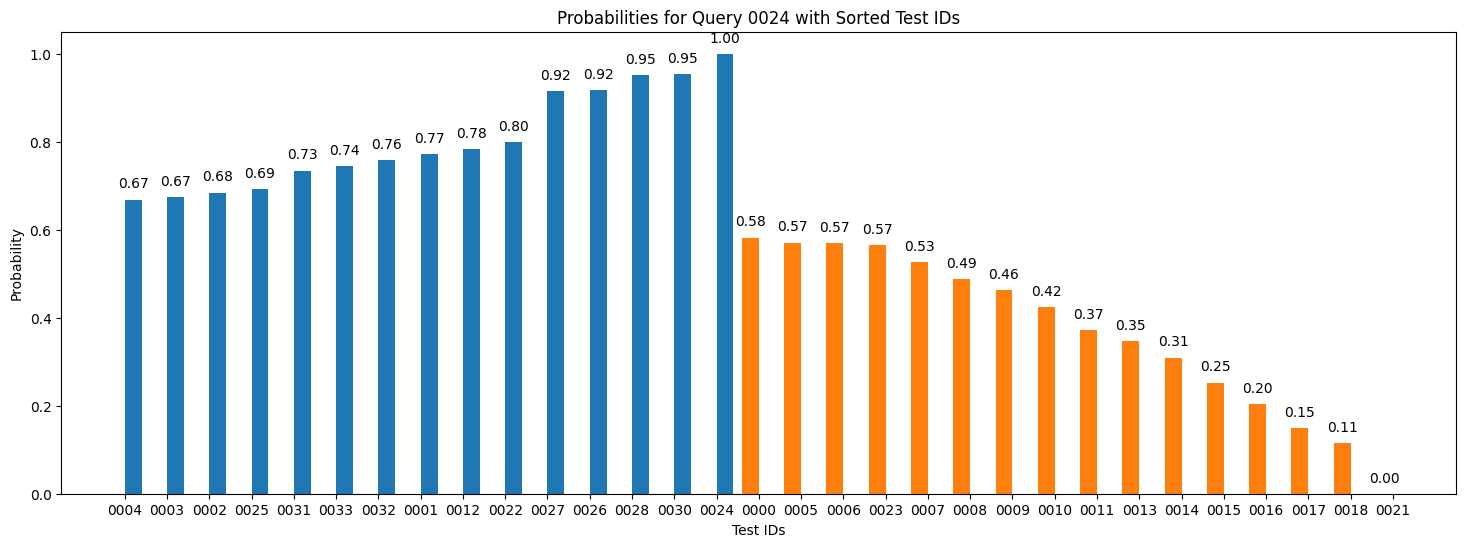

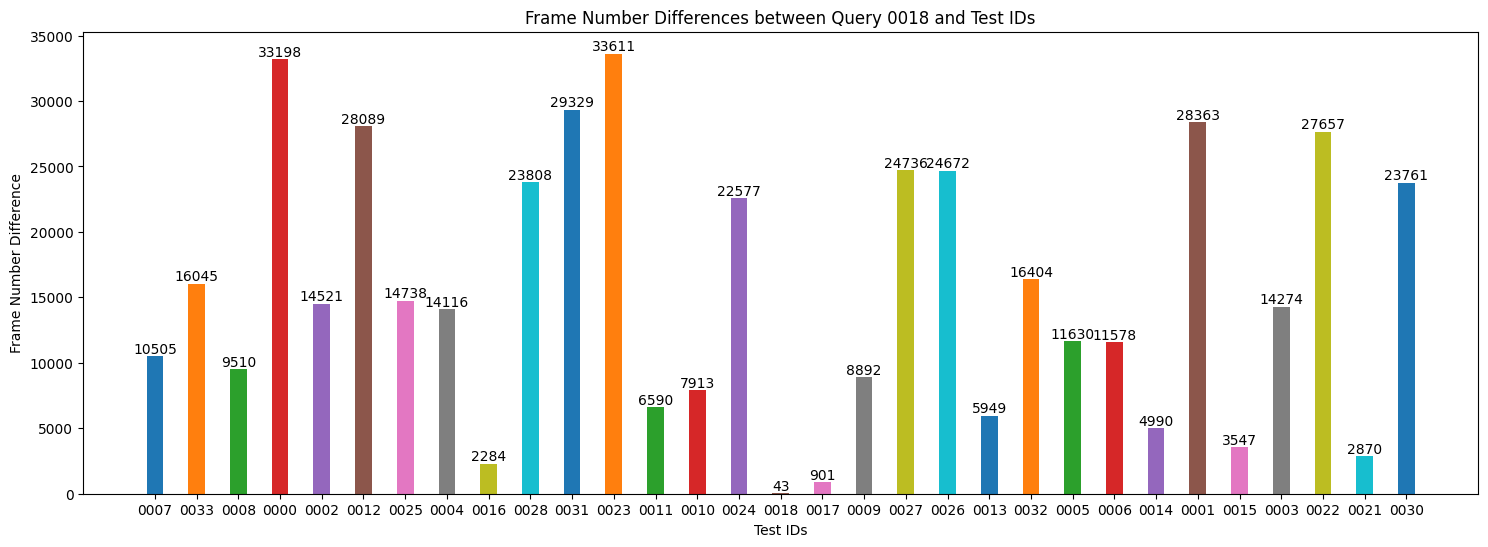

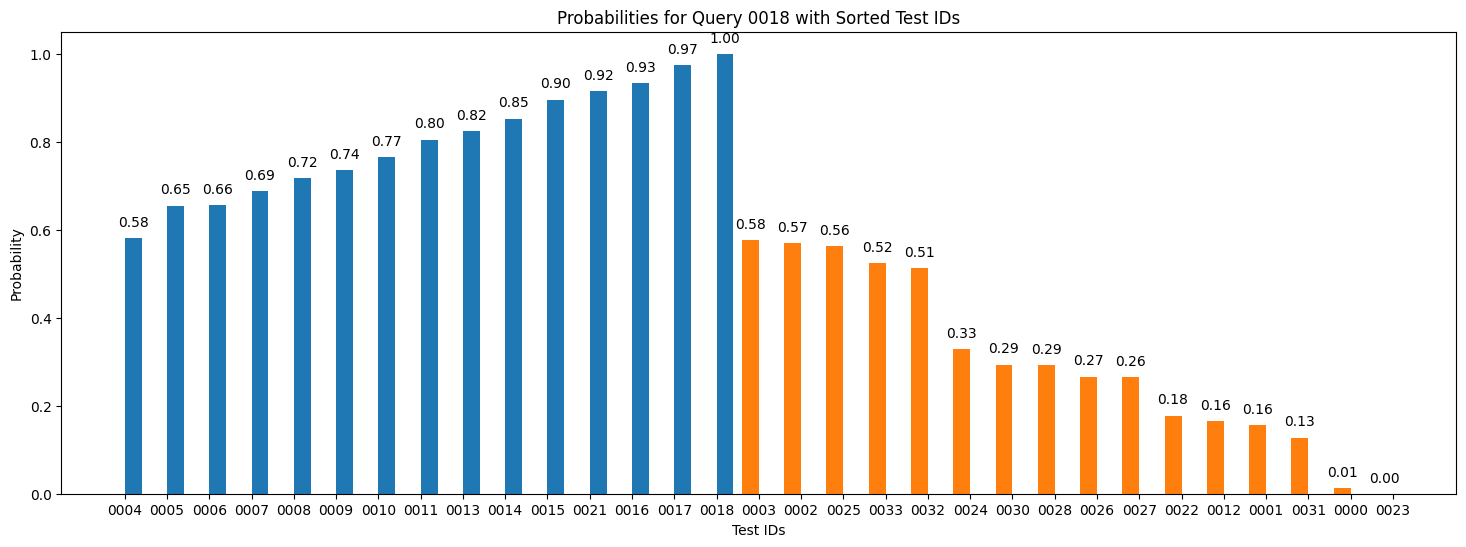

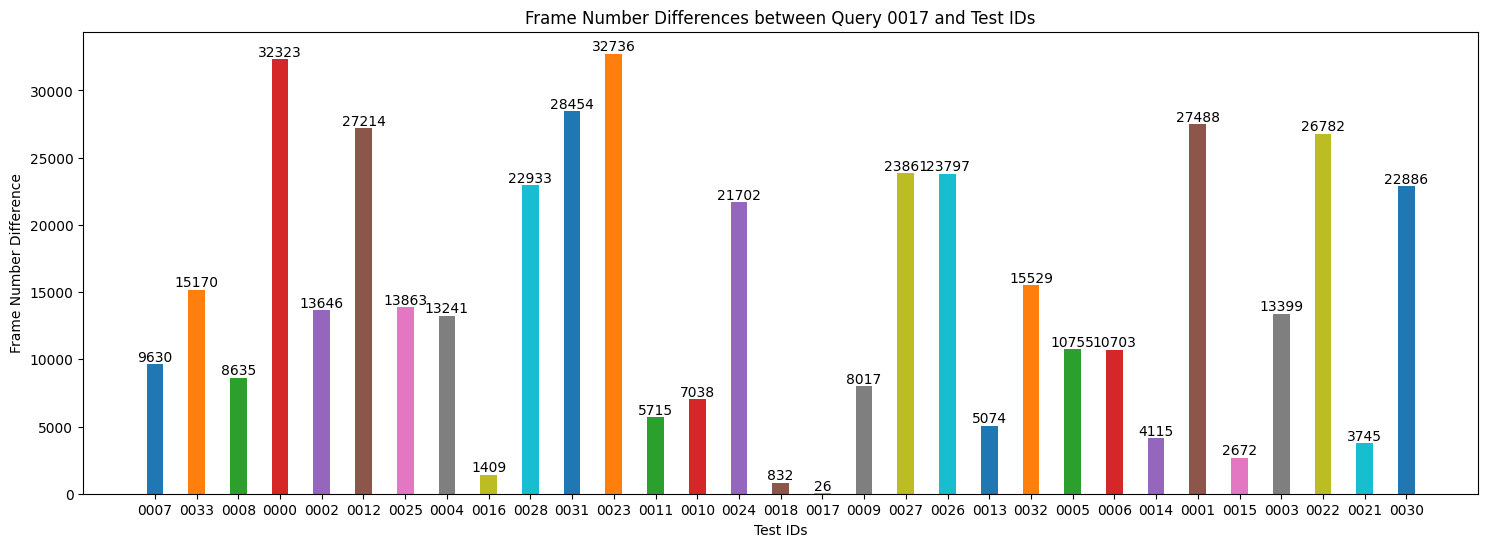

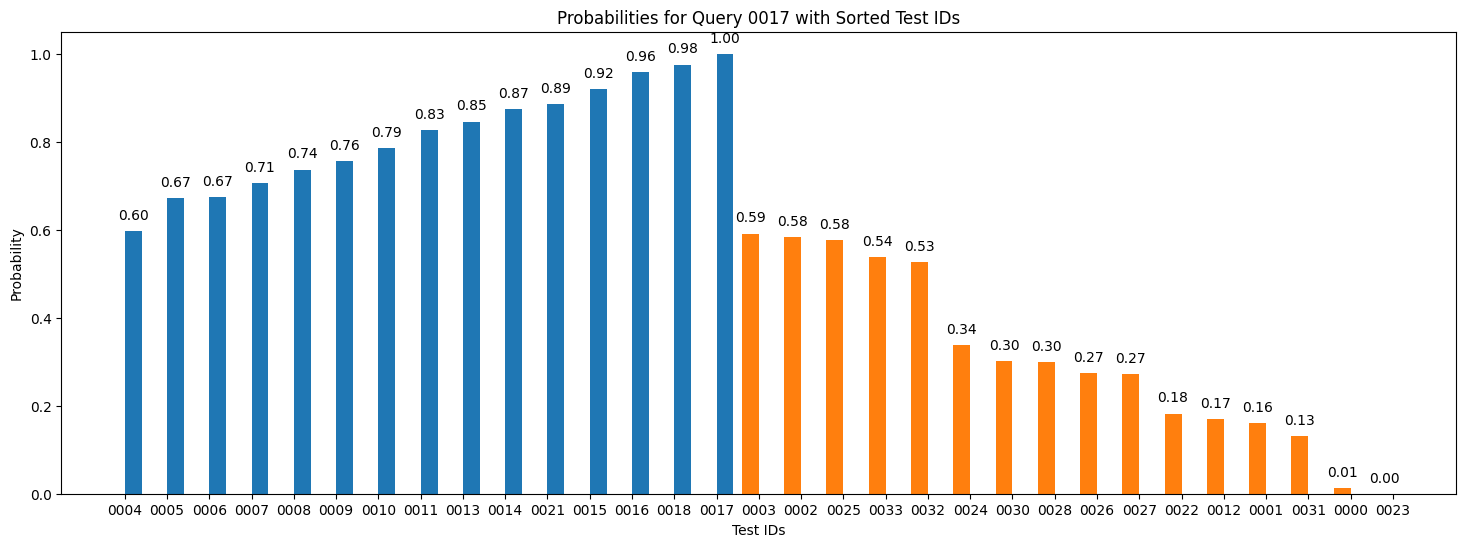

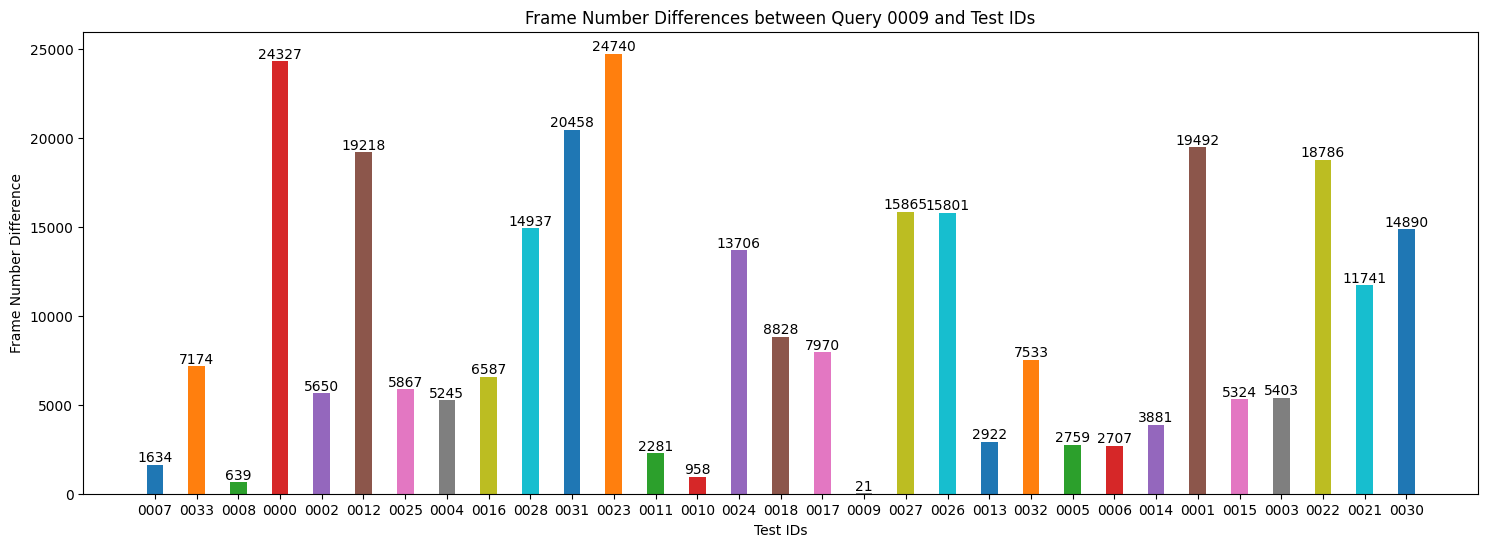

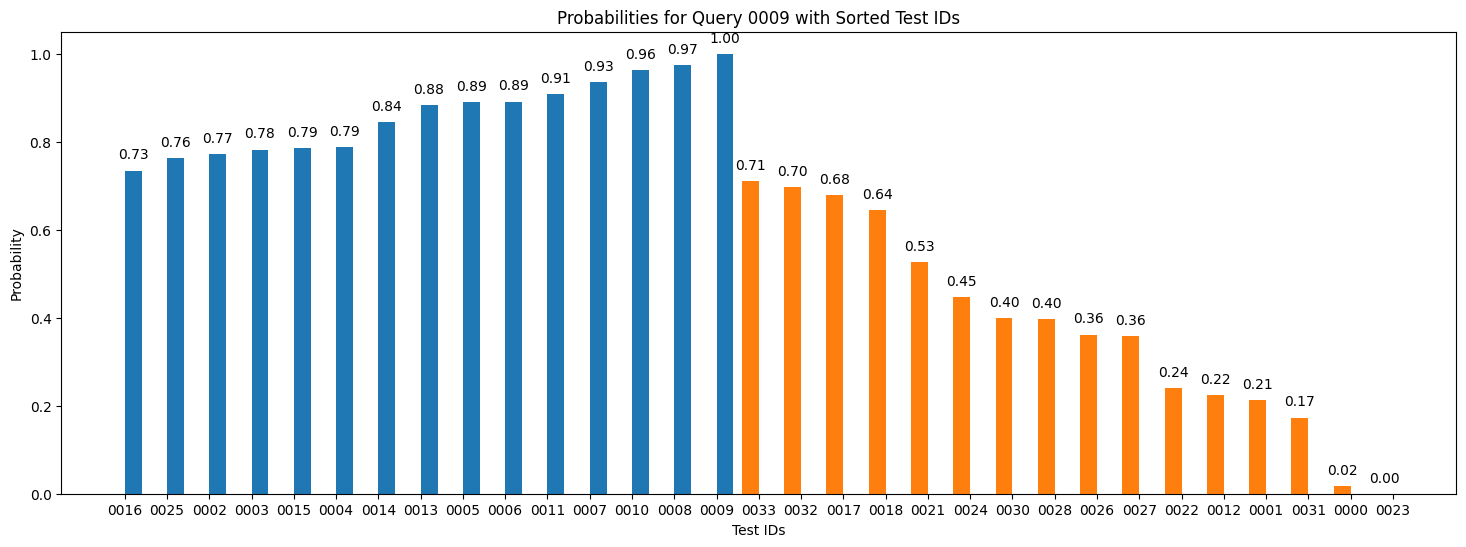

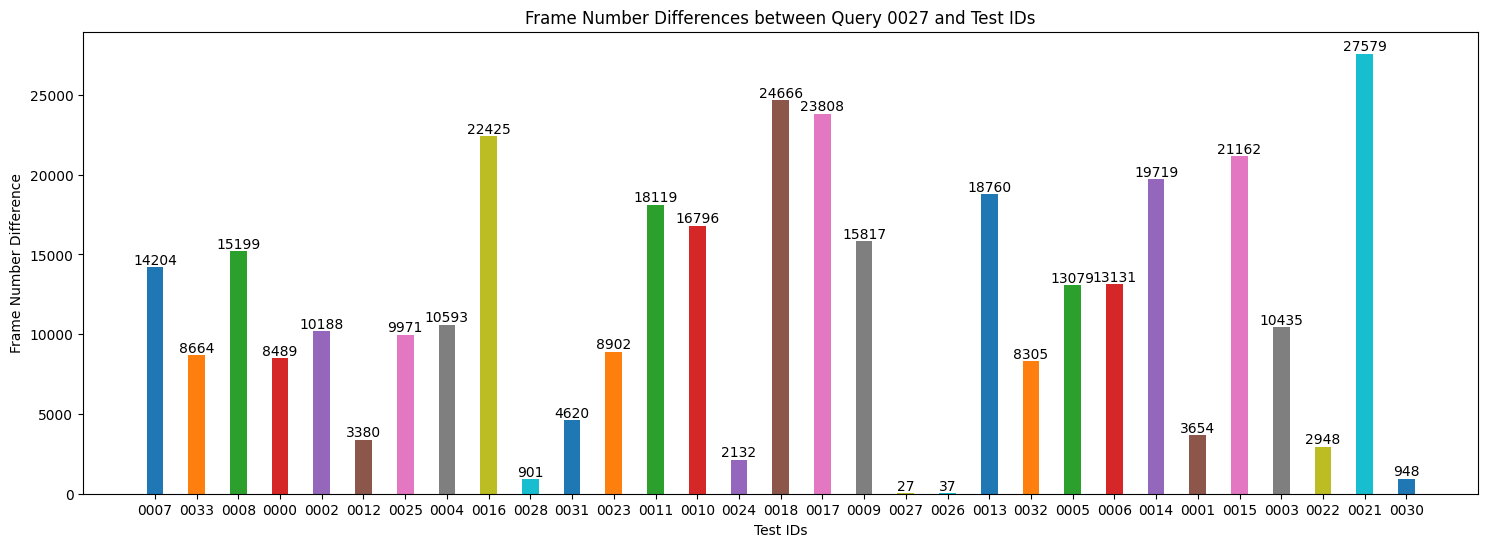

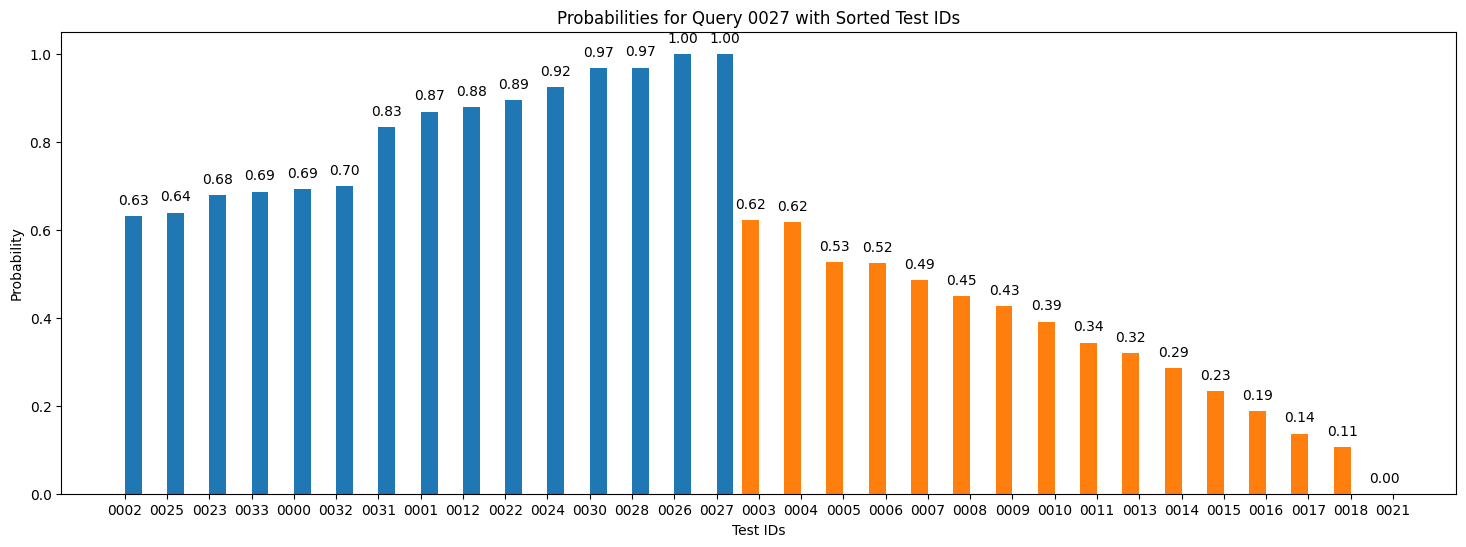

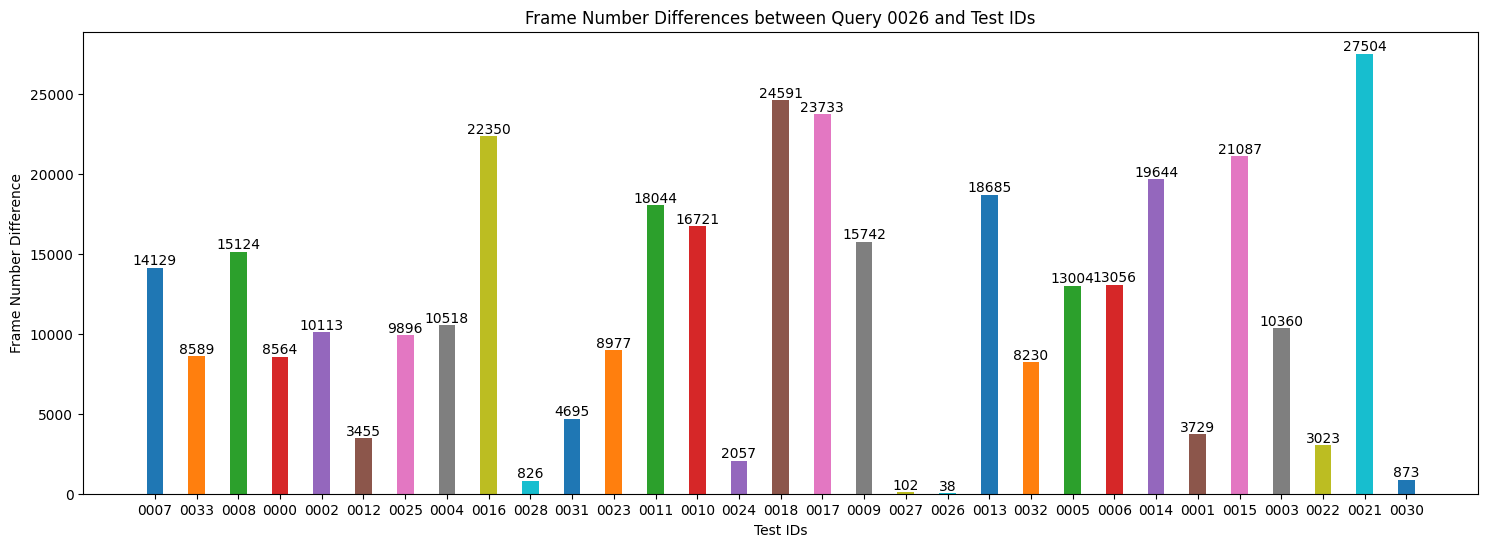

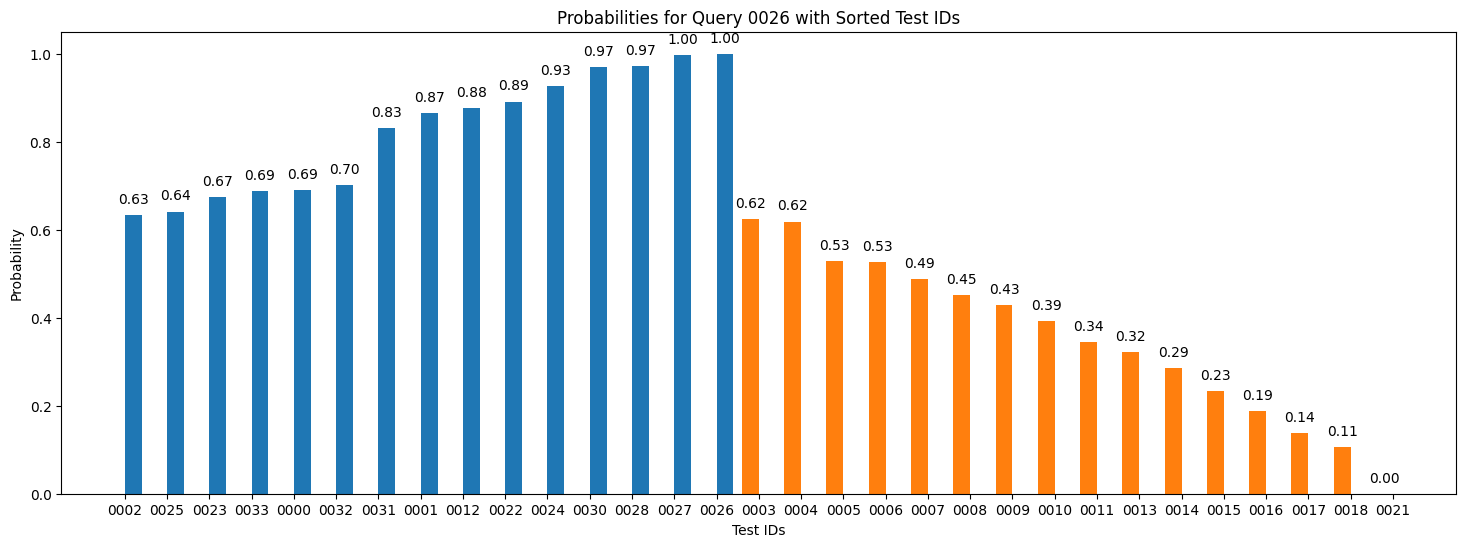

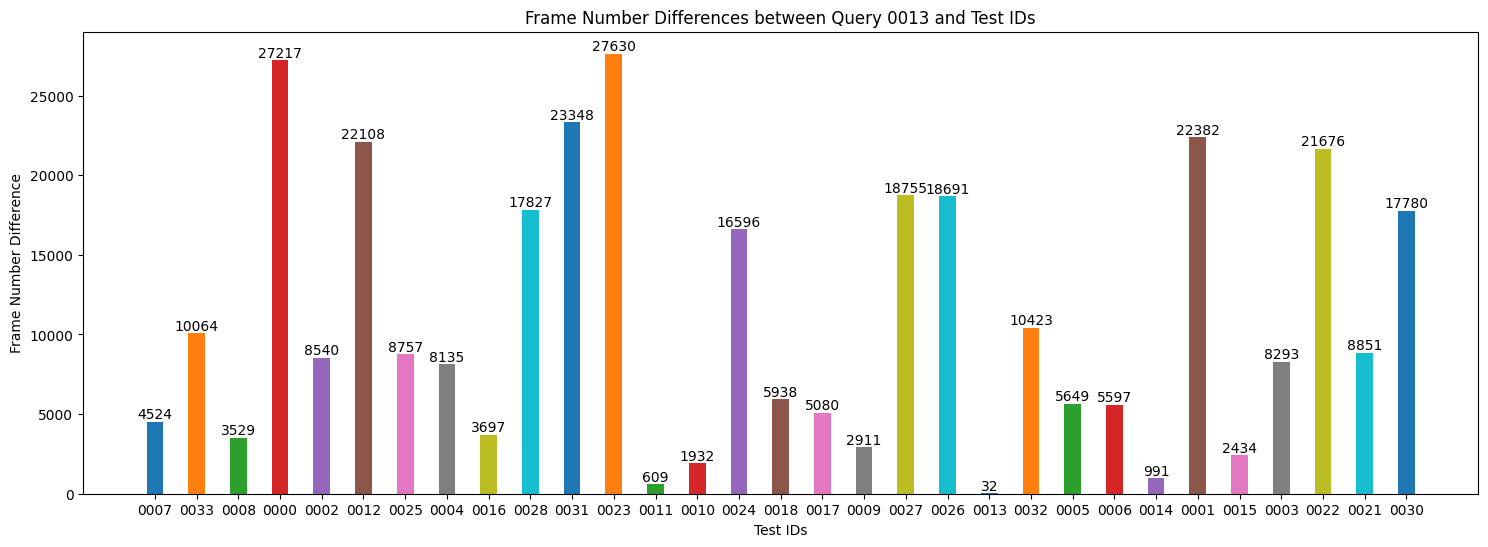

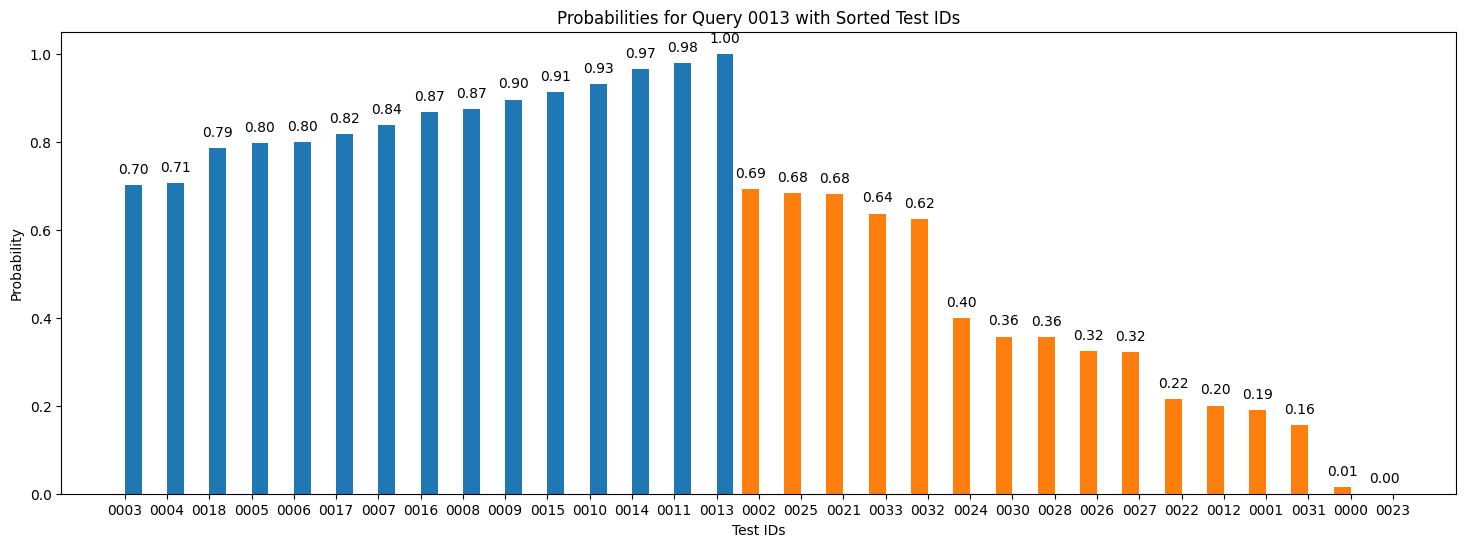

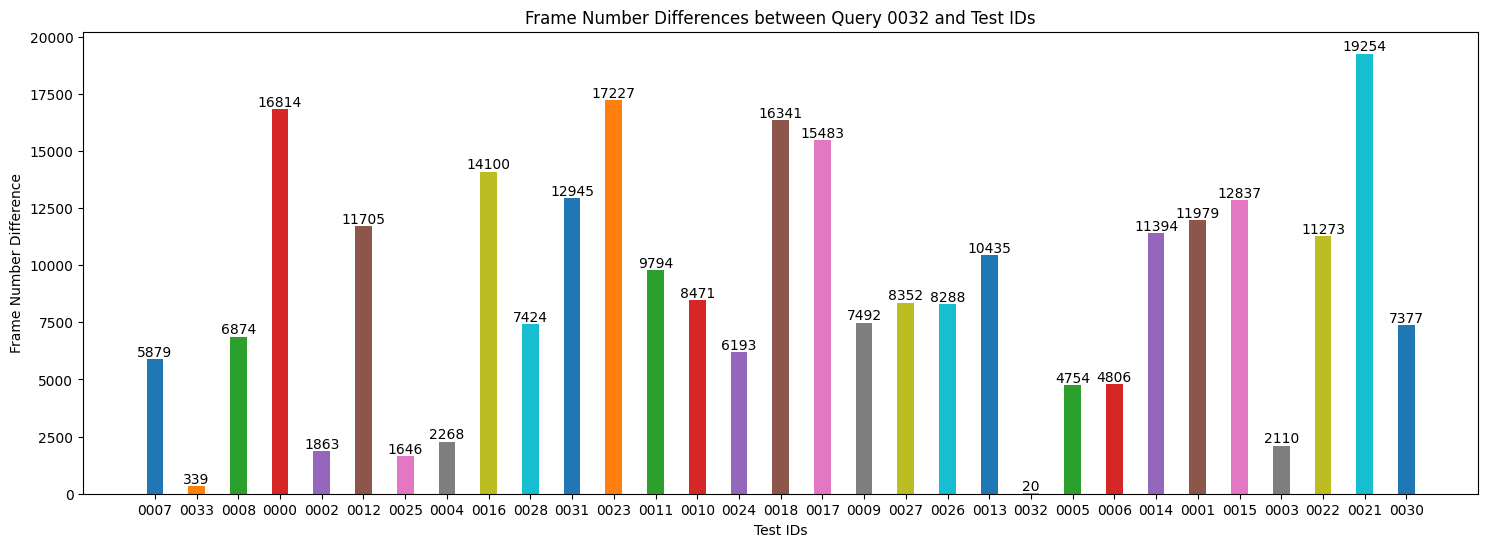

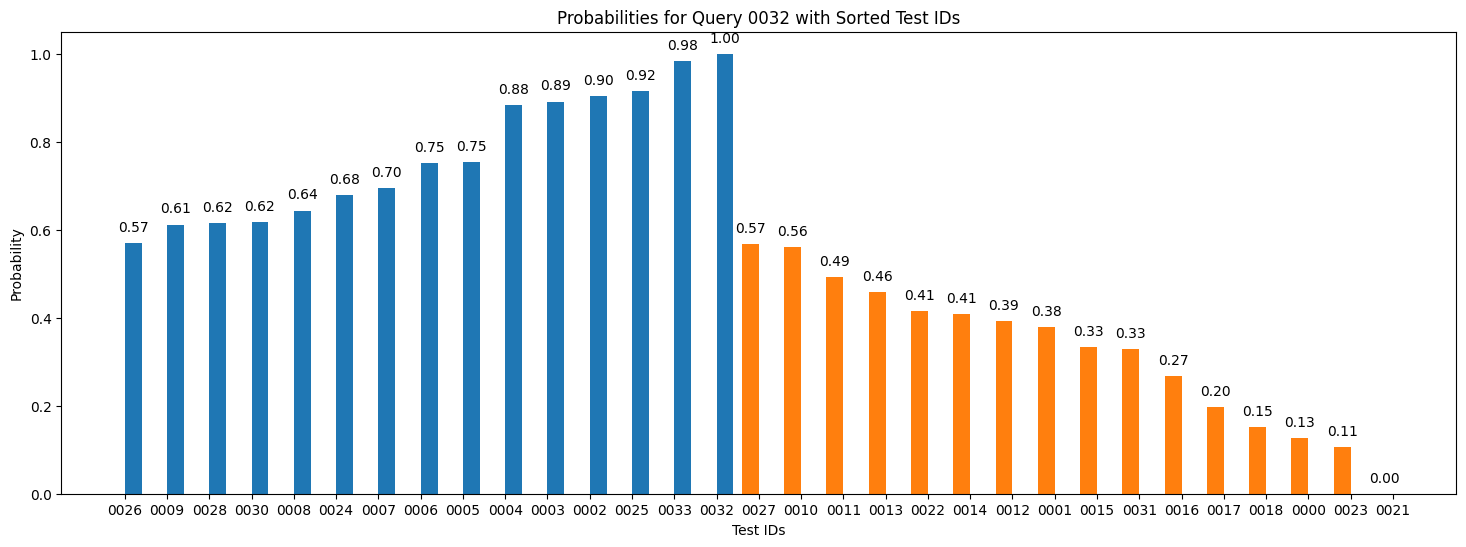

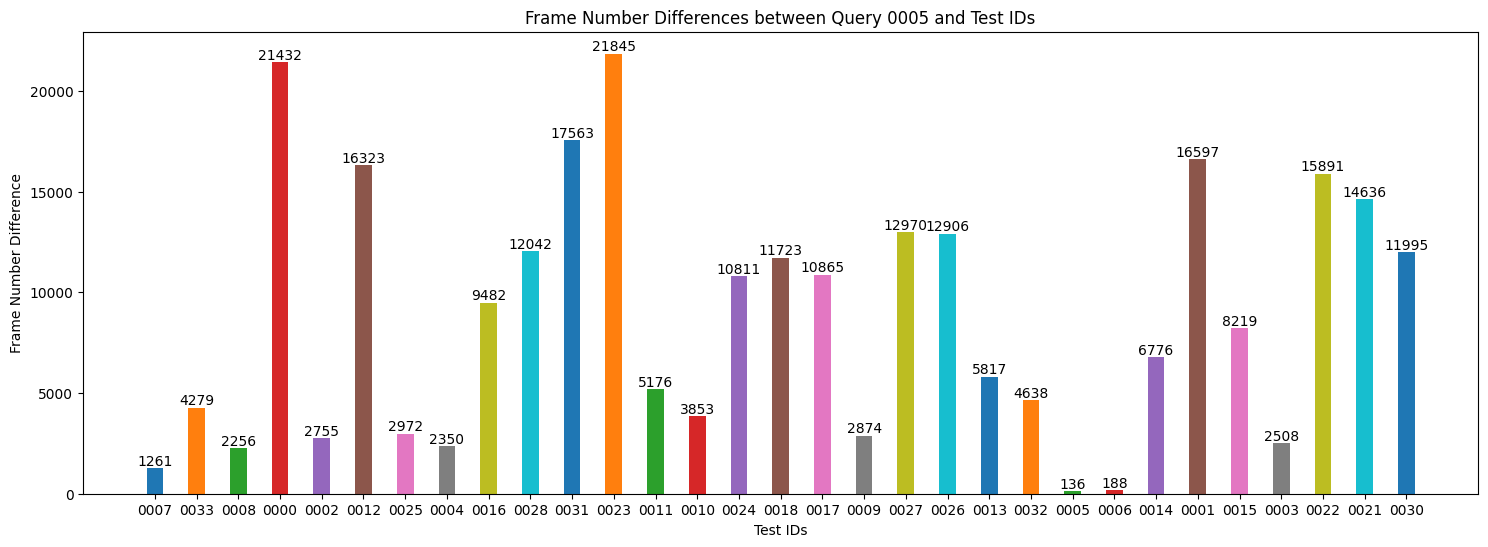

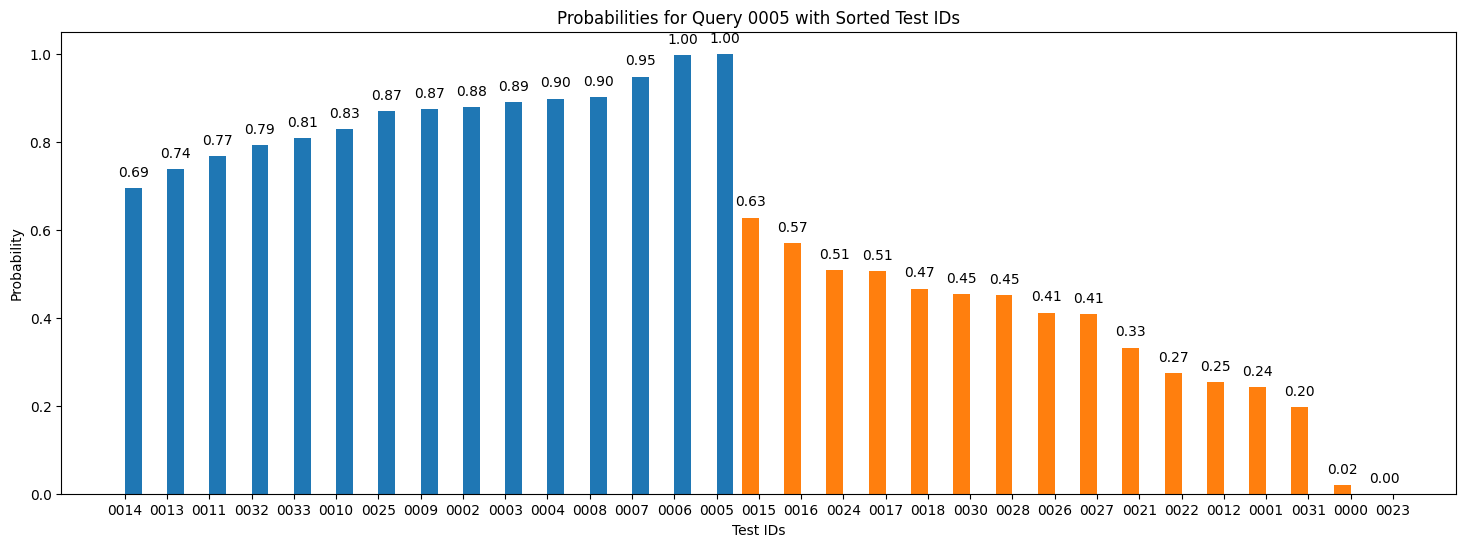

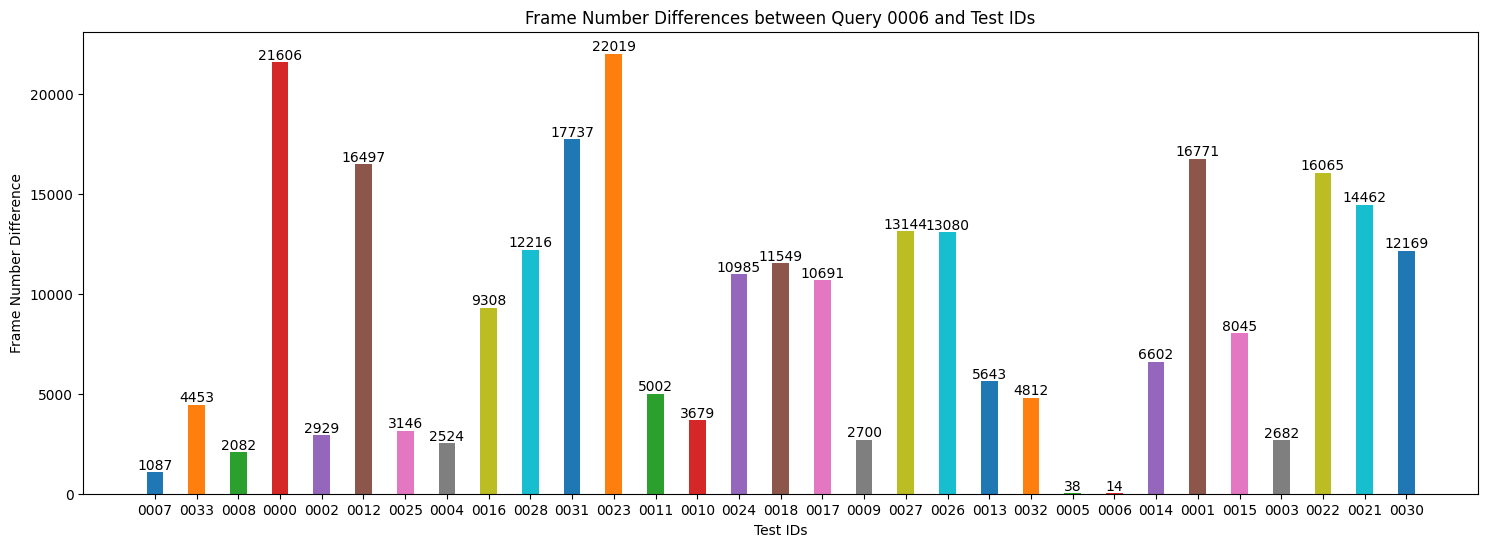

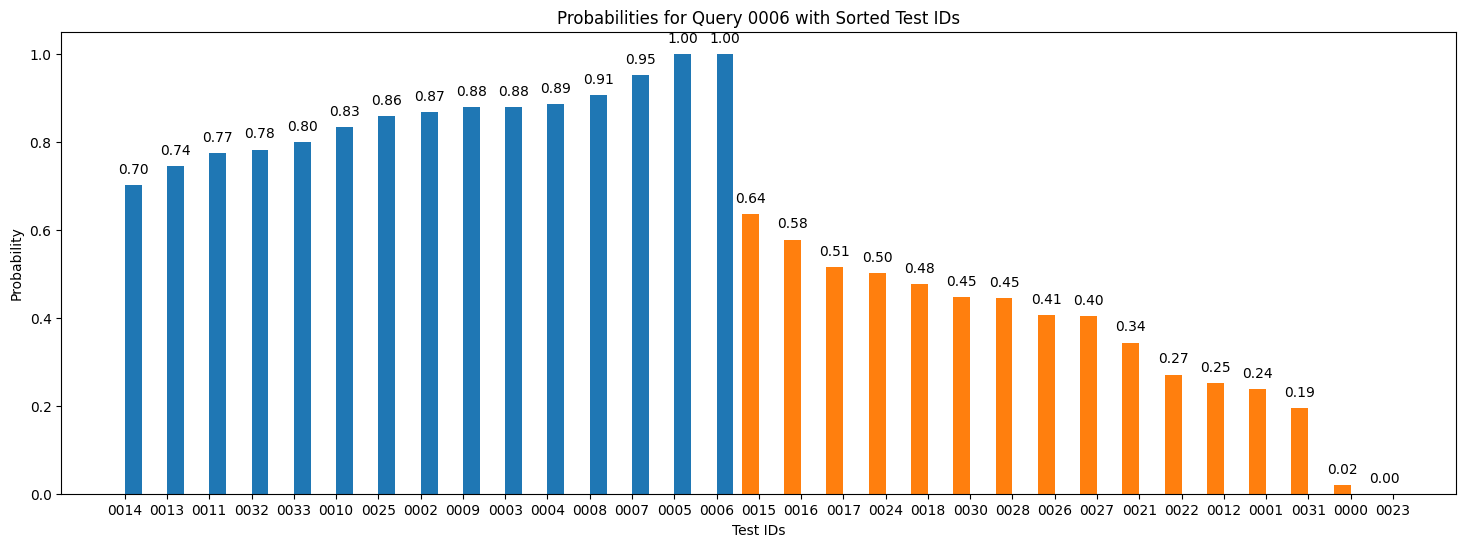

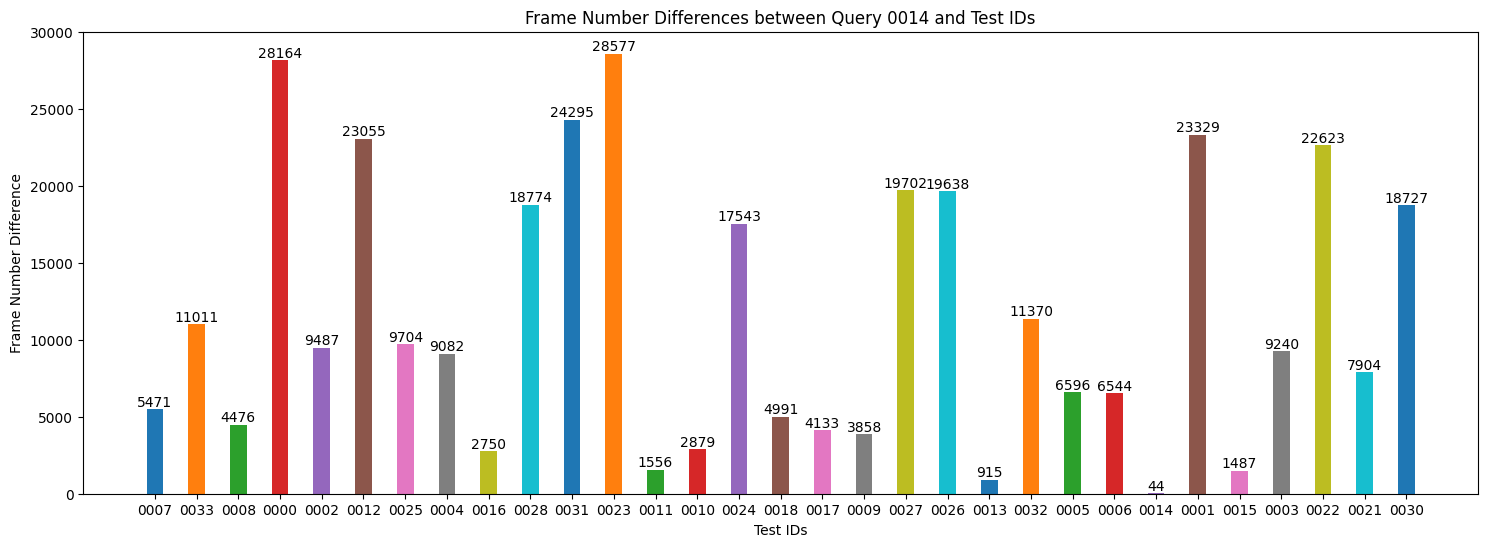

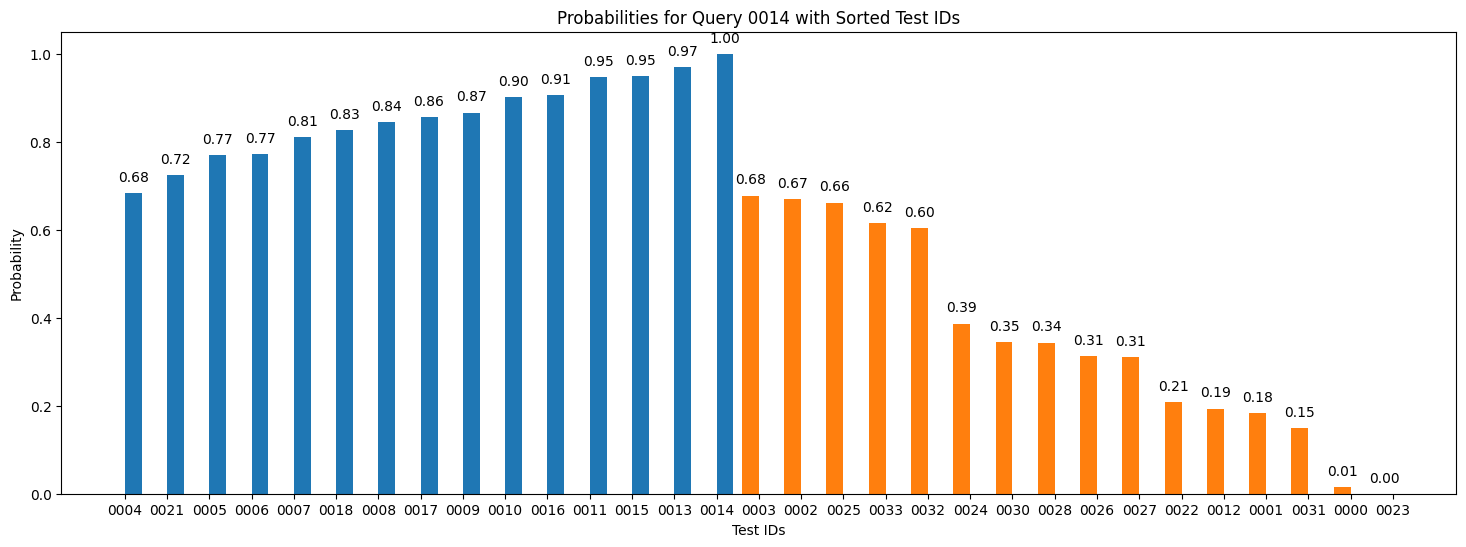

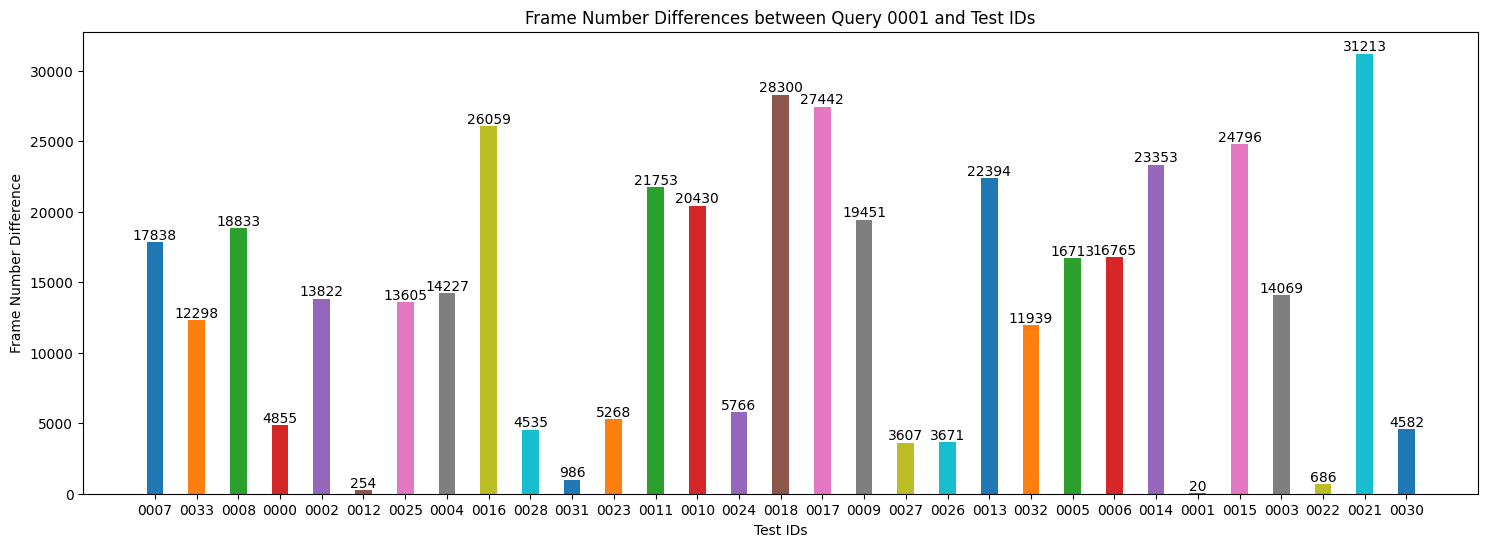

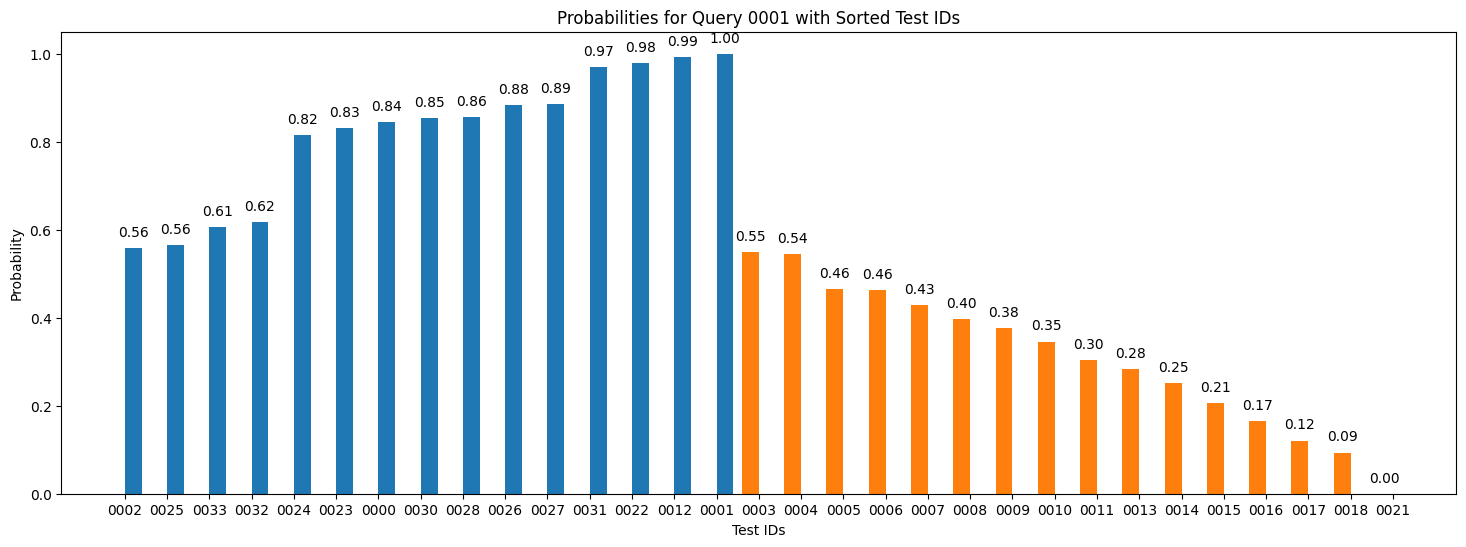

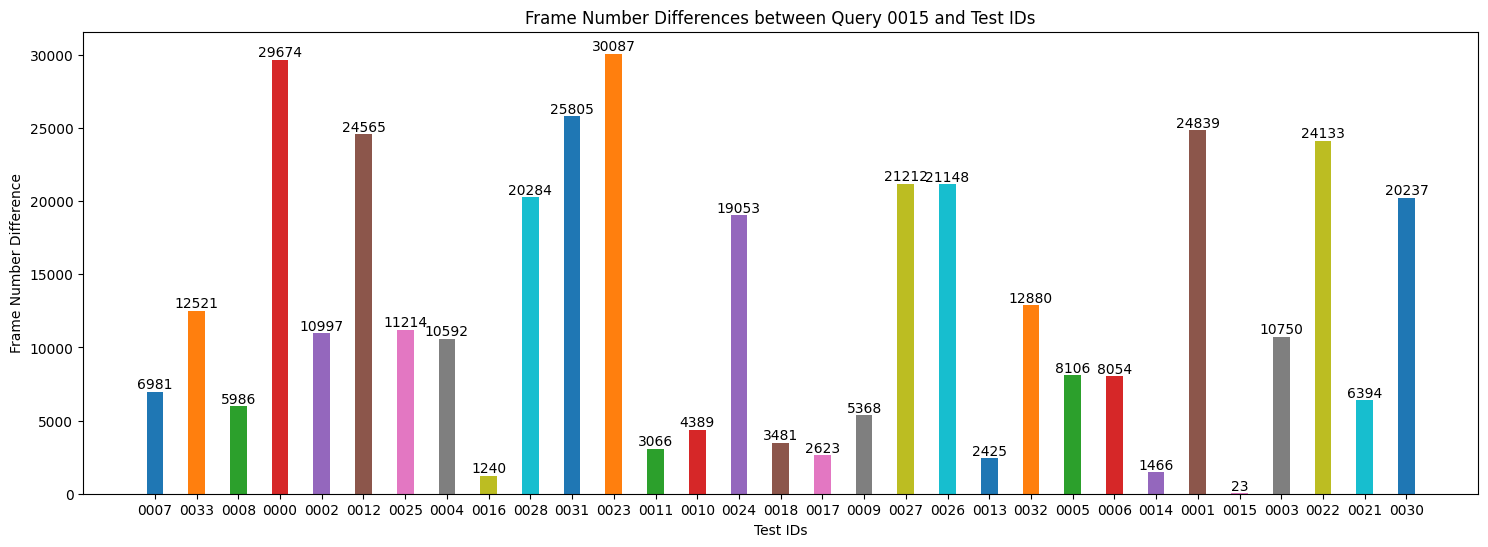

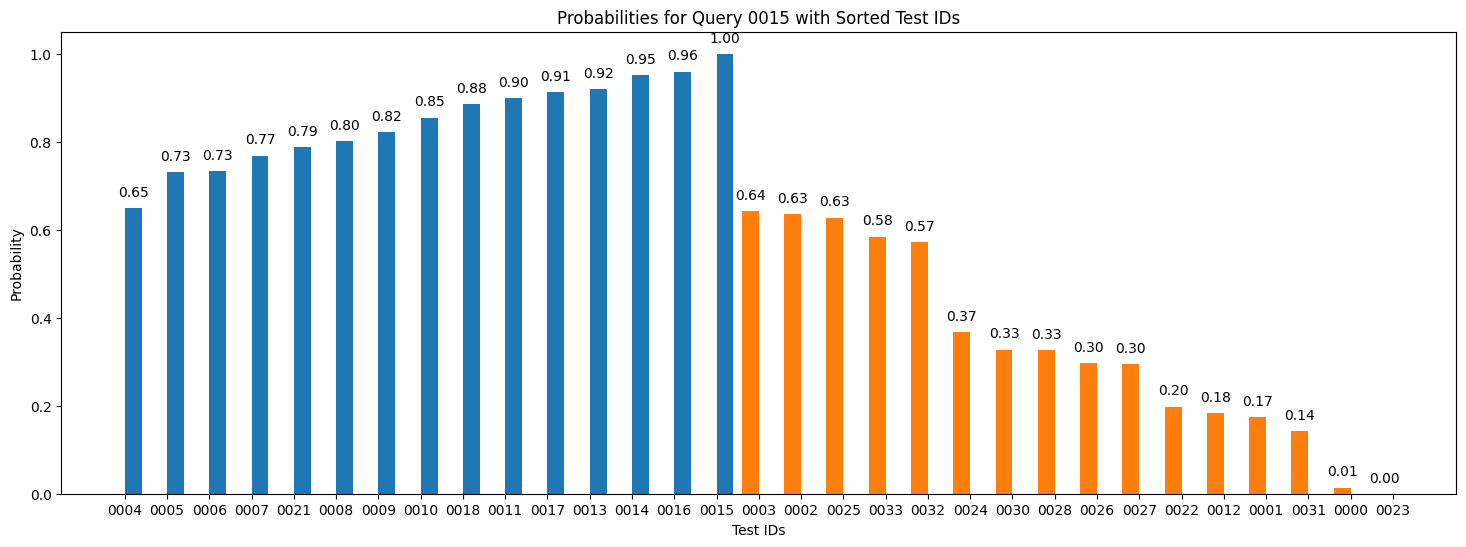

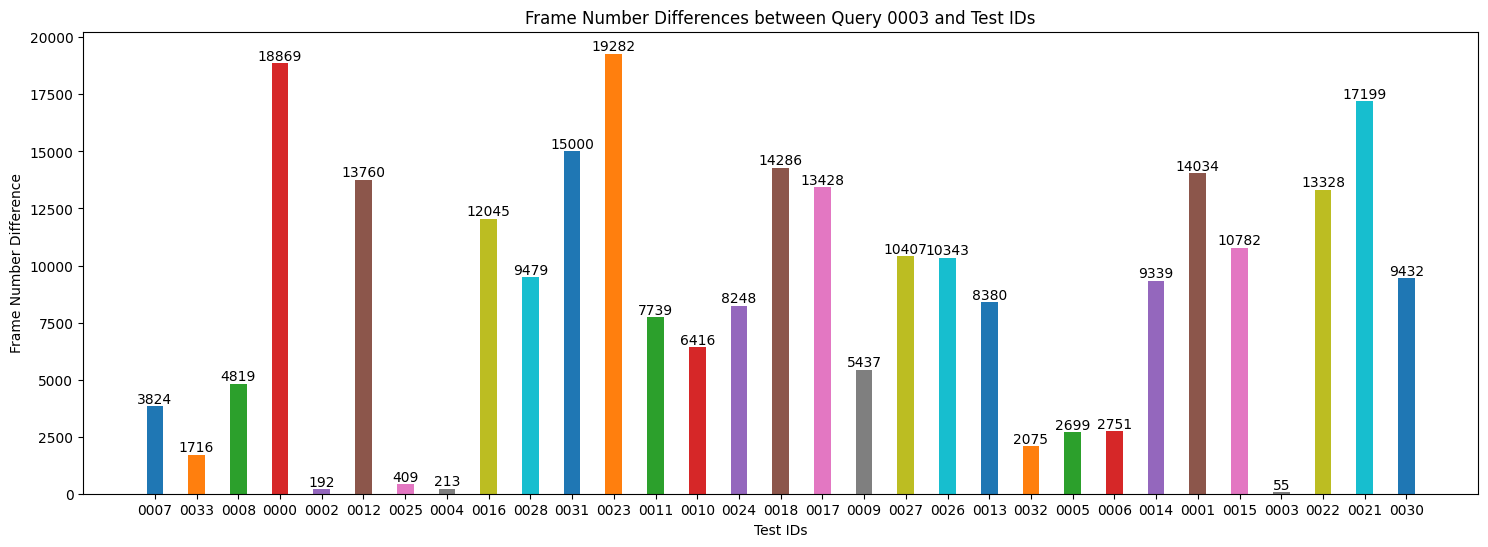

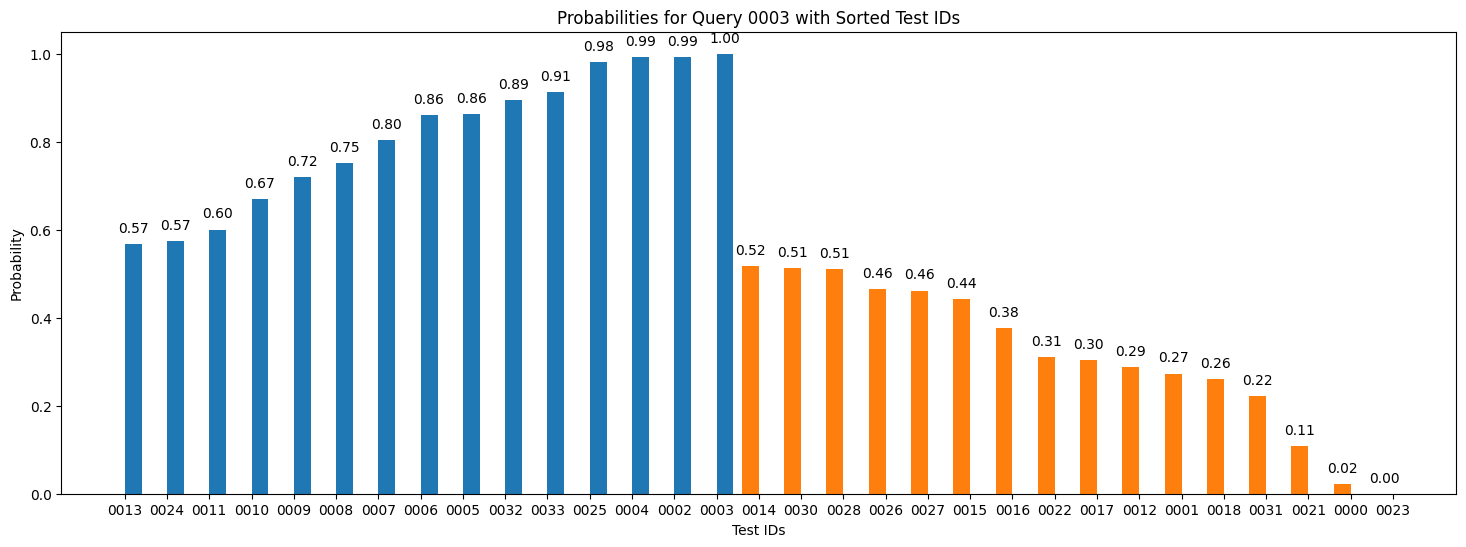

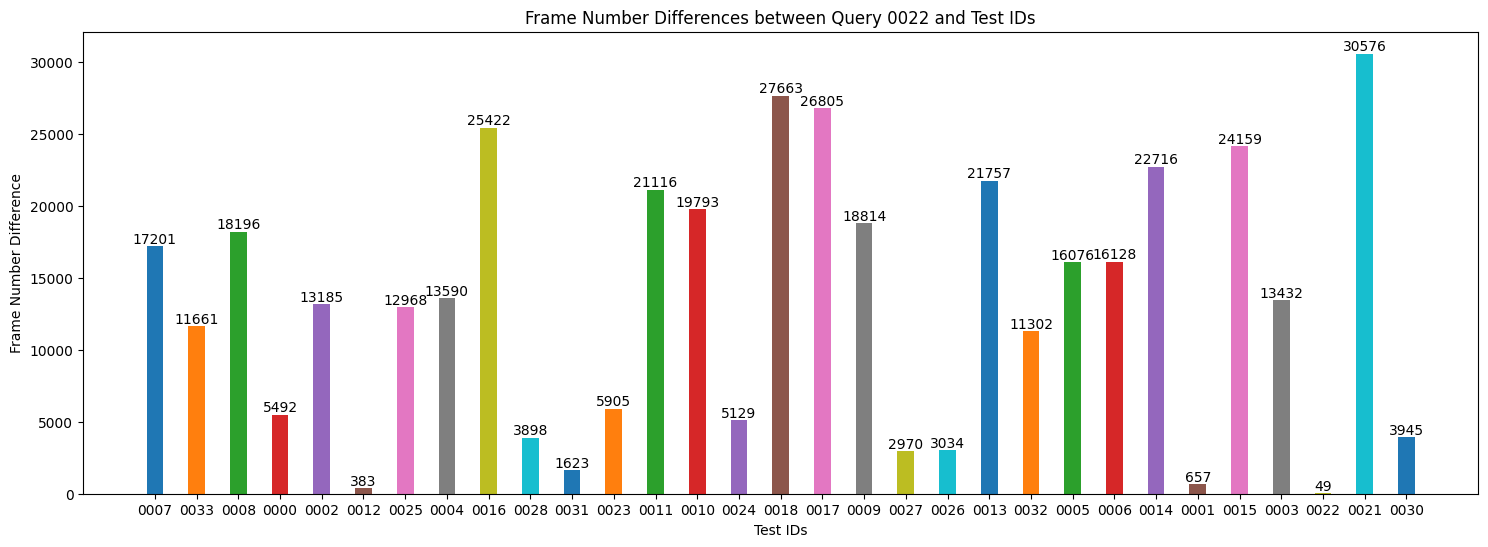

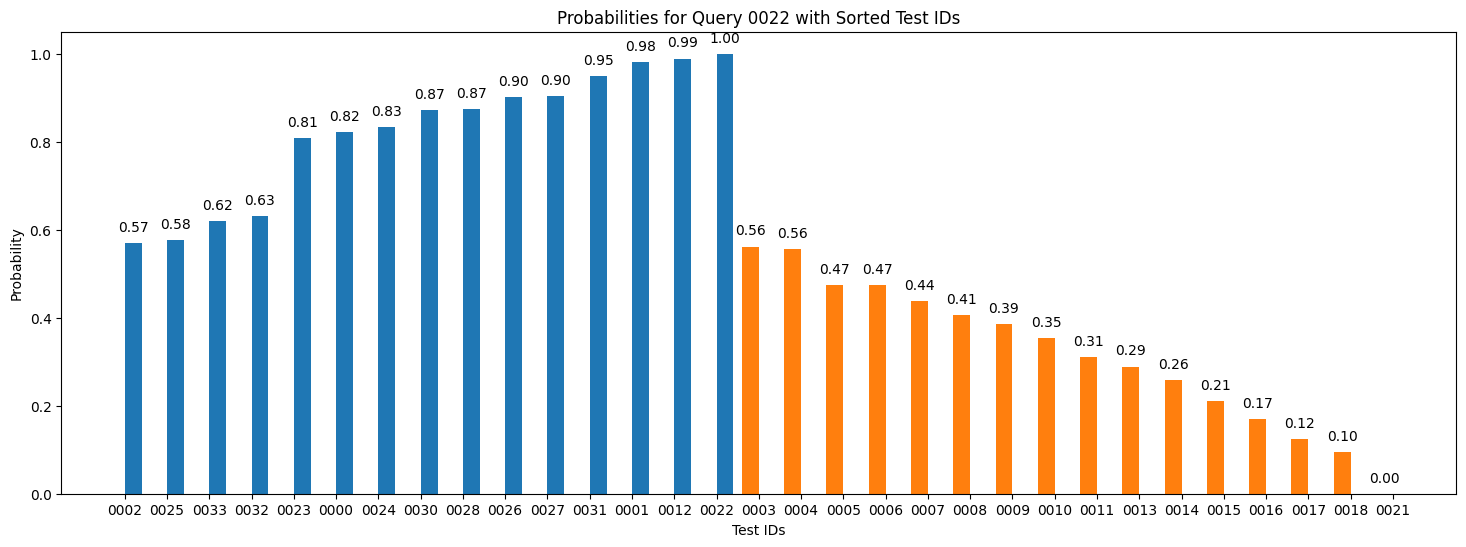

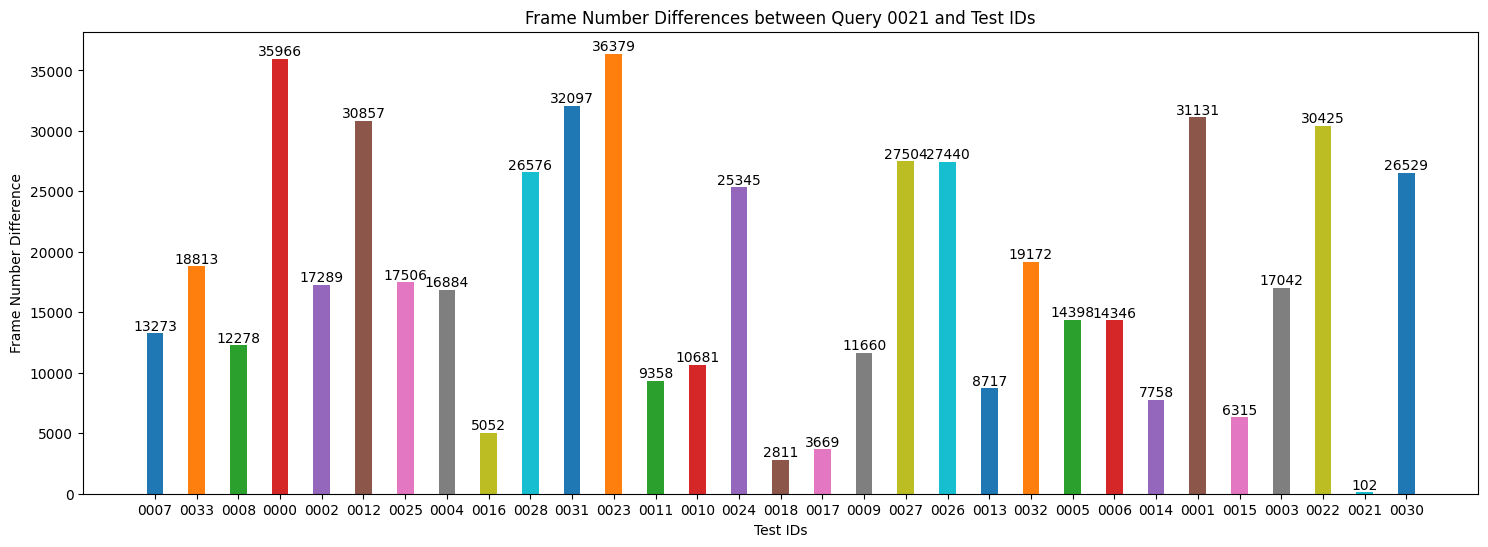

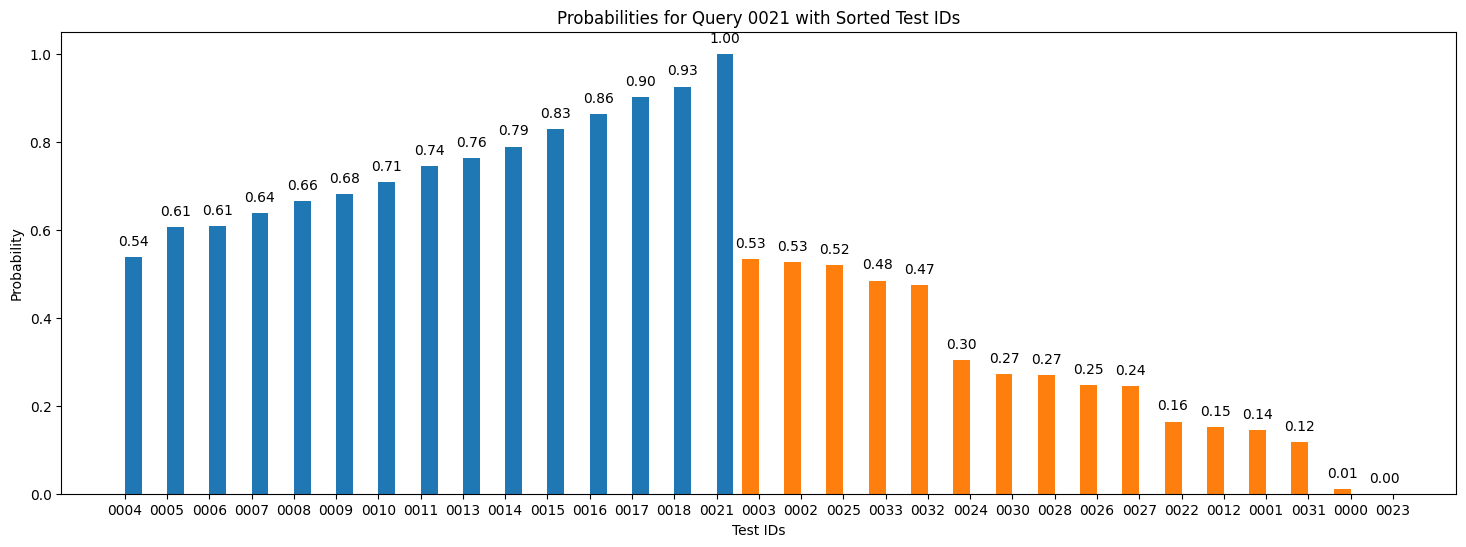

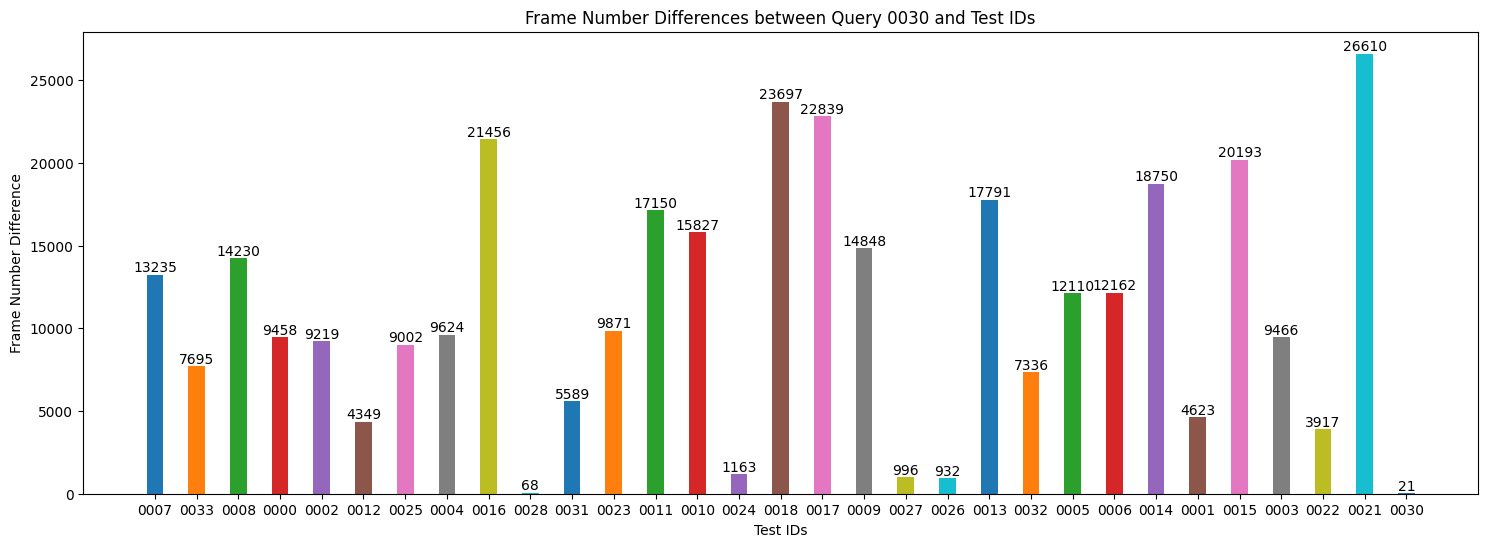

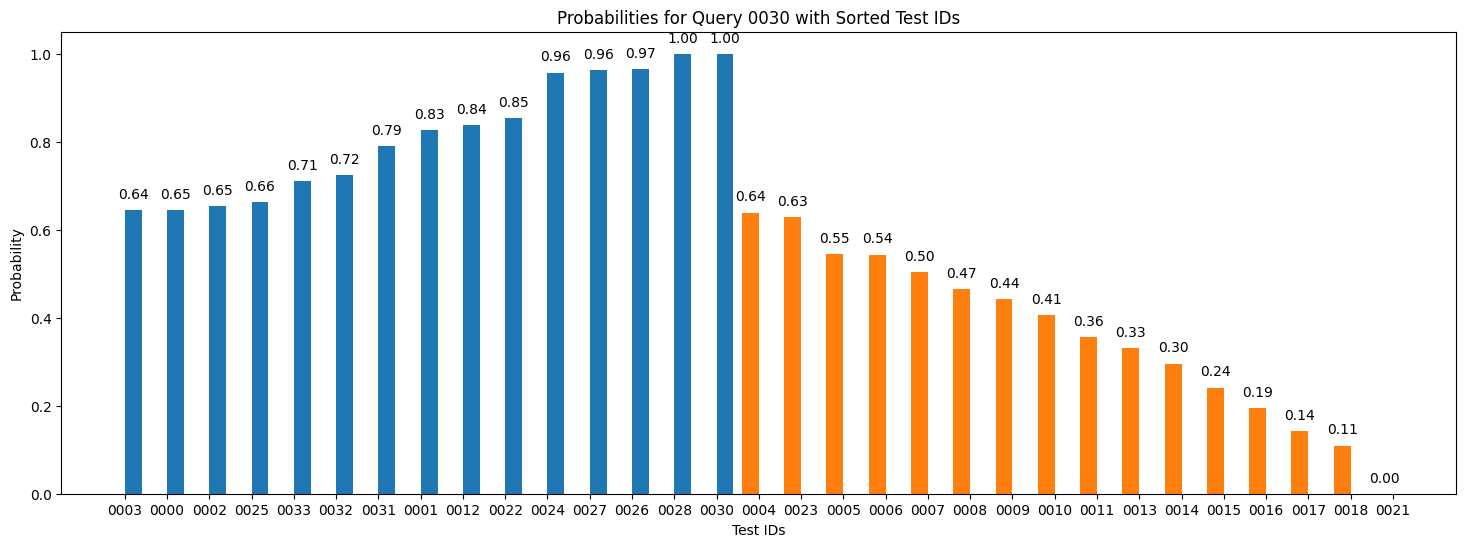

In [13]:
for query_id in common_ids:
    frame_differences = calculate_differences(query_path, test_path, query_id, common_ids)
    # print(frame_differences)
    plot_differences(query_id, common_ids, frame_differences.values())
        
    probabilities = calculate_probabilities(frame_differences)
    plot_probabilities(query_id, common_ids, probabilities)

<font color="cyan">
<h1> Calculate KDE for Each Query to All Gallery Images </h1>
</font>

In [19]:
def calculate_similarity_score(frame_difference, kde):
    frame_difference = np.array(frame_difference).reshape(-1, 1)
    log_dens = kde.score_samples(frame_difference)
    normalized_dens = np.exp(log_dens)
    # if (normalized_dens < mini):
    #     return 0
    # normalized_dens = (normalized_dens - mini) / (maxi - mini)
    return normalized_dens[0]

In [17]:
def compare_queries_to_gallery(query_folder, test_folder, query_id, test_ids):
    id_frame_differences = calculate_differences(query_folder, test_folder, query_id, test_ids)

    similarity_scores = {}
    
    for test_id, frame_diff_list in id_frame_differences.items():
        similarity_score = calculate_similarity_score(int(frame_diff_list[0]), kde)
        similarity_scores[test_id] = similarity_score
        # print(f"The similarity score between Query_id {query_id} and Test_id {test_id} is: {similarity_score}, {int(frame_diff_list[0])}")
        # x_vals, y_vals, kde = calculate_kde(frame_diff_list)
        # print(f"Query {query_id} to Test {test_id} Comparison:")
        # for frame_diff in frame_diff_list:
        #     probability = calculate_probability(frame_diff, kde)
        #     print(f"Frame Difference = {frame_diff}, Probability = {probability:.2f}")
    return similarity_scores

In [20]:
total_scores = {}
for query_id in common_ids:
    # print(query_id)
    total_score = compare_queries_to_gallery(query_path, test_path, query_id, common_ids)
    total_scores[query_id] = total_score
print(total_scores)

{'0012': {'0012': 0.00352082087981049, '0008': 0.0, '0014': 0.0, '0024': 7.512876041489962e-46, '0003': 0.0, '0005': 0.0, '0018': 0.0, '0027': 7.3183562753881e-18, '0015': 0.0, '0002': 4.0285962792196e-311, '0011': 0.0, '0000': 1.4494090711127192e-20, '0021': 0.0, '0028': 4.368324566905526e-05, '0031': 2.5639458112504156e-28, '0006': 0.0, '0033': 6.818023255784542e-113, '0013': 0.0, '0023': 1.2186244261771277e-39, '0007': 0.0, '0022': 4.206119003631683e-07, '0030': 1.9601667404698297e-05, '0032': 7.081576899612259e-81, '0004': 0.0, '0016': 0.0, '0001': 0.0008241502093556342, '0017': 0.0, '0009': 0.0, '0026': 8.835834579867285e-16, '0025': 9.756901060100874e-277, '0010': 0.0}, '0008': {'0012': 0.0, '0008': 0.00012869105819401065, '0014': 1.0993973270113225e-33, '0024': 0.0, '0003': 0.0, '0005': 3.2725960260911535e-102, '0018': 9.150491700370994e-06, '0027': 0.0, '0015': 2.1546205610331033e-06, '0002': 0.0, '0011': 1.1346619808124734e-169, '0000': 0.0, '0021': 4.0071097222786363e-66, '00

<font color="cyan">
<h1> Calculate Rank_1, Rank_5 and Rank_10 </h1>
</font>

In [21]:
def calculate_rank(similarity_scores, common_ids):
    rank_1, rank_5, rank_10, rank_up_10 = 0.0, 0.0, 0.0, 0.0
    for query_id in common_ids:
        # print(query_id)
        scores = similarity_scores[query_id]
        sorted_scores = dict(sorted(scores.items(), key = lambda x: x[1], reverse=True))
        # print(sorted_scores)
        sorted_keys = list(sorted_scores.keys())
        sorted_values = list(sorted_scores.values())
        if query_id == sorted_keys[0]:
            rank_1 += 1
            rank_5 += 1
            rank_10 += 1
            rank_up_10 += 1
        elif query_id in sorted_keys[1:5]:
            rank_5 += 1
            rank_10 += 1
            rank_up_10 += 1
        elif query_id in sorted_keys[5:10]:
            rank_10 += 1
            rank_up_10 += 1
        else:
            rank_up_10 += 1
    total_queries = len(common_ids)
    rank1 = (rank_1 / total_queries) * 100
    rank5 = (rank_5 / total_queries) * 100
    rank10 = (rank_10 / total_queries) * 100
    rankUp10 = (rank_up_10 / total_queries) * 100
    print(f"Rank 1: {rank1}%")
    print(f"Rank 5: {rank5}%")
    print(f"Rank 10: {rank10}%")
    print(f"Rank > 10: {rankUp10}%")
    return rank1, rank5, rank10, rankUp10

In [22]:
rank_1, rank_5, rank_10, rank_up_10 = calculate_rank(total_scores, common_ids)

Rank 1: 90.32258064516128%
Rank 5: 100.0%
Rank 10: 100.0%
Rank > 10: 100.0%


<font color="cyan">
<h1> Calculate KDE for Each Query Without That Query and Calculate Similarity Score For That Query </h1>
</font>

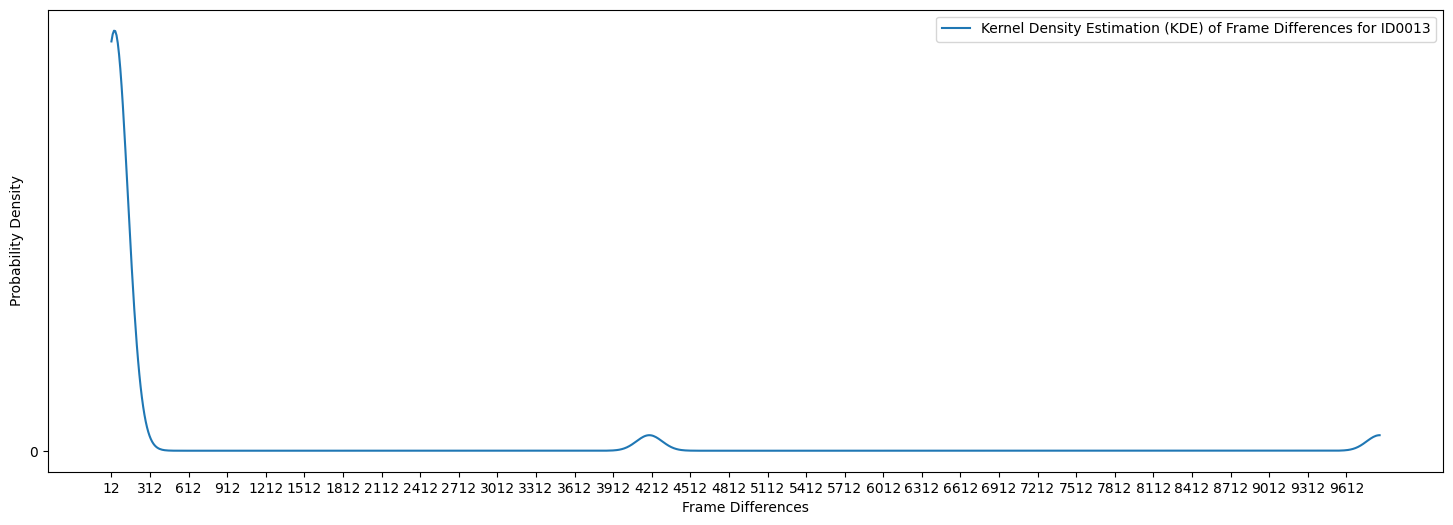

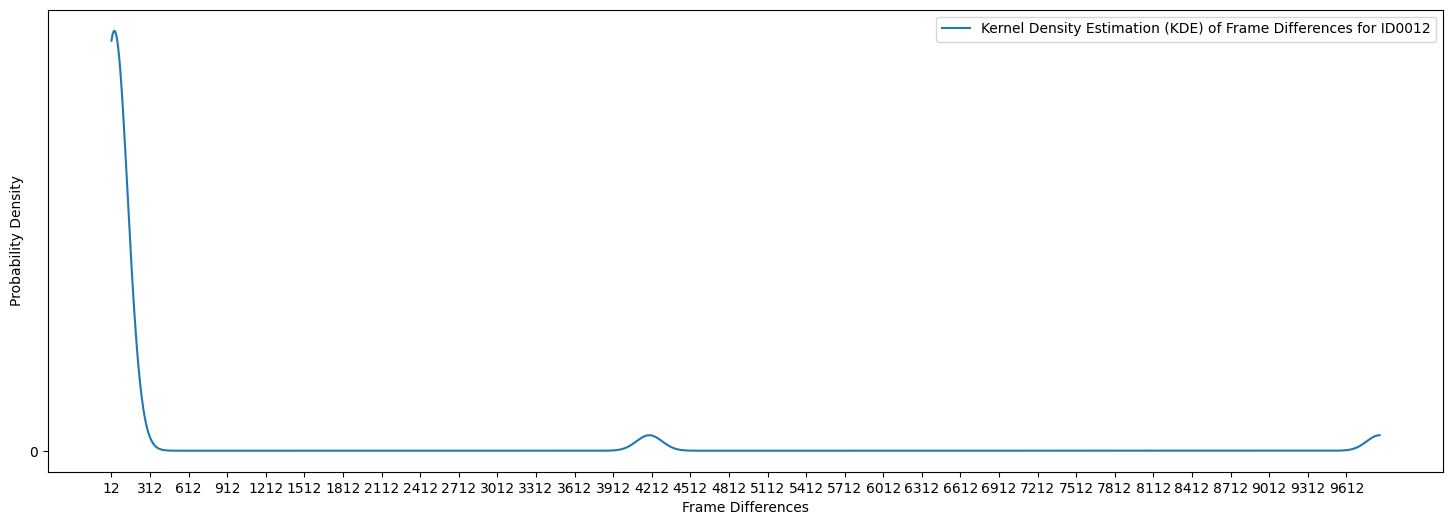

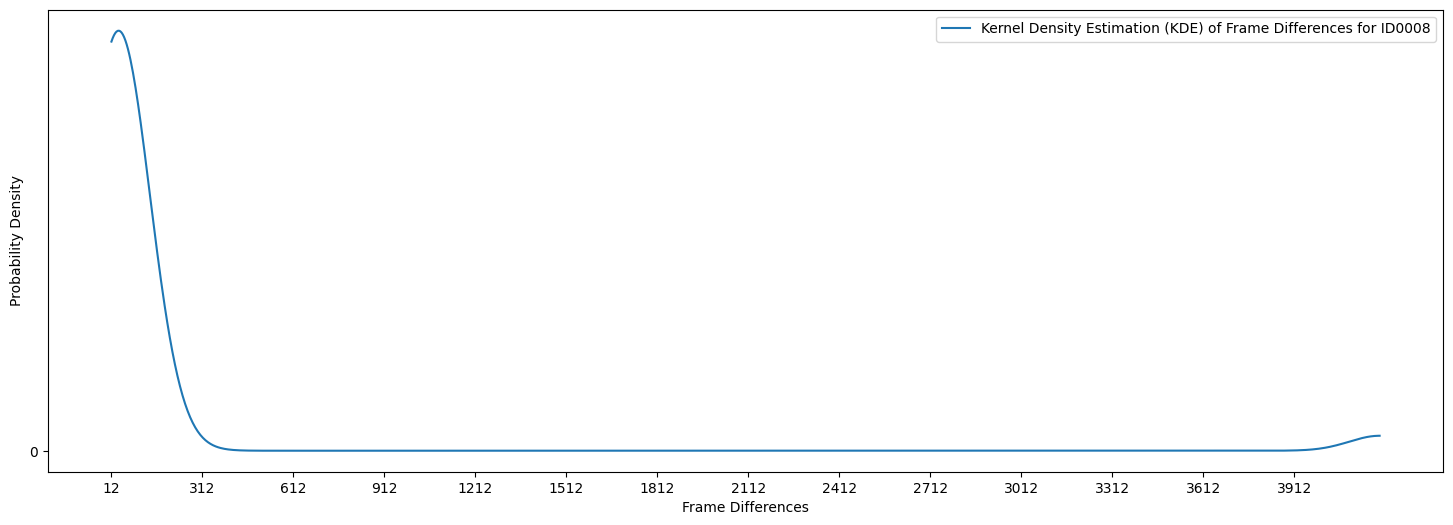

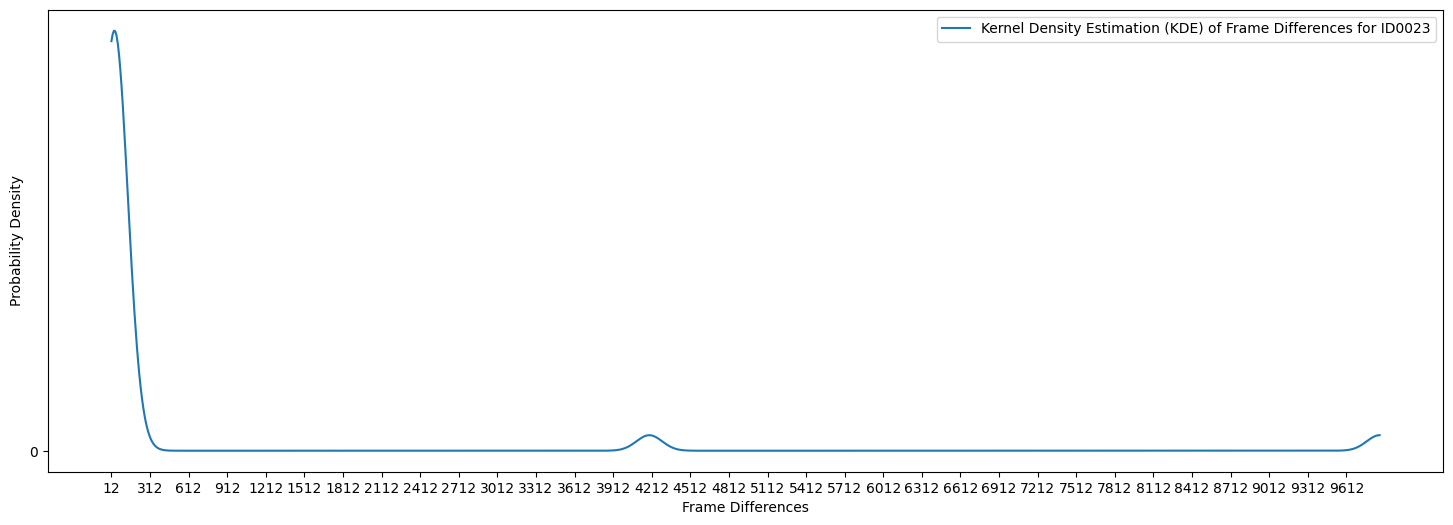

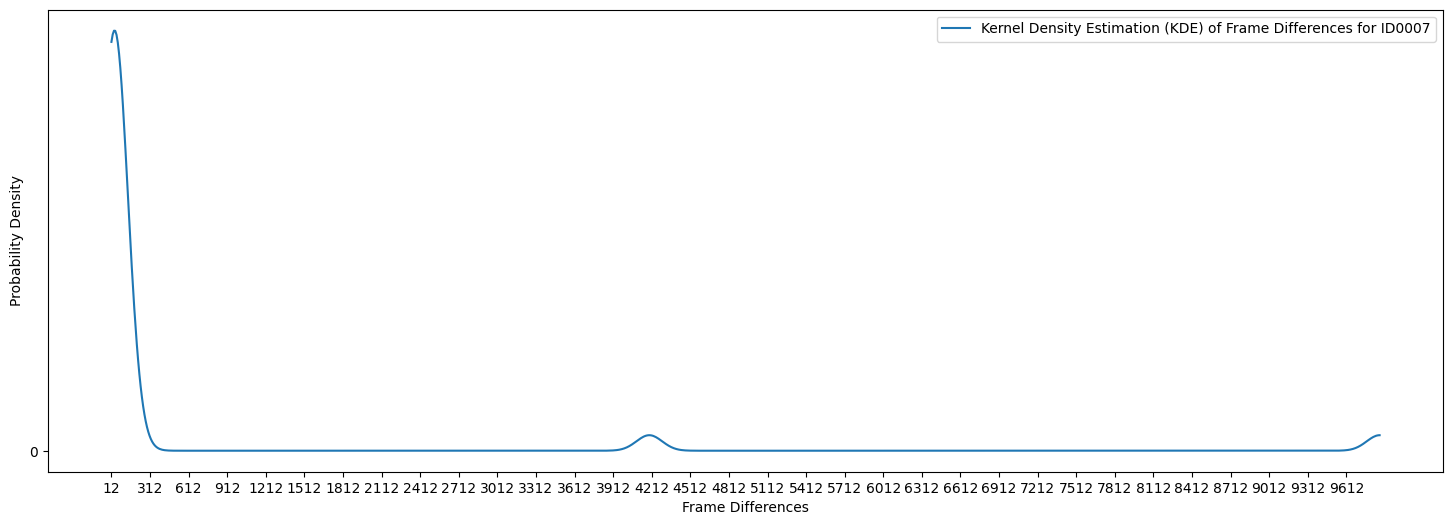

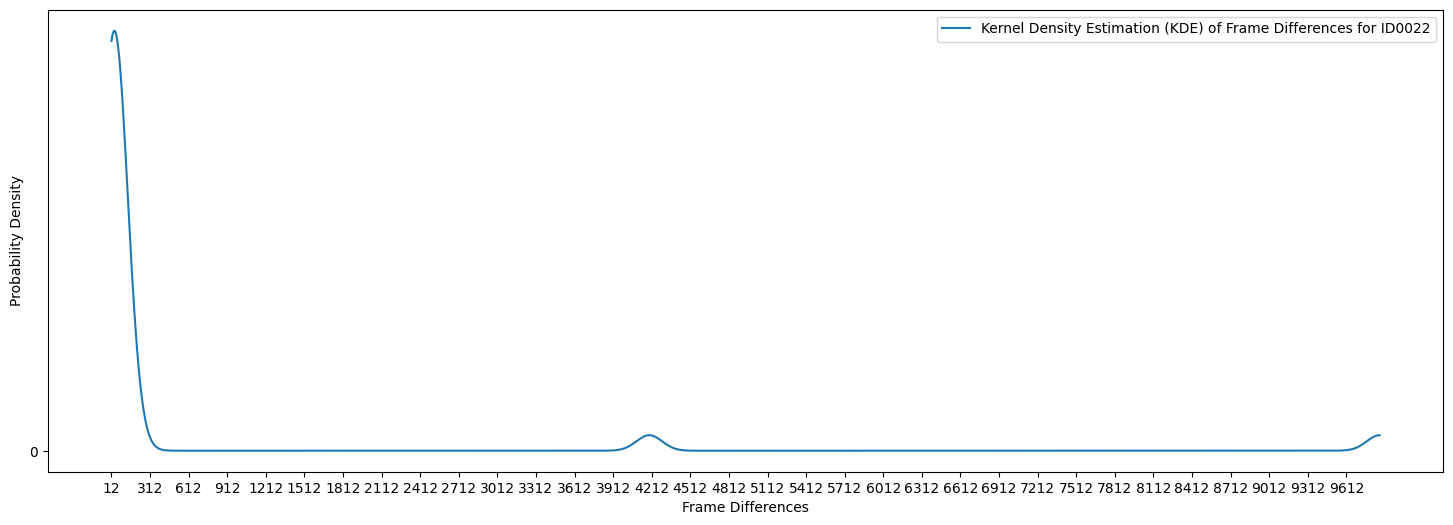

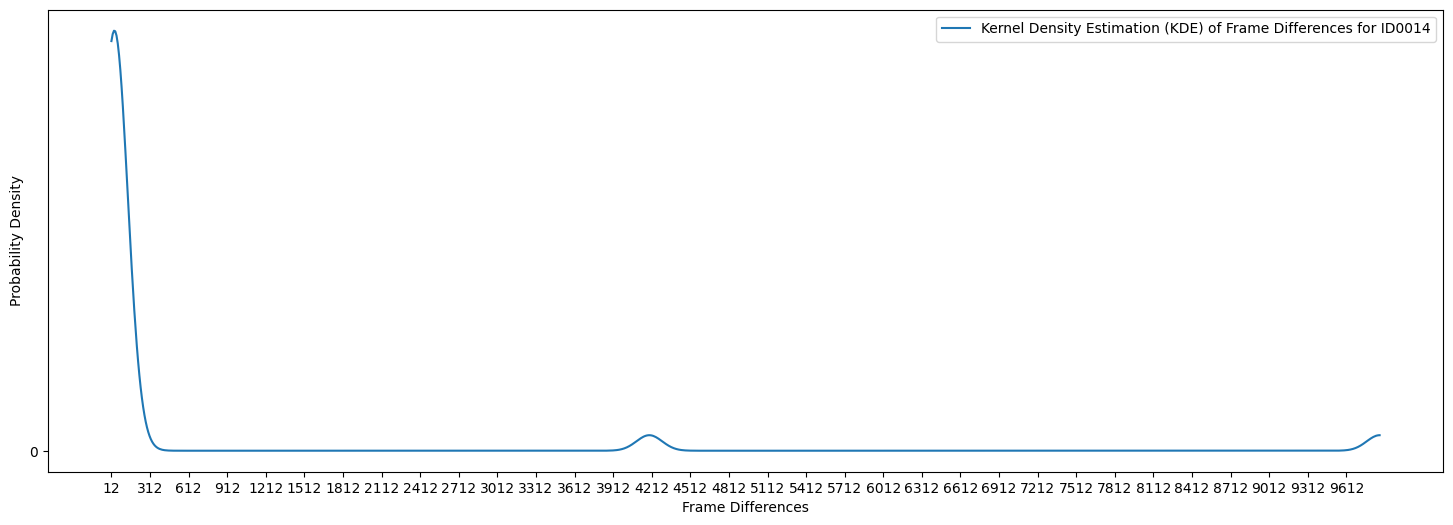

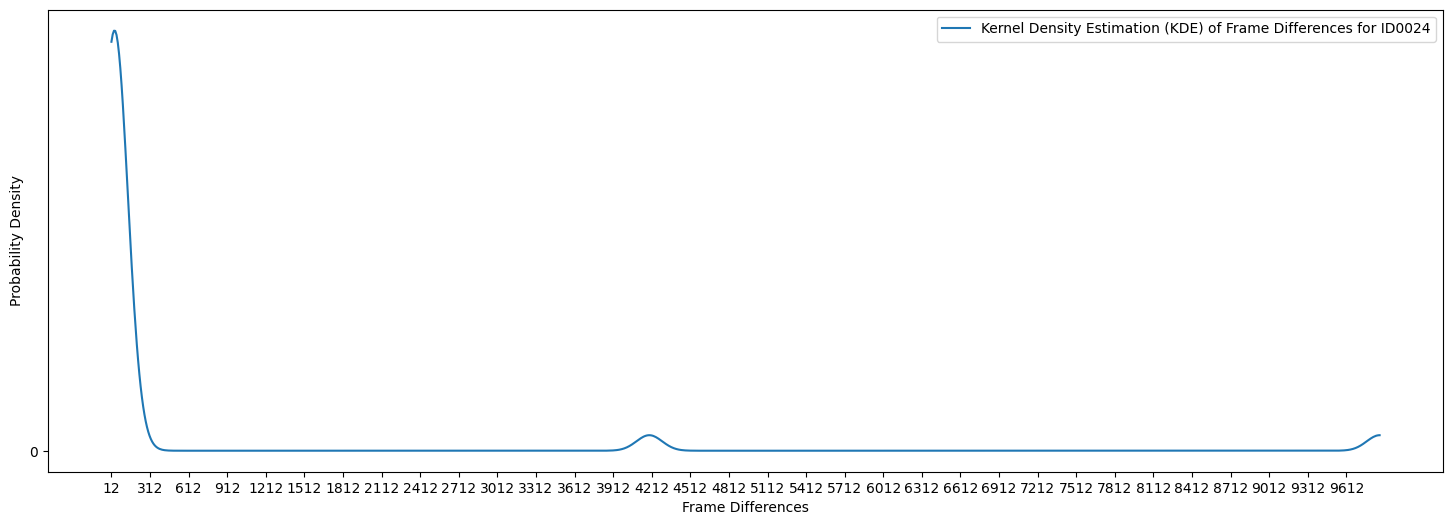

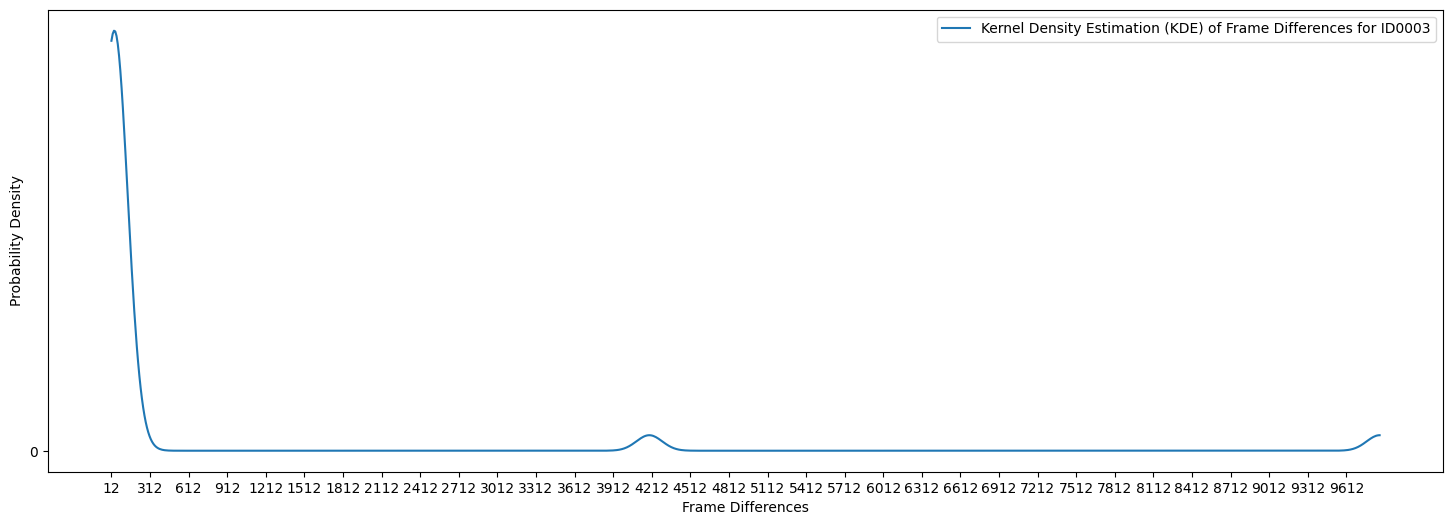

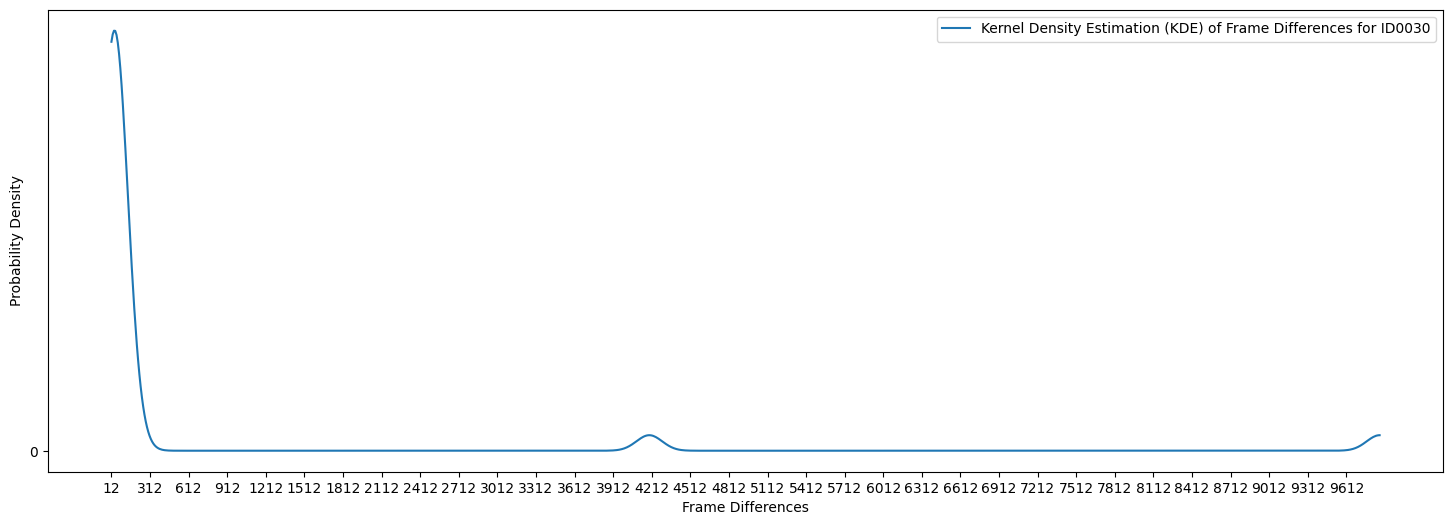

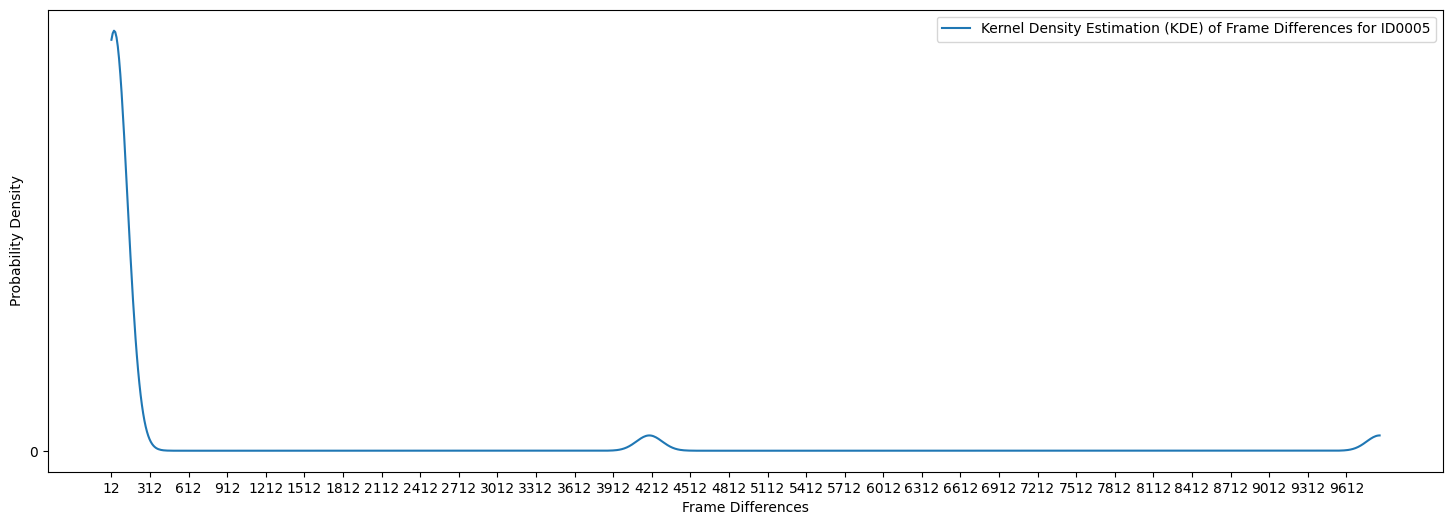

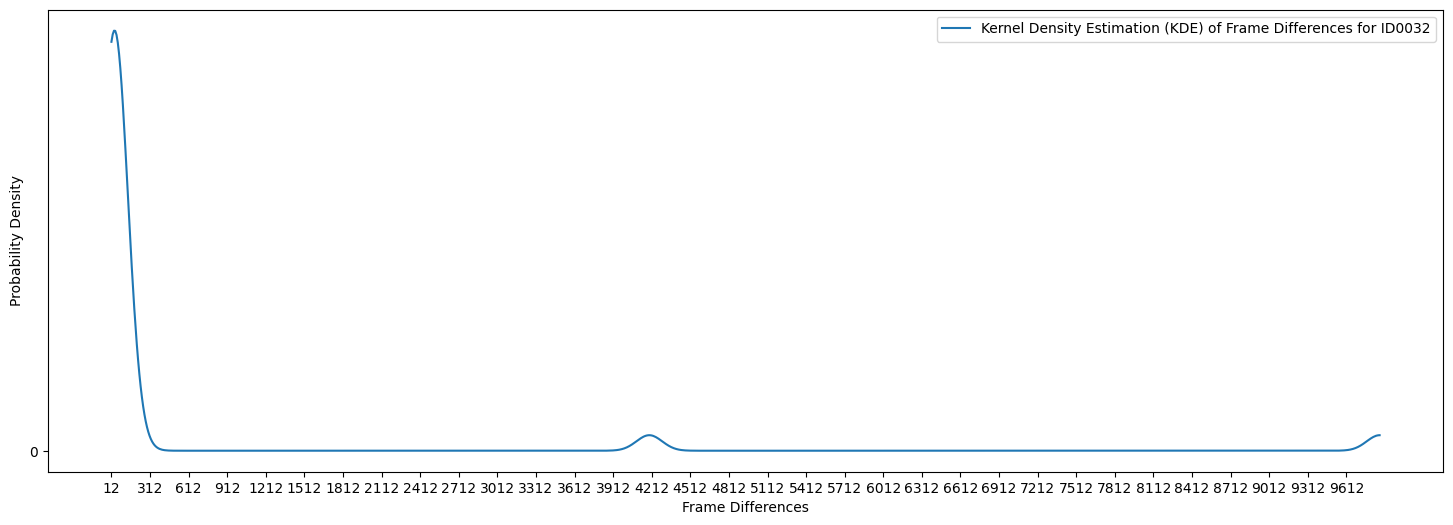

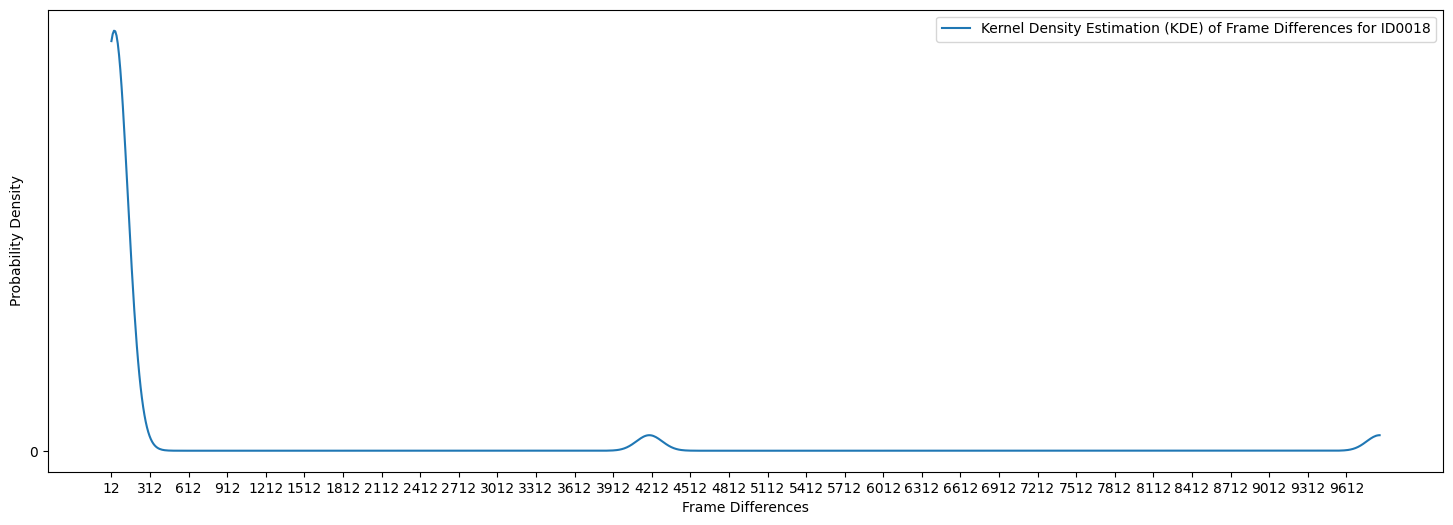

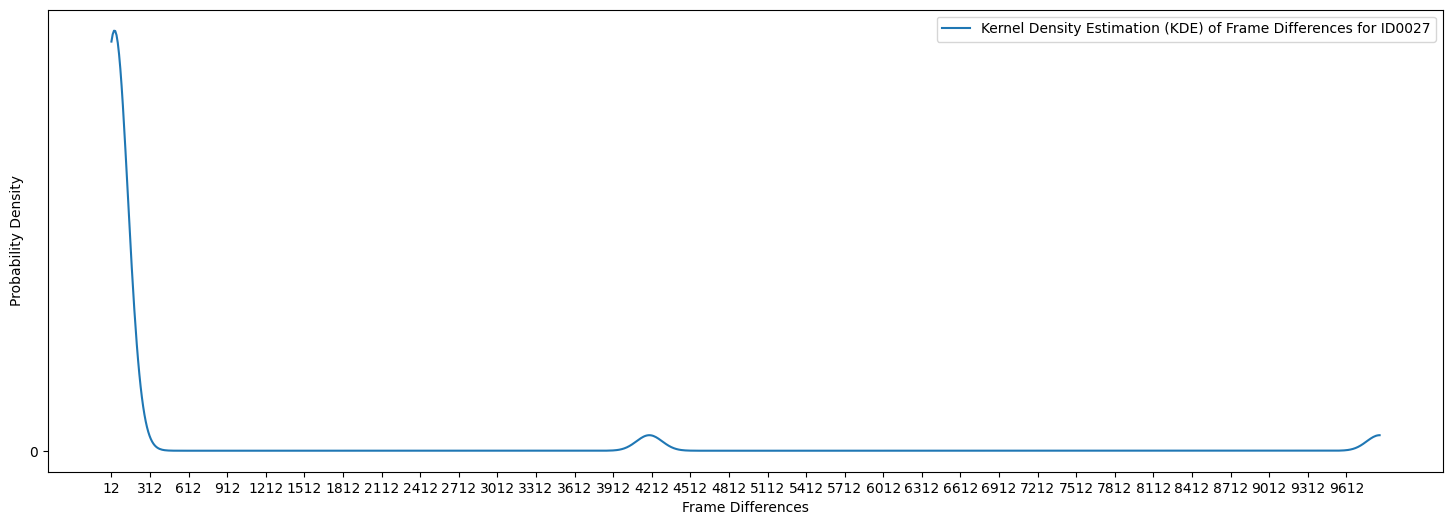

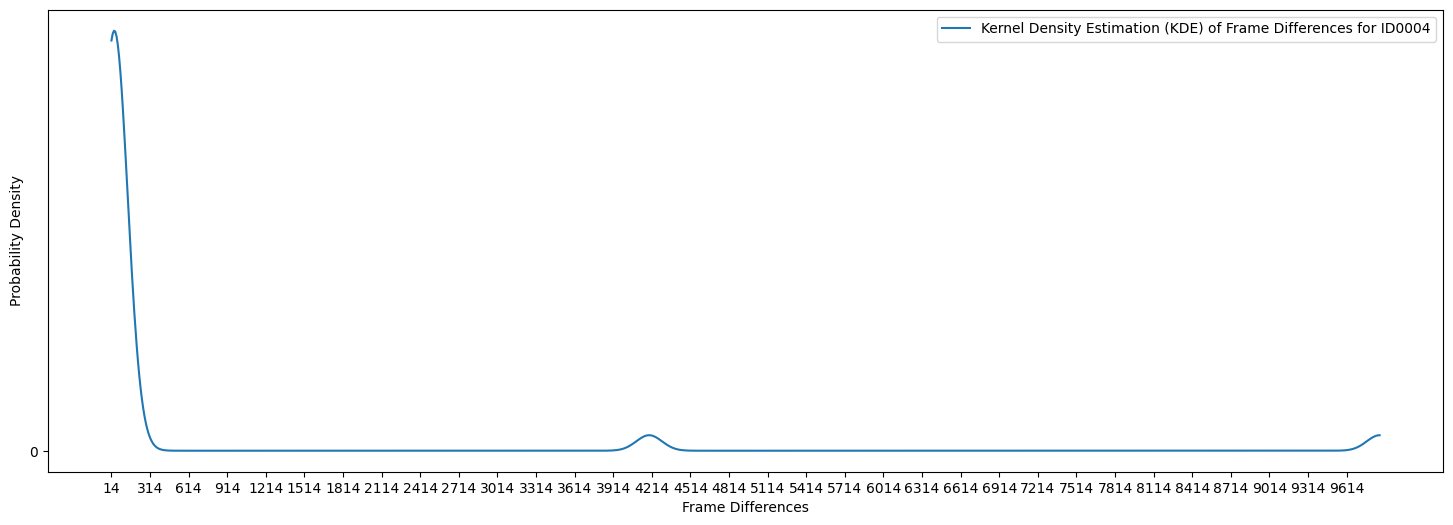

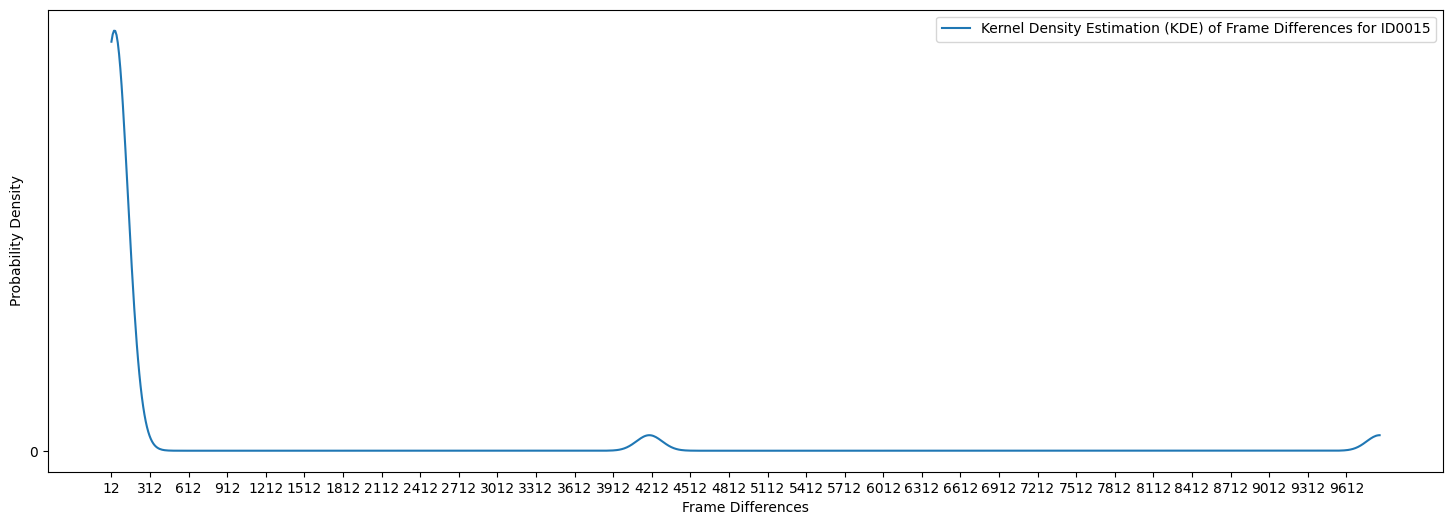

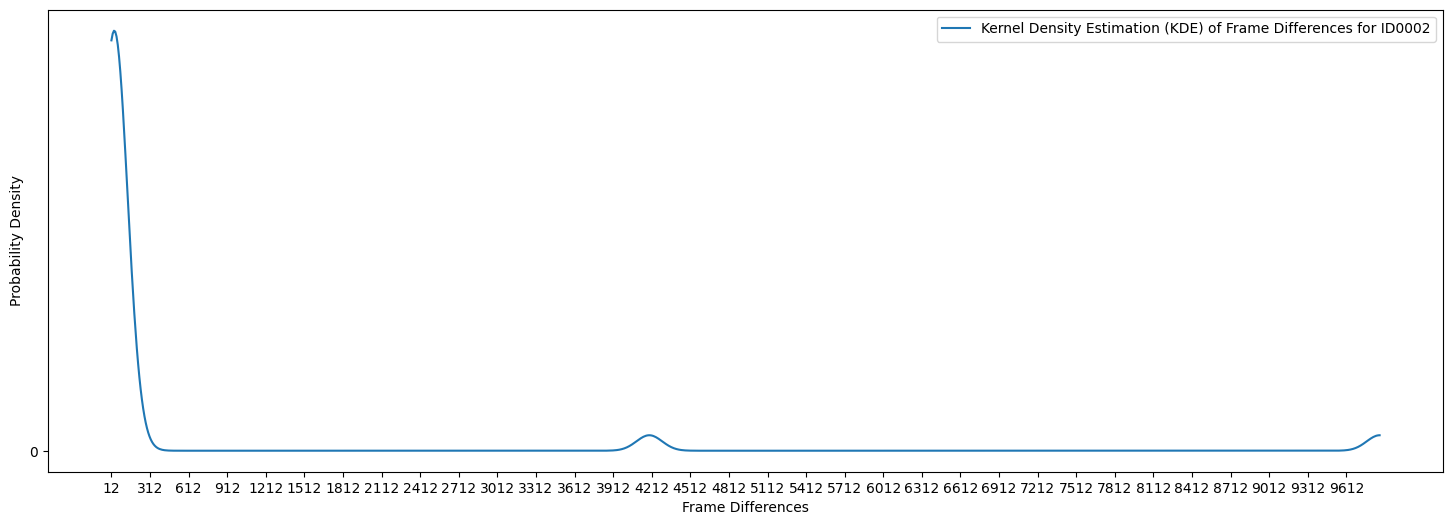

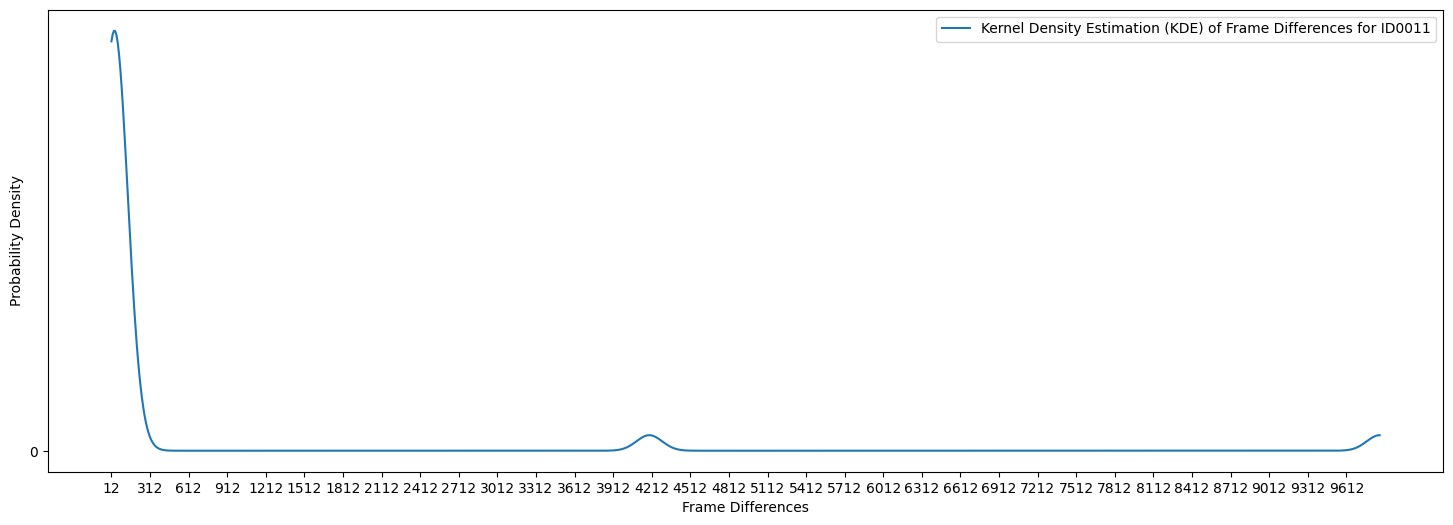

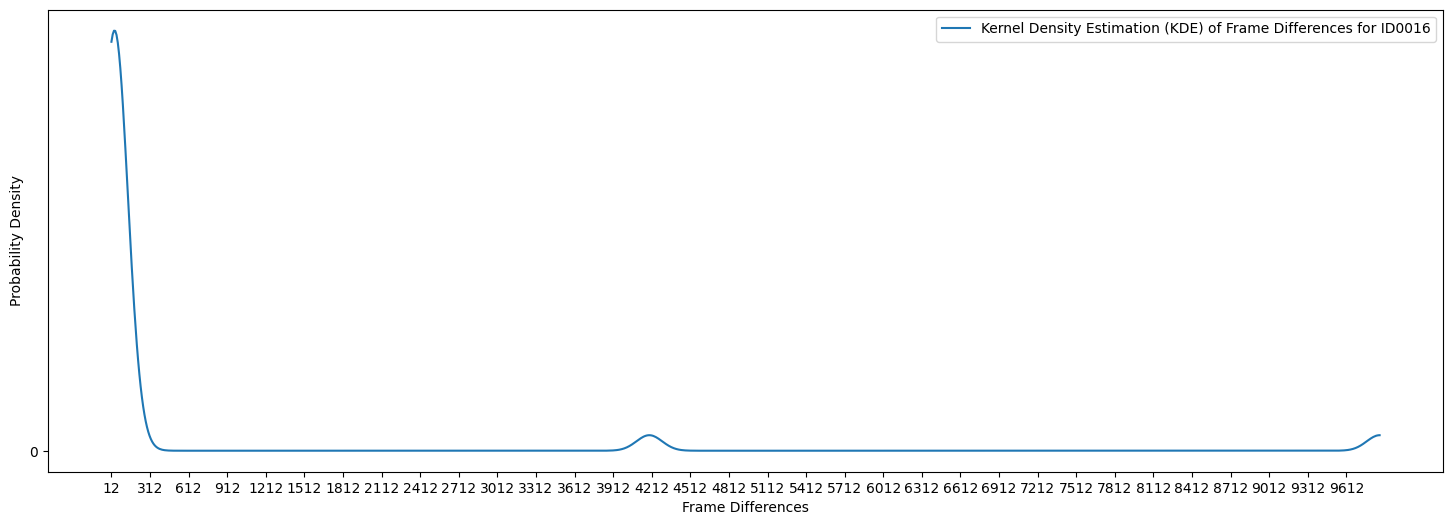

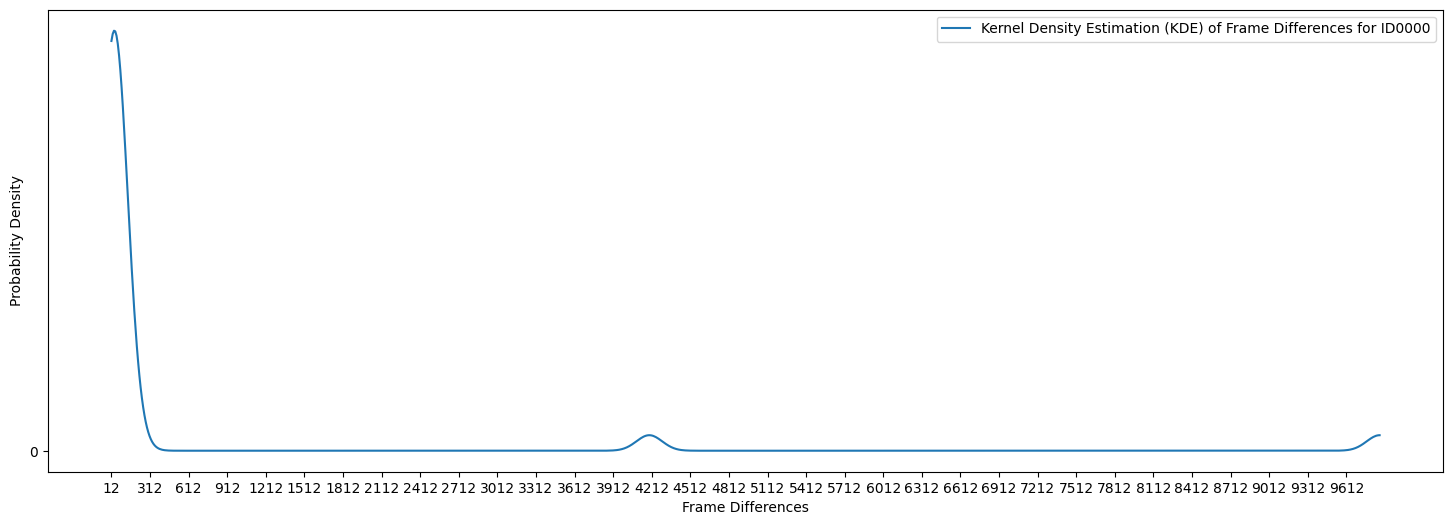

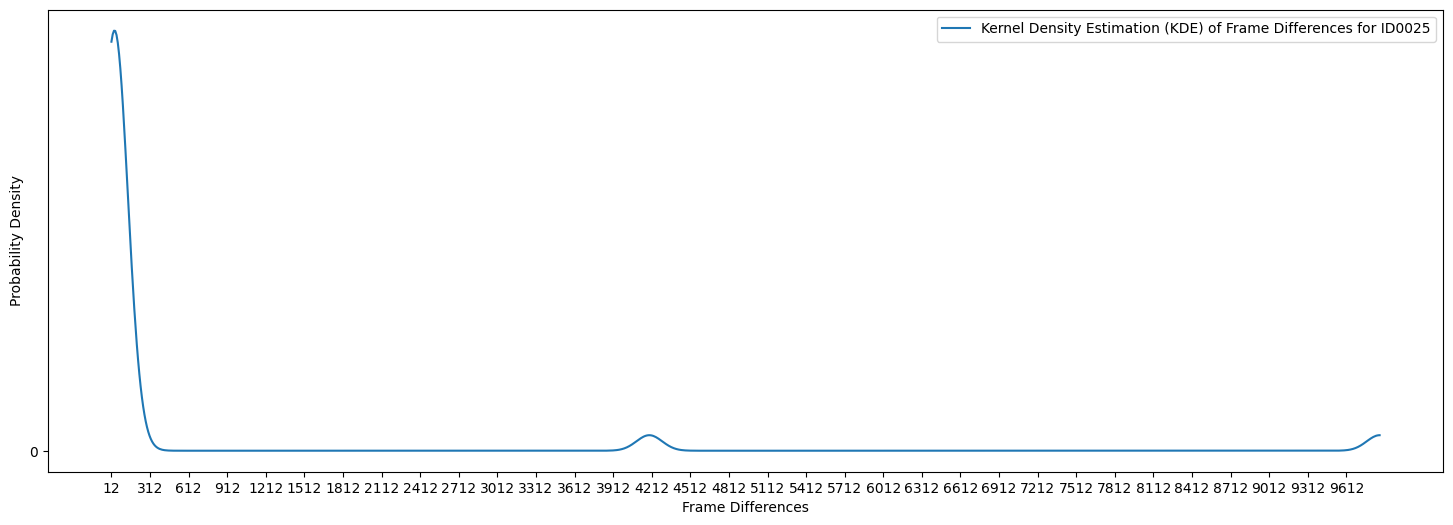

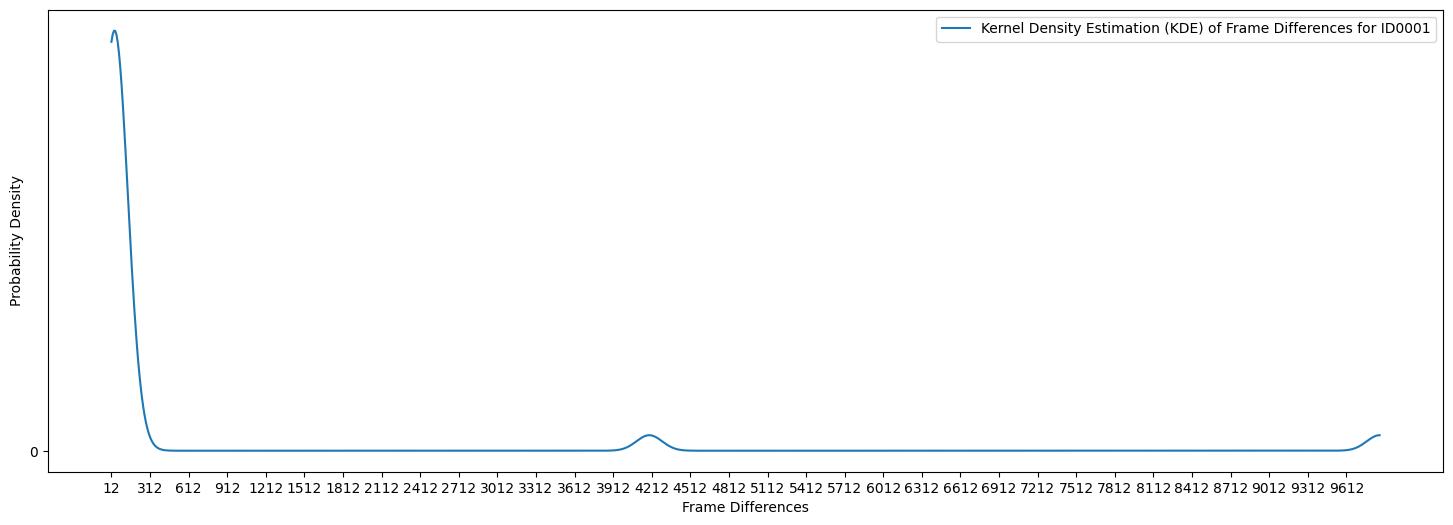

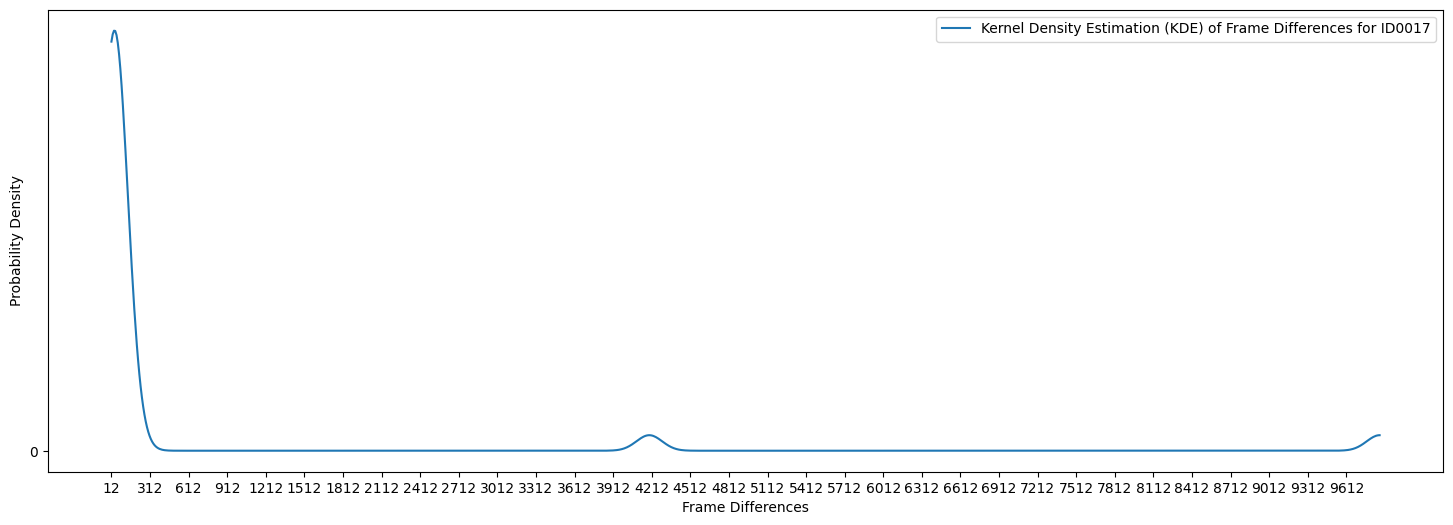

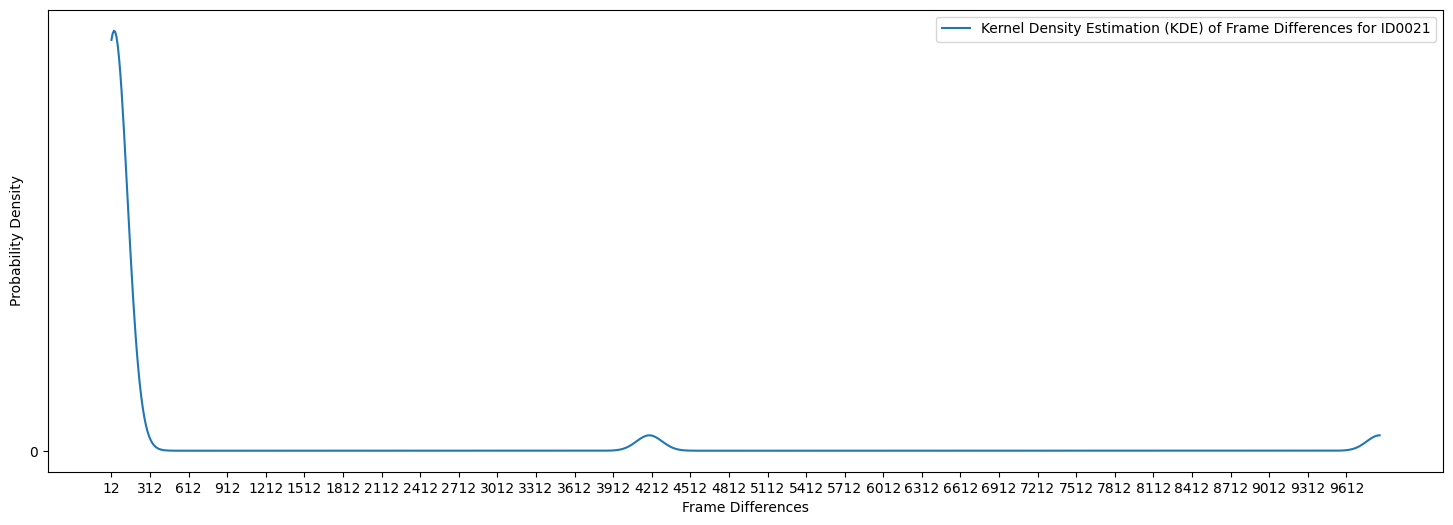

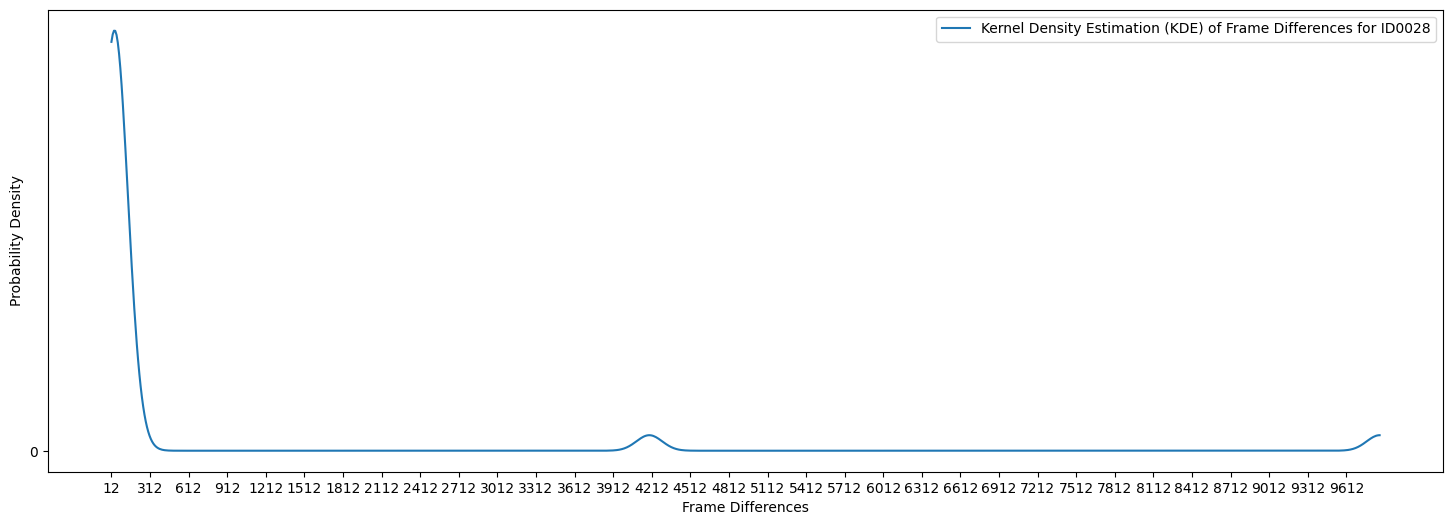

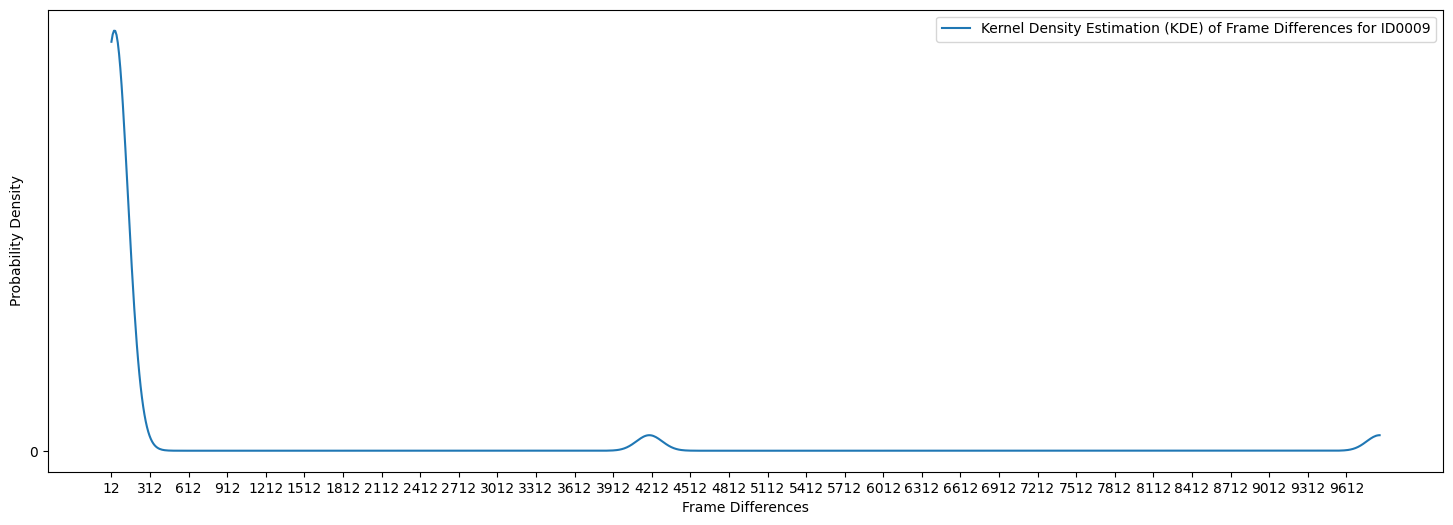

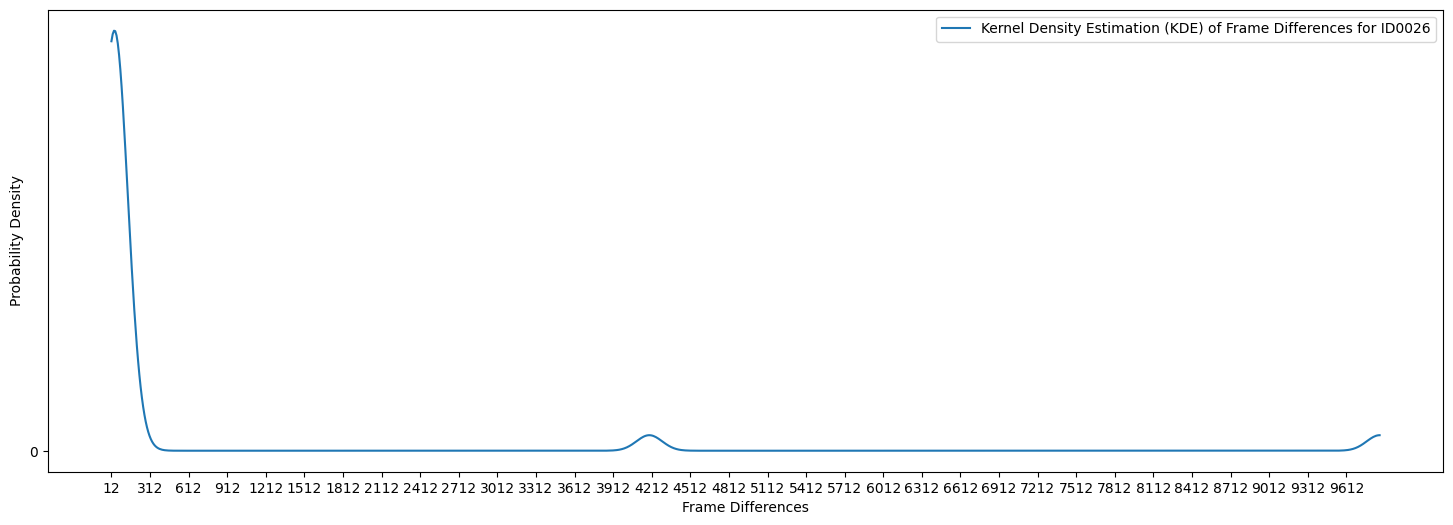

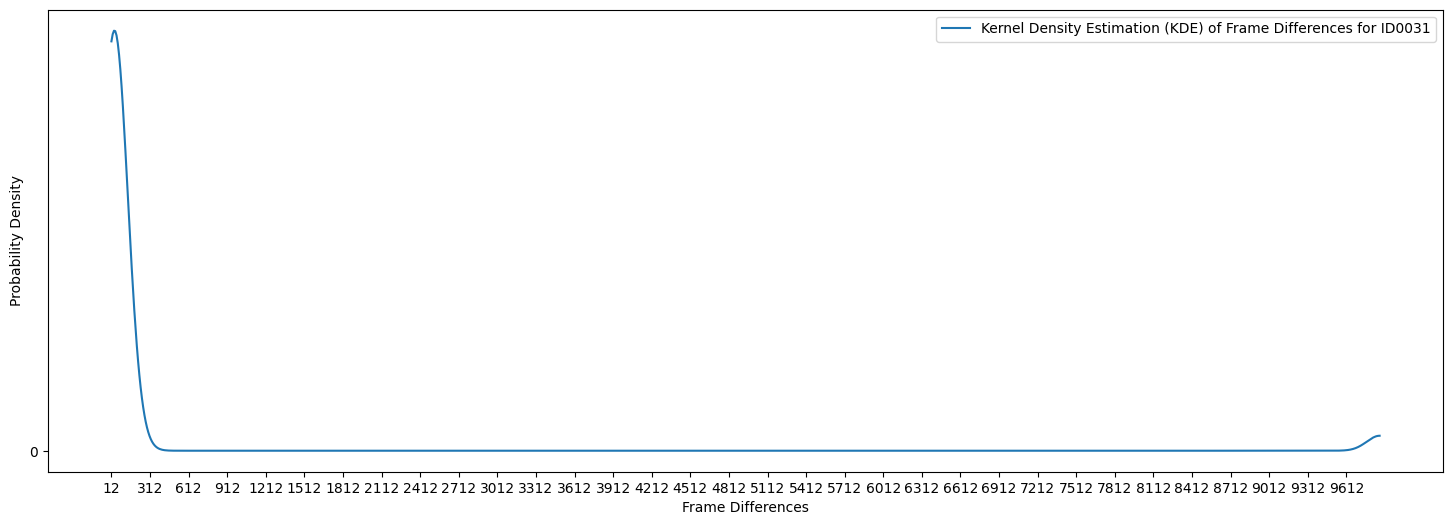

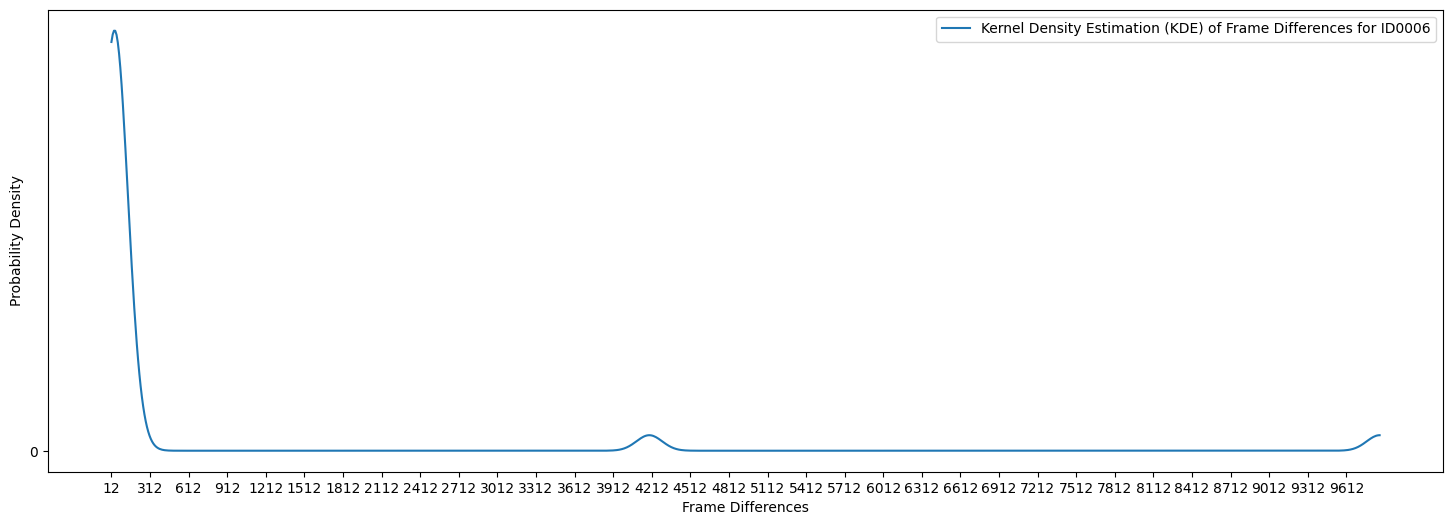

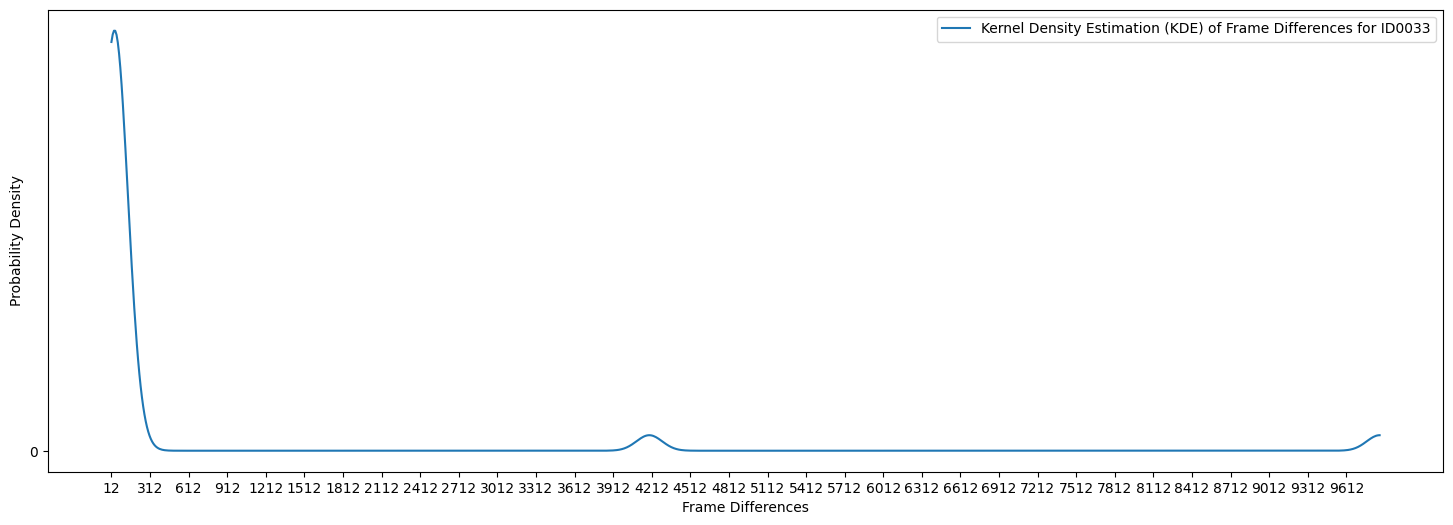

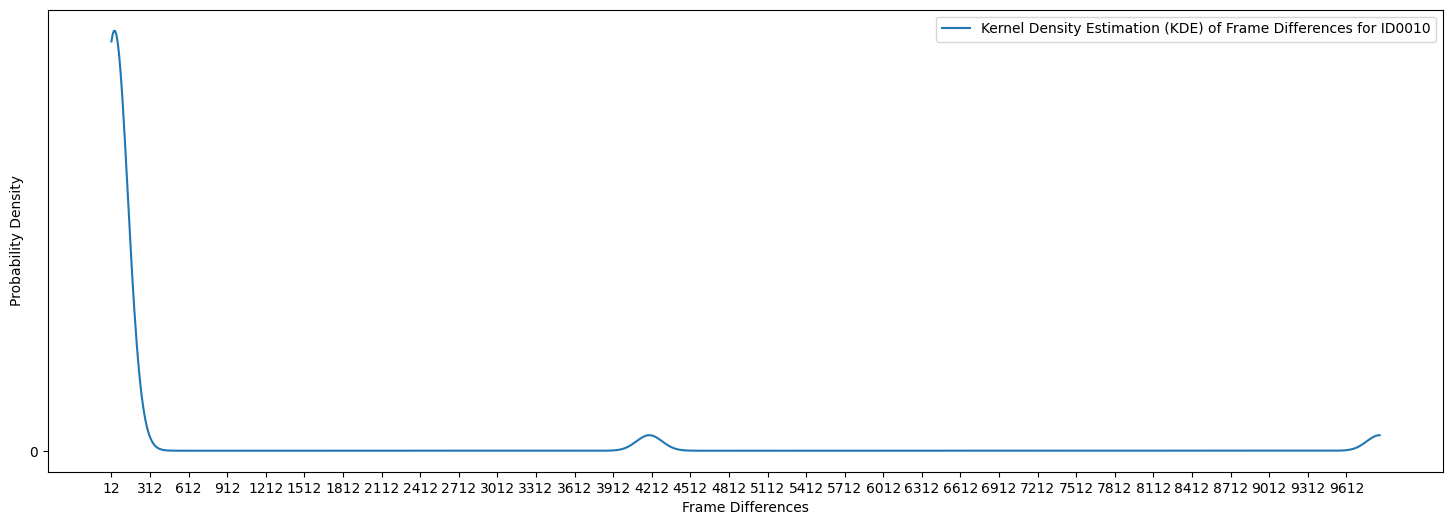

In [28]:
# print(common_ids)
total_scores = {}
for query_id in common_ids.copy():
    remaining_ids = common_ids.copy() 
    remaining_ids.remove(query_id)  
    id_frame_differences = calculate_frame_differences(test_path, query_path, remaining_ids)
    query_data = np.array(list(id_frame_differences.values()))
    kde = plot_kde_chart(query_data, f"Kernel Density Estimation (KDE) of Frame Differences for ID{query_id}")
    total_score = compare_queries_to_gallery(query_path, test_path, query_id, common_ids)
    total_scores[query_id] = total_score
    # print(f"Query ID: {query_id}, Remaining IDs: {remaining_ids}")

<font color="cyan">
<h1> Calculate Rank_1, Rank_5 and Rank_10 for Leave_One_Out Method </h1>
</font>

In [24]:
rank_1, rank_5, rank_10, rank_up_10 = calculate_rank(total_scores, common_ids)

Rank 1: 83.87096774193549%
Rank 5: 93.54838709677419%
Rank 10: 96.7741935483871%
Rank > 10: 100.0%
